# RG-A SIDIS Analysis



In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)


class color:
    CYAN      = '\033[96m'
    PURPLE    = '\033[95m'
    BLUE      = '\033[94m'
    YELLOW    = '\033[93m'
    GREEN     = '\033[92m'
    RED       = '\033[91m'
    DARKCYAN  = '\033[36m'
    BOLD      = '\033[1m'
    LIGHT     = '\033[2m'
    ITALIC    = '\033[3m'
    UNDERLINE = '\033[4m'
    BLINK     = '\033[5m'
    DELTA     = '\u0394' # symbol
    END       = '\033[0m'
    
    
class color_bg:
    BLACK   = '\033[40m'
    RED     = '\033[41m'
    GREEN   = '\033[42m'
    YELLOW  = '\033[43m'
    BLUE    = '\033[44m'
    MAGENTA = '\033[45m'
    CYAN    = '\033[46m'
    WHITE   = '\033[47m'
    RESET   = '\033[49m'
    END     = '\033[0m'
    
    
class root_color:
    # Colors
    White   = 0
    Black   = 1
    Red     = 2
    Green   = 3
    Blue    = 4
    Yellow  = 5
    Pink    = 6
    Cyan    = 7
    DGreen  = 8 # Dark Green
    Purple  = 9
    DGrey   = 13
    Grey    = 15
    LGrey   = 17
    Brown   = 28
    Gold    = 41
    Rust    = 46
    
    # Fonts
    Bold    = '#font[22]'
    Italic  = '#font[12]'
    
    # Symbols
    Delta   = '#Delta'
    Phi     = '#phi'
    π       = '#pi'
    Degrees = '#circ'
    
    Line    = '#splitline'

    

print(color.BOLD + "\nStarting RG-A SIDIS Analysis\n" + color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

Welcome to JupyROOT 6.22/06

Starting RG-A SIDIS Analysis


Started running on 2-22-2023 at 7:45 p.m.



In [2]:
try:
    import RooUnfold
except ImportError:
    print("Somehow the python module was not found, let's try loading the library by hand...")
    try:
        ROOT.gSystem.Load("libRooUnfold.so")
        print("".join([color.GREEN, "Success", color.END]))
    except:
        print("".join([color.RED, color.BOLD, "\nERROR IN IMPORTING RooUnfold...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


.

.

.

# Initializing Alerts

In [3]:
# To run an alert, set the variable 'runAlert' to 'yes' (tells the code to run that alert)
runAlert = 'yes'
# runAlert = 'no'


if(runAlert == 'yes'):
    # """ jupyter addin shows starttime, elapsedtime; sounds alert on cell finish
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        # """ makes sound on client using javascript (works with remote server) """      
        framerate = 44100
        duration=1
        freq=300
        t = np.linspace(0,duration,framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
        
    
    alert()
    print("Alert is set.")
else:
    print("There will be no alerts when this code is run.")

Alert is set.


.

.

.

# Save results?

In [4]:
SaveChoice = 'yes'
SaveChoice = 'no'


SaveSortChoice = 'yes'
# SaveSortChoice = 'no'

if(SaveChoice == "no"):
    SaveSortChoice = 'no'


print("".join(["Saving results?  ", color.BOLD, str(SaveChoice), color.END, "\n"]))

if(SaveChoice == 'yes'):
    print("\tImages of results produced will be saved.")
else:
    print("\tNot saving results.")
    
if(SaveSortChoice == 'yes'):
    print("\tWill also be sorting images into folders after they are saved...")


Saving results?  no

	Not saving results.


.

.

.

.

.

.

.

.

.

# Loading Files

In [5]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"

    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
        
    loading = "".join([location, file])
    # print(loading)
    
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
Common_Name = "Unfolding_Tests_V14_All"
Common_Name = "New_Smearing_Creation_All"
# Common_Name = "Analysis_Note_Update_V3_All"
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
else:
    REAL_File_Name = "DNP_V3_All"
    REAL_File_Name = "Unfolding_Tests_V1_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
if(False):
    MC_REC_File_Name = Common_Name
else:
#     MC_REC_File_Name = "Mom_Cor_Response_Matrix_V3_All"
#     MC_REC_File_Name = "Unfolding_Tests_V1_All"
#     MC_REC_File_Name = "Unfolding_Tests_V6_All"
#     MC_REC_File_Name = "Unfolding_Tests_V8_Most"
    MC_REC_File_Name = "Unfolding_Tests_V12_All"
    MC_REC_File_Name = "Unfolding_Tests_V13_3300_2"
    MC_REC_File_Name = "New_Smearing_Creation_V5_All"
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
# if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Mom_Cor_Response_Matrix_V3_All"
    MC_GEN_File_Name = "Unfolding_Tests_V1_All"
    MC_GEN_File_Name = "Unfolding_Tests_V3_Most"
    MC_GEN_File_Name = "Unfolding_Tests_V8_Most"
####################################
##   Generated Monte Carlo Data   ##
####################################

################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE , " Real (Experimental) Data", color.END, " in '", color.BOLD, REAL_File_Name, color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED , " Reconstructed Monte Carlo Data", color.END, " in '", color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN , " Generated Monte Carlo Data", color.END, " in '", color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print("".join(["\n\n", color.BOLD, "Done Loading RDataFrame files...\n", color.END]))


Not using the common file name for the Reconstructed Monte Carlo Data...

The total number of histograms available for the Real (Experimental) Data in 'New_Smearing_Creation_All' is 36
The total number of histograms available for the Reconstructed Monte Carlo Data in 'New_Smearing_Creation_V5_All' is 72
The total number of histograms available for the Generated Monte Carlo Data in 'New_Smearing_Creation_All' is 0


Done Loading RDataFrame files...



Error in <TFile::TFile>: file Histo_Files_ROOT/GEN_MC/SIDIS_epip_MC_GEN_New_Smearing_Creation_All.root does not exist


.

.

## Full (Name) Search

In [6]:
try:
    Run_REAL_Search = False
#     Run_REAL_Search = True

    Run_MC_REC_Search = False
#     Run_MC_REC_Search = True

    Run_MC_GEN_Search = False
    # Run_MC_GEN_Search = True


    if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
        if(Run_REAL_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Real (Experimental) Data files:
        """, color.END]))
            REAL_Search_Count = 0
            REAL_Search_Condition = True
            for rdf_name in rdf.GetListOfKeys():
                # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
                # REAL_Search_Condition = ("Normal_2D" in str(rdf_name) and "cut_Complete_SIDIS" in str(rdf_name))
                # REAL_Search_Condition = ("Normal_2D" not in str(rdf_name) and "cut_Complete_EDIS" in str(rdf_name))
                REAL_Search_Condition = ("Response_Matrix" in str(rdf_name))
                if(REAL_Search_Condition):
                    REAL_Search_Count += 1
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
                    # print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
                    print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END]))
            print("".join([color.BOLD, """
        Done checking the Real (Experimental) Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Real (Experimental) Data files...")

        if(Run_MC_REC_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Reconstructed Monte Carlo Data files:
        """, color.END]))
            MC_REC_Search_Count = 0
            for mdf_name in mdf.GetListOfKeys():
                MC_REC_Search_Condition = True
                MC_REC_Search_Condition = ("Normal_2D" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
                MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name) and "'xB'" in str(mdf_name))
                MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
                # MC_REC_Search_Condition = ("Mom_Cor_Code" in str(mdf_name))# and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
                if(MC_REC_Search_Condition):
                    MC_REC_Search_Count += 1
                    # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
                    # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END]))
                    print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END, color.BOLD, "\t-----   object type: ", color.RED, str(type(mdf.Get(mdf_name.GetName()))), color.END]))
            print("".join([color.BOLD, """
        Done checking the Reconstructed Monte Carlo Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Reconstructed Monte Carlo Data files...")

        if(Run_MC_GEN_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Generated Monte Carlo Data files:
        """, color.END]))
            MC_GEN_Search_Count = 0
            MC_GEN_Search_Condition = True
            for gdf_name in gdf.GetListOfKeys():
                # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
                if(MC_GEN_Search_Condition):
                    MC_GEN_Search_Count += 1
                    # print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
#                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), color.END]))
                    print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
            print("".join([color.BOLD, """
        Done checking the Generated Monte Carlo Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Generated Monte Carlo Data files...")

    else:
        print("Not checking any of the data files...")

    print("\nDONE CHECKING FILES\n")
except:
    print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

Not checking any of the data files...

DONE CHECKING FILES



In [7]:
# ((Histo-Group='Response_Matrix_Normal_1D'), (Data-Type='mdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=All, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=20, MinBin=1.4805, MaxBin=11.8705]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))	-----   object type: <class cppyy.gbl.TH2D at 0x56048819ea60>

In [8]:
# # # print(str(("""
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_9_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_7_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_7_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_16_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_16_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_16.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_5.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_22.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_7.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_9.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_9_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_22_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_5_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_22_Unfolded_Histos_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24_Unfolded_Histos.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Smeared.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13.png
# # # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17_Smeared.png
# # # """.replace("Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_", "")).replace("_Unfolded_Histos", "")).replace("_Smeared", ""))
# # str(((("""
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_9_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_7_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_7_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_16_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_16_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_16.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_5.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_22.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_7.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_9.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_8_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_19.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_All_1D.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_12.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_9_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_4_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_6_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_21_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_10_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_2_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_22_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_15.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_23_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_18_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_1_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_20.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_5_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_14_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_22_Unfolded_Histos_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_11_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_24_Unfolded_Histos.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_3_Smeared.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_13.png
# # Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_17_Smeared.png
# # """.replace("Saved: Response_Matrix_Normal_Q2_xB_Bin_7_z_pT_Bin_", "")).replace("_Unfolded_Histos", "")).replace("_Smeared", "")).replace(".png", "")).replace("\n", ", ")

# test_list = [11, 1, 10, 12, 3, 21, 9, 7, 6, 1, 6, 7, 8, 24, 6, 20, 16, 3, 15, 16, 13, 17, 16, 20, 23, 18, 23, 10, 12, 3, 20, 19, 1, 5, 14, 6, 24, 8, 18, 22, 4, 15, 11, 23, 13, 7, 14, 11, 10, 13, 19, 8, 17, 24, 2, 8, 21, 17, 4, 2, 6, 12, 4, 9, 11, 21, 2, 1, 19, 8, 19, 12, 12, 9, 4, 15, 6, 21, 10, 2, 22, 3, 18, 15, 23, 18, 1, 14, 20, 5, 14, 22, 11, 24, 3, 13, 17]
# print(test_list)
# test_list.sort()
# print(test_list)

.

.

.

.

.

.

.

.

.

# Functions to Help with Histograms

## Variable Titles

In [9]:
def variable_Title_name(variable):

    smeared_named = ''

    if("_smeared" in variable):
        smeared_named = 'yes'
        variable = variable.replace("_smeared","")

    output = 'error'    

    if(variable == 'el_E'):
        output = 'E_{el}'
    if(variable == 'pip_E'):
        output = 'E_{#pi^{+}}'
    if(variable == 'el'):
        output = "p_{el}"
    if(variable == 'pip'):
        output = "p_{#pi^{+}}"
    if(variable == 'elth'):
        output = "#theta_{el}"
    if(variable == 'pipth'):
        output = "#theta_{#pi^{+}}"
    if(variable == 'elPhi'):
        output = "#phi_{el}"
    if(variable == 'pipPhi'):
        output = "#phi_{#pi^{+}}"
    if(variable == 'MM'):
        output = "Missing Mass"
    if(variable == 'MM2'):
        output = "Missing Mass^{2}"
    if(variable == 'Q2'):
        output = "Q^{2}"
    if(variable == 'xB'):
        output = "x_{B}"
    if(variable == 'v'):
        output = "#nu (lepton energy loss)"
    if(variable == 's'):
        output = "s (CM Energy^{2})"
    if(variable == 'W'):
        output = "W (Invariant Mass)"
    if(variable == 'y'):
        output = "y (lepton energy loss fraction)"
    if(variable == 'z'):
        output = "z"
    if(variable == 'epsilon'):
        output = "#epsilon"
    if(variable == 'pT'):
        output = "P_{T}"
    if(variable == 'phi_t'):
        output = "#phi_{h}"
    if(variable == 'xF'):
        output = "x_{F} (Feynman x)"
    if(variable == 'pipx_CM'):
        output = "CM p_{#pi^{+}} in #hat{x}"
    if(variable == 'pipy_CM'):
        output = "CM p_{#pi^{+}} in #hat{y}"
    if(variable == 'pipz_CM'):
        output = "CM p_{#pi^{+}} in #hat{z}"
    if(variable == 'qx_CM'):
        output = "CM p_{q} in #hat{x}"
    if(variable == 'qy_CM'):
        output = "CM p_{q} in #hat{y}"
    if(variable == 'qz_CM'):
        output = "CM p_{q} in #hat{z}"
    if(variable == 'beamX_CM'):
        output = "CM p_{beam} in #hat{x}"
    if(variable == 'beamY_CM'):
        output = "CM p_{beam} in #hat{y}"
    if(variable == 'beamZ_CM'):
        output = "CM p_{beam} in #hat{z}"
    if(variable == 'eleX_CM'):
        output = "CM p_{el} in #hat{x}"
    if(variable == 'eleY_CM'):
        output = "CM p_{el} in #hat{y}"
    if(variable == 'eleZ_CM'):
        output = "CM p_{el} in #hat{z}"
    if(variable == 'event'):
        output = "Event Number"
    if(variable == 'runN'):
        output = "Run Number"
    if(variable == 'ex'):
        output = "Lab p_{el} in #hat{x}"
    if(variable == 'ey'):
        output = "Lab p_{el} in #hat{y}"
    if(variable == 'ez'):
        output = "Lab p_{el} in #hat{z}"
    if(variable == 'px'):
        output = "Lab p_{#pi^{+}} in #hat{x}"
    if(variable == 'py'):
        output = "Lab p_{#pi^{+}} in #hat{y}"
    if(variable == 'pz'):
        output = "Lab p_{#pi^{+}} in #hat{z}"
    if(variable == 'esec'):
        output = "Electron Sector"
    if(variable == 'pipsec'):
        output = "#pi^{+} Sector"
    # if(variable == 'esec_a'):
    if('esec_a' in variable):
        output = "Electron Sector (Angle Def)"
    # if(variable == 'pipsec_a'):
    if('pipsec_a' in variable):
        output = "#pi^{+} Sector (Angle Def)"
    if(variable == 'Q2_xB_Bin'):
        output = "Q^{2}-x_{B} Bin"
    if(variable == 'Q2_xB_Bin_2'):
        output = "Q^{2}-x_{B} Bin (New)"
    if(variable == 'z_pT_Bin'):
        output = "z-p_{T} Bin"
    if(variable == 'elec_events_found'):
        output = "Number of Electrons Found"
    if(variable == 'Delta_Smear_El_P'):
        output = "#Delta_{Smeared}p_{el}"
    if(variable == 'Delta_Smear_El_Th'):
        output = "#Delta_{Smeared}#theta_{el}"
    if(variable == 'Delta_Smear_El_Phi'):
        output = "#Delta_{Smeared}#phi_{el}"
    if(variable == 'Delta_Smear_Pip_P'):
        output = "#Delta_{Smeared}p_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Th'):
        output = "#Delta_{Smeared}#theta_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Phi'):
        output = "#Delta_{Smeared}#phi_{#pi^{+}}"
    if("Bin_4D" in variable):
        output = "".join(["Combined 4D Bin", " (Original)" if("OG" in variable) else ""])



    if(smeared_named == 'yes'):
        output = "".join([output, " (Smeared)"])

    if(output == 'error'):
        print("".join(["A variable name was not recognized.\nPlease assign a new name for variable = ", str(variable)]))
        output = str(variable)

    return output


print("\nDone\n")


Done



## Kinematic Binning

In [10]:
# For My Modified Binning (based on Stefan's)
def Q2_xB_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    # All (original) points are given in Table 4.2 on page 18 of "A multidimensional study of SIDIS π+ beam spin asymmetry over a wide range of kinematics" - Stefan Diehl
    # Modifications made to Stefan's binning:
        # Size of some bins were reduced so that each bin did not have a minimum border value of Q2 < 2 (due to new cut)
        # One less Q2-xB bin (combined what was left of bin 1 with bin 3
            # The odd numbered bins are relabeled so that (example) the Q2-xB bin 5 defined by Stefan is now my Q2-xB bin 3 (the points above describe the only significant changes between Stefan's binning schemes and my own)
    Draw_Lines = []

    # Each appended list is defined in the following way:
        # Draw_Lines.append([[xB_Point_1, Q2_Point_1], [xB_Point_2, Q2_Point_2]])
    
    # To draw all bins, the input of this 'Q2_xB_Border_Lines' function should be Q2_xB_Bin_Select = -1
    # Any other value will draw just one single bin corresponding to the value of 'Q2_xB_Bin_Select'
        
    
#     For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.126602, 2], [0.15, 2.28]])
        Draw_Lines.append([[0.15, 2.28], [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.15, 2]])
#         Draw_Lines.append([[0.15, 1.98], [0.15, 1.95]])
        Draw_Lines.append([[0.15, 2], [0.126602, 2]])
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.15, 2], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.24, 2]])
        Draw_Lines.append([[0.24, 2], [0.15, 2]])
#         Draw_Lines.append([[0.15, 1.95], [0.15, 1.98]])
#         Draw_Lines.append([[0.15, 1.98], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 2.75], [0.24, 1.95]])
#         Draw_Lines.append([[0.24, 1.95], [0.15, 1.95]])


#     For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2.75], [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.24, 2.75]])
        
#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 1.95], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.34, 3.63]])
#         Draw_Lines.append([[0.34, 3.63], [0.34, 1.95]])
#         Draw_Lines.append([[0.34, 1.95], [0.24, 1.95]])
        Draw_Lines.append([[0.34, 3.63], [0.34, 2]])
        Draw_Lines.append([[0.34, 2], [0.24, 2]])

#     For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 3.63], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.34, 3.63]])

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 2], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.45, 2.52]])
        Draw_Lines.append([[0.45, 2.52], [0.387826, 2]])
        Draw_Lines.append([[0.387826, 2], [0.34, 2]])
#         Draw_Lines.append([[0.45, 2.52], [0.381848, 1.95]])
#         Draw_Lines.append([[0.381848, 1.95], [0.34, 1.95]])
        
#     For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 4.7], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.677, 10.185]])
        Draw_Lines.append([[0.677, 10.185], [0.7896, 11.351]])
        Draw_Lines.append([[0.7896, 11.351], [0.75, 9.52]])
        Draw_Lines.append([[0.75, 9.52], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.45, 4.7]])

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 2.52], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.64, 5.4]])
        Draw_Lines.append([[0.64, 5.4], [0.57, 4.05]])
        Draw_Lines.append([[0.57, 4.05], [0.50, 3.05]])
        Draw_Lines.append([[0.50, 3.05],[0.45, 2.52]])

        
    
    return Draw_Lines




# For my new 2D binning (only 8 Q2-xB bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')


#     For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 3 (was 5 in Stefan's binning)
    if(Q2_xB_Bin_Select == 3):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
        z_Borders  = [0.20, 0.29, 0.345, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 5 (was 7 in Stefan's binning)
    if(Q2_xB_Bin_Select == 5):
        z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 7

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        z_Borders  = [0.22, 0.32, 0.40, 0.47, 0.56, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
        Num_pT_Borders = 6
        
#     For Q2_xB Bin 7 (was 9 in Stefan's binning)
    if(Q2_xB_Bin_Select == 7):
        z_Borders  = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = 6

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
        Num_pT_Borders = 5

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders],['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output





def Find_z_pT_Bin_Center(Q2_xB_Bin_Select, z_pT_Bin, variable_return="Default"):
    z_Value, pT_Value = "Error", "Error"
    z_Value_Max, z_Value_Min = "Error", "Error"
    
    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.55

        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55, 0.445

        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36

        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.29

        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.24

        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24, 0.2

        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.6
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.41
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.34
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.34, 0.29
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.25
            
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.25, 0.18
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05

        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.55
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55, 0.445
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.29
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.24
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24, 0.2
            
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):            
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.6
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.41
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.345
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.345, 0.29
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.2
            
######################################################################################
            
        if(z_pT_Bin in range(1, 37, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 38, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 39, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 40, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 41, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 42, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 43, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5):
        if(z_pT_Bin in range(1, 7, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(7, 13, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(13, 19, 1)):
            z_Value_Max, z_Value_Min = 0.4, 0.32
            
        if(z_pT_Bin in range(19, 25, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.26
            
        if(z_pT_Bin in range(25, 31, 1)):
            z_Value_Max, z_Value_Min = 0.26, 0.215
            
        if(z_pT_Bin in range(31, 37, 1)):
            z_Value_Max, z_Value_Min = 0.215, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 32, 6)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
            
        if(z_pT_Bin in range(2, 33, 6)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
            
        if(z_pT_Bin in range(3, 34, 6)):
            pT_Value_Max, pT_Value_Min = 0.41, 0.32
            
        if(z_pT_Bin in range(4, 35, 6)):
            pT_Value_Max, pT_Value_Min = 0.51, 0.41
            
        if(z_pT_Bin in range(5, 36, 6)):
            pT_Value_Max, pT_Value_Min = 0.65, 0.51
            
        if(z_pT_Bin in range(6, 37, 6)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.65
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.56
            
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.56, 0.47
            
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.47, 0.4
            
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.4, 0.32
            
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.22
            
######################################################################################
            
        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
            
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
            
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.42, 0.32
            
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.54, 0.42
            
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8, 0.54
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.39
            
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.39, 0.3
            
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3, 0.23
            
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.23, 0.15
            
######################################################################################

        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
            
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
            
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.435, 0.34
            
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.55, 0.435
            
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8, 0.55
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        if(z_pT_Bin in range(1, 5, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(5, 9, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.425
            
        if(z_pT_Bin in range(9, 13, 1)):
            z_Value_Max, z_Value_Min = 0.425, 0.36
            
        if(z_pT_Bin in range(13, 17, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.3
            
        if(z_pT_Bin in range(17, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3, 0.22
            
######################################################################################

        if(z_pT_Bin in range(1, 18, 4)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
            
        if(z_pT_Bin in range(2, 19, 4)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
            
        if(z_pT_Bin in range(3, 20, 4)):
            pT_Value_Max, pT_Value_Min = 0.45, 0.34
            
        if(z_pT_Bin in range(4, 21, 4)):
            pT_Value_Max, pT_Value_Min = 0.7, 0.45
            
            
    # z_Value = (z_Value_Max + z_Value_Min)/2
    # pT_Value = (pT_Value_Max + pT_Value_Min)/2
    z_Value = round((z_Value_Max + z_Value_Min)/2, 5)
    pT_Value = round((pT_Value_Max + pT_Value_Min)/2, 5)
            
            
    if(variable_return == "Default"):
        return [z_Value, pT_Value]
    
    if("z" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return z_Value
    
    if("pT" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return pT_Value
    
    if("z" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(z_Value_Min), " - ", str(z_Value_Max)]))
    
    if("pT" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))
    
    if(variable_return in ["title", "Title", "str"]):
        ###### [                         "z-range"                       ,                         "pT-range"                         ]
        return [str("".join([str(z_Value_Min), " - ", str(z_Value_Max)])), str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))]
    
    

              
print("\nDone\n")


Done



## Fit Functions

In [11]:
print("Defining ∆P/Theta/Phi fits...")
                
# Same as for fit2dall but this function is specifically meant for the ∆p histograms
def fit_Dp_2D(h2, minR, maxR, dR, Title, Particle, D_Angle=False, Cut_Q=True, Histo_Type="DP"):
    hx = h2.ProjectionX()
    Histo_1D_Slices, Sigma_Widths, Sigma_Points = [], [], []
    gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    gr2_sigma_up.SetMarkerStyle(20)
    gr2_sigma_down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y, FindPeak_Sigma_Up, FindPeak_Sigma_Down = [], [], [], []
    
    hy = h2.ProjectionY("".join([str(h2.GetName()), "_1D_Integrated"]))
    hy.SetDirectory(0)
    fit_function = "gaus(0) + pol2(3)"
    fy = ROOT.TF1("fy", str(fit_function), -0.5, 0.5)
    fy.SetParName(0, "Constant")
    fy.SetParName(1, "Mean")
    fy.SetParName(2, "Sigma")
    mu = hy.GetBinCenter(hy.GetMaximumBin())
    fy.SetParameters(1, mu, 0.05)
    fy.SetParLimits(1,  mu - 0.1, mu + 0.1)
    fy.SetParameter(0,  hy.GetBinContent(hy.GetMaximumBin()))
    fy.SetParLimits(0,  0.75*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
    if("gaus(3)" in fit_function):
        fy.SetParameter(3, 0.1*hy.GetBinContent(hy.GetMaximumBin()))
        fy.SetParLimits(3, 0, 0.25*(hy.GetBinContent(hy.GetMaximumBin())))
        fy.SetParameter(5, 0.15)
        fy.SetParLimits(5, 0.01, 0.3)
    if(not D_Angle):
        fy.SetRange(mu - 0.15, mu + 0.15)
        if(not Cut_Q and D_Angle == "Theta"):
            fy.SetParLimits(2, 0.001, 5)
            fy.SetParameter(2, 0.5)
            fy.SetRange(-5, 5)
    else:
        fy.SetParLimits(0,  0.7*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
        fy.SetParameters(1, mu, 0.05)
        fy.SetParLimits(1,  mu - 4, mu + 4)
        fy.SetParLimits(2, 0.001, 3)
        if(not Cut_Q and D_Angle == "Theta"):
            fy.SetParLimits(2, 0.001, 5)
            fy.SetParameter(2, 0.5)
        if("gaus(3)" in fit_function):
            fy.SetParameter(3, 0.1*hy.GetBinContent(hy.GetMaximumBin()))
            fy.SetParLimits(3, 0, 0.65*(hy.GetBinContent(hy.GetMaximumBin())))
            fy.SetParLimits(5, 0.1, 40)
        fy.SetRange(mu*0.8, mu*1.2)
    if(D_Angle == "Theta"):
        fy.SetParLimits(2, 0.001, 5)
        fy.SetParameter(2, 0.5)
        fy.SetRange(-5, 5)
    hy.Fit(fy, "NRQ")
    mu, sig = fy.GetParameter(1), abs(fy.GetParameter(2))
    if(not D_Angle):
        fy.SetRange(mu - 3*sig, mu + 3*sig)
    Slice_Title = "".join(["#splitline{", Title, "}{Integrated 1D Plot}"])
    hy.SetTitle(Slice_Title)
    Integrated_1D_Plot_Info = [mu, sig, hy.GetBinContent(hy.FindBin(mu)), [fy.GetParError(1), fy.GetParError(2)]]
    
    
    while minR+dR <= maxR:
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
   
        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)
                    
        Histo_1D_Slices.append(hy2)
        
        fit_function = "gaus(0) + pol2(3)"

        fy2 = ROOT.TF1("fy2", str(fit_function), -0.5, 0.5)
        
        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
  
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
        #     hy2.Rebin()
            
        
        fy2.SetParameters(1, mu, 0.05)
        fy2.SetParLimits(1, mu - 0.1, mu + 0.1)
        
        fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
        fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
        
        if("gaus(3)" in fit_function):
            fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
            fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameter(5, 0.15)
            fy2.SetParLimits(5, 0.01, 0.3)
            
        
        if(not D_Angle):
            fy2.SetRange(mu - 0.15, mu + 0.15)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
                fy2.SetRange(-5, 5)
        else:
            fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameters(1, mu, 0.05)
            fy2.SetParLimits(1, mu - 4, mu + 4)
            fy2.SetParLimits(2, 0.001, 3)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
            if("gaus(3)" in fit_function):
                fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(3, 0, 0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
                fy2.SetParLimits(5, 0.1, 40)
            fy2.SetRange(mu*0.8, mu*1.2)
            
            
            
        if(D_Angle == "Theta"):
            fy2.SetParLimits(2, 0.001, 5)
            fy2.SetParameter(2, 0.5)
            fy2.SetRange(-5, 5)
        
        hy2.Fit(fy2, "RQ")
        
            
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        if(not D_Angle):
            fy2.SetRange(mu - 3*sig, mu + 3*sig)
        

        if(minR > 1):
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
            
        hy2.SetTitle(Slice_Title)
        
        
        if(not D_Angle):
            Fit_Fixed_Error = 0.01
        else:
            Fit_Fixed_Error = 0.1
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
                
        
        
        sigma_factor_upper = 1.25
        sigma_factor_lower = 1.25
        if(D_Angle == "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        if(D_Angle and D_Angle != "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        
        sigma_factor_upper, sigma_factor_lower = 1, 1
        
        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)
        
        gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        
        
        gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
        gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        
        
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])
        
        Sigma_Points.append([minR+dR/2.0, abs(fy2.GetParameter(2)), fy2.GetParError(2)])
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        FindPeak_Sigma_Up.append(fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        FindPeak_Sigma_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
        
        
        minR += dR
        
    setattr(h2, "Integrated_1D_Plot_Info", Integrated_1D_Plot_Info)
    setattr(h2, "FindPeak_Sigma_Down", FindPeak_Sigma_Down)
    setattr(h2, "FindPeak_Sigma_Up",   FindPeak_Sigma_Up)
    setattr(h2, "Histo_1D_Slices", Histo_1D_Slices)
    setattr(h2, "gr2_sigma_down",  gr2_sigma_down)
    setattr(h2, "gr2_sigma_up",    gr2_sigma_up)
    setattr(h2, "Sigma_Widths", Sigma_Widths)
    setattr(h2, "Sigma_Points", Sigma_Points)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    setattr(h2, "gr2", gr2)
    setattr(h2, "hy",  hy)


    
    

print("\nDefining Unfolding fits...")
    
def Full_Calc_Fit(Histo):
    
    Histo_180_bin = Histo.FindBin(155)
    Histo_240_bin = Histo.FindBin(300)
    Histo_max_bin = Histo.GetMaximumBin()
    
    if(Histo_max_bin == Histo_180_bin or Histo_max_bin == Histo_240_bin):
        print("".join([color.RED, "(Minor) Error in 'Full_Calc_Fit': Same bin used in fits"]))
        Histo_max_bin = Histo.FindBin(100)
    
    Histo_180_bin_y = Histo.GetBinContent(Histo_180_bin)
    Histo_240_bin_y = Histo.GetBinContent(Histo_240_bin)
    Histo_max_bin_y = Histo.GetBinContent(Histo_max_bin)
    
    Histo_180_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_180_bin)
    Histo_240_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_240_bin)
    Histo_max_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
    
    Histo_180_bin_Cos_phi = ROOT.cos(Histo_180_bin_x)
    Histo_240_bin_Cos_phi = ROOT.cos(Histo_240_bin_x)
    Histo_max_bin_Cos_phi = ROOT.cos(Histo_max_bin_x)
    
    Histo_180_bin_Cos_2_phi = ROOT.cos(2*Histo_180_bin_x)
    Histo_240_bin_Cos_2_phi = ROOT.cos(2*Histo_240_bin_x)
    Histo_max_bin_Cos_2_phi = ROOT.cos(2*Histo_max_bin_x)
    
    numerator = (Histo_180_bin_y*Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_Cos_phi*Histo_240_bin_y*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_y*Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_2_phi*Histo_240_bin_y*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi*Histo_max_bin_y) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi*Histo_max_bin_y)
    denominator = (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi) - (Histo_180_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_180_bin_Cos_2_phi*Histo_max_bin_Cos_phi) - (Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi)

    try:
        A = numerator/denominator
        # A = 0.025
        B = -0.2*A
        C = -0.1*A
        # C = ((Histo_240_bin_x - A) + (Histo_180_bin_x - A)*(Histo_240_bin_Cos_phi/Histo_180_bin_Cos_phi))/((Histo_240_bin_Cos_2_phi + (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi)/Histo_180_bin_Cos_phi))
        
        # B = (Histo_max_bin - A - C*Histo_max_bin_Cos_2_phi)/(Histo_max_bin_Cos_phi)
        
    except:
        print("".join([color.RED, color.BOLD, str(traceback.format_exc()), color.END]))
        A, B, C = "Error", "Error", "Error"
        
        
    return [A, B, C]
    

print("".join([color.BOLD, "\nDONE\n", color.END]))

Defining ∆P/Theta/Phi fits...

Defining Unfolding fits...

DONE



In [12]:
print("\nDefining ∆P (Smearing Correction) fits...")
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared, Histo_type="DP"):
    
    try:
        fit_Dp_2D(h2=Histo2D_Data,     minR=minM, maxR=maxM, dR=dM, Title=Title_Data,       Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC,       minR=minM, maxR=maxM, dR=dM, Title=Title_MC,         Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC_Smear, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared, Particle=particle, Histo_Type=Histo_type)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data     = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC       = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear = Histo2D_MC_Smear.Sigma_Points[ii]
            
            Mom_Center_Data,     Sigma_Data,     Sigma_Error_Data     = Sigma_Points_List_Data
            Mom_Center_MC,       Sigma_MC,       Sigma_Error_MC       = Sigma_Points_List_MC
            Mom_Center_MC_Smear, Sigma_MC_Smear, Sigma_Error_MC_Smear = Sigma_Points_List_MC_Smear
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear):
                print("".join([color.RED, color.BOLD, "ERROR: the 'Mom_Center' points are not all the same...", color.END]))
            
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, dM/2.0, gr2_Data_MC_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))

            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
            
    else:
        print("".join([color.RED, color.BOLD, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data, "gr2_Data_MC", gr2_Data_MC)
    setattr(Histo2D_Data, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)

    setattr(Histo2D_MC, "gr2_Data_MC", gr2_Data_MC)
    setattr(Histo2D_MC, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
    setattr(Histo2D_MC_Smear, "gr2_Data_MC", gr2_Data_MC)
    setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    


Defining ∆P (Smearing Correction) fits...


In [13]:
# print("\nDefining ∆P (Smearing Correction) fits...")
                
# # Fits the ∆P Peaks for all 3 datasets at the same time
# def Sigma_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minR, maxR, dR, Particle, Title_Data, Title_MC, Title_MC_Smeared):
#     Histo_1D_Slices_Data, Histo_1D_Slices_MC, Histo_1D_Slices_MC_Smear, Sigma_Peaks = [], [], [], []
#     FindPeak_X_Data, FindPeak_X_MC, FindPeak_X_MC_Smear, FindPeak_Y_Data, FindPeak_Y_MC, FindPeak_Y_MC_Smear = [], [], [], [], [], []
    
#     Histo2D_Data_X, Histo2D_MC_X, Histo2D_MC_Smear_X = Histo2D_Data.ProjectionX(), Histo2D_MC.ProjectionX(), Histo2D_MC_Smear.ProjectionX()

#     gr_Data, gr_MC, gr_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr_Data.SetMarkerStyle(20)
#     gr_MC.SetMarkerStyle(20)
#     gr_MC_Smear.SetMarkerStyle(20)
    
#     gr_Data_sigma_up, gr_MC_sigma_up, gr_MC_Smear_sigma_up = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr_Data_sigma_up.SetMarkerStyle(20)
#     gr_MC_sigma_up.SetMarkerStyle(20)
#     gr_MC_Smear_sigma_up.SetMarkerStyle(20)
    
#     gr_Data_sigma_down, gr_MC_sigma_down, gr_MC_Smear_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr_Data_sigma_down.SetMarkerStyle(20)
#     gr_MC_sigma_down.SetMarkerStyle(20)
#     gr_MC_Smear_sigma_down.SetMarkerStyle(20)
    
#     gr2_Data_MC, gr2_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr2_Data_MC.SetMarkerStyle(20)
#     gr2_Data_MC_Smear.SetMarkerStyle(20)
    
#     while minR+dR <= maxR:
        
#         ib0_Data, ib1_Data = Histo2D_Data_X.FindBin(minR), Histo2D_Data_X.FindBin(minR+dR)
#         Histo2D_Data_Y     = Histo2D_Data.ProjectionY(f"hy_Data{ib1_Data}", ib0_Data, ib1_Data)
#         Histo2D_Data_Y.SetDirectory(0)
        
#         ib0D_MC, ib1D_MC   = Histo2D_MC_X.FindBin(minR), Histo2D_MC_X.FindBin(minR+dR)
#         Histo2D_MC_Y       = Histo2D_MC.ProjectionY(f"hy_MC{ib1D_MC}", ib0D_MC, ib1D_MC)
#         Histo2D_MC_Y.SetDirectory(0)
        
#         ib0_MC_Smear, ib1_MC_Smear = Histo2D_MC_Smear_X.FindBin(minR), Histo2D_MC_Smear_X.FindBin(minR+dR)
#         Histo2D_MC_Smear_Y         = Histo2D_MC_Smear.ProjectionY(f"hy_MC_Smear{ib1_MC_Smear}", ib0_MC_Smear, ib1_MC_Smear)
#         Histo2D_MC_Smear_Y.SetDirectory(0)
                    
#         Histo_1D_Slices_Data.append(Histo2D_Data_Y)
#         Histo_1D_Slices_MC.append(Histo2D_MC_Y)
#         Histo_1D_Slices_MC_Smear.append(Histo2D_MC_Smear_Y)
        
#         fit_function = "gaus(0) + pol1(3)"     # Fitting with linear background
#         # fit_function = "gaus(0) + gaus(3)"     # Fitting with gausian background
#         # fit_function = "gaus(0)"               # Fitting without background
        
#         fy_Data     = ROOT.TF1("fy_Data",     fit_function, -0.5, 0.5)
#         fy_MC       = ROOT.TF1("fy_MC",       fit_function, -0.5, 0.5)
#         fy_MC_Smear = ROOT.TF1("fy_MC_Smear", fit_function, -0.5, 0.5)
        
#         mu_Data     = Histo2D_Data_Y.GetBinCenter(Histo2D_Data_Y.GetMaximumBin())
#         mu_MC       = Histo2D_MC_Y.GetBinCenter(Histo2D_MC_Y.GetMaximumBin())
#         mu_MC_Smear = Histo2D_MC_Smear_Y.GetBinCenter(Histo2D_MC_Smear_Y.GetMaximumBin())
        
#         # if(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin()) < 180 and Particle == 'el'):
#         #     Histo2D_Data_Y.Rebin()
#         # if(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin()) < 180 and Particle == 'el'):
#         #     Histo2D_MC_Y.Rebin()
#         # if(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin()) < 180 and Particle == 'el'):
#         #     Histo2D_MC_Smear_Y.Rebin()
            
#         fy_Data.SetParameters(1, mu_Data, 0.05)
#         fy_Data.SetParLimits(1,  mu_Data - 0.1, mu_Data + 0.1)
        
#         fy_MC.SetParameters(1, mu_MC, 0.05)
#         fy_MC.SetParLimits(1,  mu_MC - 0.1, mu_MC + 0.1)
        
#         fy_MC_Smear.SetParameters(1, mu_MC_Smear, 0.05)
#         fy_MC_Smear.SetParLimits(1,  mu_MC_Smear - 0.1, mu_MC_Smear + 0.1)
        
        
#         fy_Data.SetParameter(0, Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin()))
#         fy_Data.SetParLimits(0, 0.75*(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin())), 1.25*(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin())))
        
#         fy_MC.SetParameter(0, Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin()))
#         fy_MC.SetParLimits(0, 0.75*(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin())), 1.25*(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin())))
        
#         fy_MC_Smear.SetParameter(0, Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin()))
#         fy_MC_Smear.SetParLimits(0, 0.75*(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin())), 1.25*(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin())))
        
        
#         fy_Data.SetRange(mu_Data - 0.15, mu_Data + 0.15)
#         fy_MC.SetRange(mu_MC - 0.15, mu_MC + 0.15)
#         fy_MC_Smear.SetRange(mu_MC_Smear - 0.15, mu_MC_Smear + 0.15)

#         Histo2D_Data_Y.Fit(fy_Data, "RQ")
#         Histo2D_MC_Y.Fit(fy_MC, "RQ")
#         Histo2D_MC_Smear_Y.Fit(fy_MC_Smear, "RQ")
        
#         Histo2D_Data_Y.SetTitle("".join(["#splitline{", Title_Data, "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"]).replace("#DEl", "#Del"))
#         Histo2D_MC_Y.SetTitle("".join(["#splitline{", Title_MC, "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"]).replace("#DEl", "#Del"))
#         Histo2D_MC_Smear_Y.SetTitle("".join(["#splitline{", Title_MC_Smeared, "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"]).replace("#DEl", "#Del"))
        
#         mu_Data, sig_Data         = fy_Data.GetParameter(1),     abs(fy_Data.GetParameter(2))
#         mu_MC, sig_MC             = fy_MC.GetParameter(1),       abs(fy_MC.GetParameter(2))
#         mu_MC_Smear, sig_MC_Smear = fy_MC_Smear.GetParameter(1), abs(fy_MC_Smear.GetParameter(2))
        
#         fy_Data.SetRange(mu_Data - 3*sig_Data, mu_Data + 3*sig_Data)
#         fy_MC.SetRange(mu_MC - 3*sig_MC, mu_MC + 3*sig_MC)
#         fy_MC_Smear.SetRange(mu_MC_Smear - 3*sig_MC_Smear, mu_MC_Smear + 3*sig_MC_Smear)
        
#         if(minR > 1):
#             Histo2D_Data_Y.Fit(fy_Data, "RQ")
#             Histo2D_MC_Y.Fit(fy_MC, "RQ")
#             Histo2D_MC_Smear_Y.Fit(fy_MC_Smear, "RQ")
            

#         # # ERROR BAR OPTIONS:
#         # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
#         Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
#         # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        
#         Fit_Fixed_Error = 0.01
        
#         # Statistical Error Bars
#         Error_Bars_Data     = abs(fy_Data.GetParError(1))
#         Error_Bars_MC       = abs(fy_MC.GetParError(1))
#         Error_Bars_MC_Smear = abs(fy_MC_Smear.GetParError(1))
        
#         # Pre-Set Error Bars
#         if(Error_Option == "Set"):
#             if(Error_Bars_Data < Fit_Fixed_Error):
#                 Error_Bars_Data = Fit_Fixed_Error
#             if(Error_Bars_MC < Fit_Fixed_Error):
#                 Error_Bars_MC = Fit_Fixed_Error
#             if(Error_Bars_MC_Smear < Fit_Fixed_Error):
#                 Error_Bars_MC_Smear = Fit_Fixed_Error
        
#         mu_Data, sig_Data         = fy_Data.GetParameter(1),     abs(fy_Data.GetParameter(2))
#         mu_MC, sig_MC             = fy_MC.GetParameter(1),       abs(fy_MC.GetParameter(2))
#         mu_MC_Smear, sig_MC_Smear = fy_MC_Smear.GetParameter(1), abs(fy_MC_Smear.GetParameter(2))
        
#         gr_Data.SetPoint(gr_Data.GetN(), minR+dR/2.0, mu_Data)
#         gr_Data.SetPointError(gr_Data.GetN()-1, 0, Error_Bars_Data)
        
#         gr_MC.SetPoint(gr_MC.GetN(), minR+dR/2.0, mu_MC)
#         gr_MC.SetPointError(gr_MC.GetN()-1, 0, Error_Bars_MC)
        
#         gr_MC_Smear.SetPoint(gr_MC_Smear.GetN(), minR+dR/2.0, mu_MC_Smear)
#         gr_MC_Smear.SetPointError(gr_MC_Smear.GetN()-1, 0, Error_Bars_MC_Smear)
        
        
#         gr_Data_sigma_up.SetPoint(gr_Data_sigma_up.GetN(), minR+dR/2.0, mu_Data + abs(sig_Data))
#         # gr_Data_sigma_up.SetPointError(gr_Data_sigma_up.GetN()-1, 0, Error_Bars_Data + fy_Data.GetParError(2))
#         gr_Data_sigma_up.SetPointError(gr_Data_sigma_up.GetN()-1, 0, Error_Propagation("add", Error_Bars_Data, fy_Data.GetParError(2)))
        
#         gr_MC_sigma_up.SetPoint(gr_MC_sigma_up.GetN(), minR+dR/2.0, mu_MC + abs(sig_MC))
#         # gr_MC_sigma_up.SetPointError(gr_MC_sigma_up.GetN()-1, 0, Error_Bars_MC + fy_MC.GetParError(2))
#         gr_MC_sigma_up.SetPointError(gr_MC_sigma_up.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC, fy_MC.GetParError(2)))
        
#         gr_MC_Smear_sigma_up.SetPoint(gr_MC_Smear_sigma_up.GetN(), minR+dR/2.0, mu_MC_Smear + abs(sig_MC_Smear))
#         # gr_MC_Smear_sigma_up.SetPointError(gr_MC_Smear_sigma_up.GetN()-1, 0, Error_Bars_MC_Smear + fy_MC_Smear.GetParError(2))
#         gr_MC_Smear_sigma_up.SetPointError(gr_MC_Smear_sigma_up.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC_Smear, fy_MC_Smear.GetParError(2)))
        
#         gr_Data_sigma_down.SetPoint(gr_Data_sigma_down.GetN(), minR+dR/2.0, mu_Data - abs(sig_Data))
#         # gr_Data_sigma_down.SetPointError(gr_Data_sigma_down.GetN()-1, 0, Error_Bars_Data + fy_Data.GetParError(2))
#         gr_Data_sigma_down.SetPointError(gr_Data_sigma_down.GetN()-1, 0, Error_Propagation("add", Error_Bars_Data, fy_Data.GetParError(2)))
        
#         gr_MC_sigma_down.SetPoint(gr_MC_sigma_down.GetN(), minR+dR/2.0, mu_MC - abs(sig_MC))
#         # gr_MC_sigma_down.SetPointError(gr_MC_sigma_down.GetN()-1, 0, Error_Bars_MC + fy_MC.GetParError(2))
#         gr_MC_sigma_down.SetPointError(gr_MC_sigma_down.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC, fy_MC.GetParError(2)))
        
#         gr_MC_Smear_sigma_down.SetPoint(gr_MC_Smear_sigma_down.GetN(), minR+dR/2.0, mu_MC_Smear - abs(sig_MC_Smear))
#         # gr_MC_Smear_sigma_down.SetPointError(gr_MC_Smear_sigma_down.GetN()-1, 0, Error_Bars_MC_Smear + fy_MC_Smear.GetParError(2))
#         gr_MC_Smear_sigma_down.SetPointError(gr_MC_Smear_sigma_down.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC_Smear, fy_MC_Smear.GetParError(2)))
        
#         Sigma_Peaks.append([sig_Data, sig_MC, sig_MC_Smear])
            
#         FindPeak_X_Data.append(mu_Data)
#         FindPeak_X_MC.append(mu_MC)
#         FindPeak_X_MC_Smear.append(mu_MC_Smear)
        
#         FindPeak_Y_Data.append(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.FindBin(mu_Data)))
#         FindPeak_Y_MC.append(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.FindBin(mu_MC)))
#         FindPeak_Y_MC_Smear.append(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.FindBin(mu_MC_Smear)))
        
#         gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), minR+dR/2.0, sig_Data/sig_MC)
#         # gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, 0, (sig_Data/sig_MC)*ROOT.sqrt(((fy_Data.GetParError(2)/sig_Data)*(fy_Data.GetParError(2)/sig_Data)) + ((fy_MC.GetParError(2)/sig_MC)*(fy_MC.GetParError(2)/sig_MC))))
#         gr2_Data_MC_Error = Error_Propagation("div", fy_Data.GetParError(2), fy_MC.GetParError(2), sig_Data, sig_MC, (sig_Data/sig_MC))
#         try:
#             gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, 0, gr2_Data_MC_Error)
#         except Exception as e:
#             print("Error Propergation failed...")
#             print(e)
        
#         gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), minR+dR/2.0, sig_Data/sig_MC_Smear)
#         # gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, 0, (sig_Data/sig_MC_Smear)*ROOT.sqrt(((fy_Data.GetParError(2)/sig_Data)*(fy_Data.GetParError(2)/sig_Data)) + ((fy_MC_Smear.GetParError(2)/sig_MC_Smear)*(fy_MC_Smear.GetParError(2)/sig_MC_Smear))))
#         gr2_Data_MC_Smear_Error = Error_Propagation("div", fy_Data.GetParError(2), fy_MC_Smear.GetParError(2), sig_Data, sig_MC_Smear, (sig_Data/sig_MC_Smear))
#         try:
#             gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, 0, gr2_Data_MC_Smear_Error)
#         except Exception as e:
#             print("Error Propergation failed...")
#             print(e)
        
#         minR += dR
        
#     setattr(Histo2D_Data, "Histo_1D_Slices_Data", Histo_1D_Slices_Data)
#     setattr(Histo2D_Data, "gr", gr_Data)
#     setattr(Histo2D_Data, "FindPeak_x", FindPeak_X_Data)
#     setattr(Histo2D_Data, "FindPeak_y", FindPeak_Y_Data)
#     setattr(Histo2D_Data, "gr_sigma_up", gr_Data_sigma_up)
#     setattr(Histo2D_Data, "gr_sigma_down", gr_Data_sigma_down)
#     setattr(Histo2D_Data, "Sigma_Peaks", Sigma_Peaks)
#     setattr(Histo2D_Data, "gr2_Data_MC", gr2_Data_MC)
#     setattr(Histo2D_Data, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
#     setattr(Histo2D_MC, "Histo_1D_Slices_MC", Histo_1D_Slices_MC)
#     setattr(Histo2D_MC, "gr", gr_MC)
#     setattr(Histo2D_MC, "FindPeak_x", FindPeak_X_MC)
#     setattr(Histo2D_MC, "FindPeak_y", FindPeak_Y_MC)
#     setattr(Histo2D_MC, "gr_sigma_up", gr_MC_sigma_up)
#     setattr(Histo2D_MC, "gr_sigma_down", gr_MC_sigma_down)
#     setattr(Histo2D_MC, "Sigma_Peaks", Sigma_Peaks)
#     setattr(Histo2D_MC, "gr2_Data_MC", gr2_Data_MC)
#     setattr(Histo2D_MC, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
#     setattr(Histo2D_MC_Smear, "Histo_1D_Slices_MC_Smear", Histo_1D_Slices_MC_Smear)
#     setattr(Histo2D_MC_Smear, "gr", gr_MC_Smear)
#     setattr(Histo2D_MC_Smear, "FindPeak_x", FindPeak_X_MC_Smear)
#     setattr(Histo2D_MC_Smear, "FindPeak_y", FindPeak_Y_MC_Smear)
#     setattr(Histo2D_MC_Smear, "gr_sigma_up", gr_MC_Smear_sigma_up)
#     setattr(Histo2D_MC_Smear, "gr_sigma_down", gr_MC_Smear_sigma_down)
#     setattr(Histo2D_MC_Smear, "Sigma_Peaks", Sigma_Peaks)
#     setattr(Histo2D_MC_Smear, "gr2_Data_MC", gr2_Data_MC)
#     setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
#     return Sigma_Peaks

## Unfolding Functions

In [14]:
def Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default"):
    
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "SVD"   #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################
    if(Method in ["SVD", "Default"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, color.BLUE, "SVD", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        Name_Main = Response_2D.GetName()
        
        print("".join([color.BOLD, "\tUnfolding Histogram:\n\t", color.END, str(Name_Main)]))
        
#         if(("Q2_xB_Bin_2" in out_print_main or "phi_t" in out_print_main) and (Common_Name == "Unfolding_Tests_V3_All")):
#         if((Common_Name == "Unfolding_Tests_V3_All")):
        nBins_CVM = ExREAL_1D.GetNbinsX()
        MinBinCVM = ExREAL_1D.GetBinCenter(0)
        MaxBinCVM = ExREAL_1D.GetBinCenter(nBins_CVM)

        ExREAL_1D.GetXaxis().SetRange(0,   nBins_CVM)     # Experimental/real data (rdf)
        MC_REC_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Reconstructed data (mdf)
        MC_GEN_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Generated data (gdf)
        Response_2D.GetXaxis().SetRange(0, nBins_CVM)     # Response Matrix (X axis --> GEN)
        Response_2D.GetYaxis().SetRange(0, nBins_CVM)     # Response Matrix (Y axis --> REC)

#             MC_GEN_1D.SetBinContent(0, 0)
#             if("'pT'" not in Name_Main):
#                 MC_GEN_1D.SetBinContent(1, 0)
#                 MC_GEN_1D.SetBinContent(2, 0)
            
            
        Covariance_Matrix = ROOT.TH2D("".join(["statcov_", str(Name_Main)]), "".join(["Covariance Matrix for: ", str(Name_Main)]), nBins_CVM, MinBinCVM, MaxBinCVM, nBins_CVM, MinBinCVM, MaxBinCVM)
        
        # print("".join([color.BLUE, color.BOLD, "\nExREAL_1D = ", color.END, color.BLUE, str(ExREAL_1D), "\n\tType = ", str(type(ExREAL_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nMC_REC_1D = ", color.END, color.BLUE, str(MC_REC_1D), "\n\tType = ", str(type(MC_REC_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nMC_GEN_1D = ", color.END, color.BLUE, str(MC_GEN_1D), "\n\tType = ", str(type(MC_GEN_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nResponse_2D = ", color.END, color.BLUE, str(Response_2D), "\n\tType = ", str(type(Response_2D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nCovariance_Matrix = ", color.END, color.BLUE, str(Covariance_Matrix), "\n\tType = ", str(type(Covariance_Matrix)), color.END]))
        
        
        #######################################################################################
        ##==========##==========##   Filling the Covariance Matrix   ##==========##==========##
        #######################################################################################
        for CVM_Bin in range(0, nBins_CVM, 1):
            Covariance_Matrix.SetBinContent(CVM_Bin, CVM_Bin, ExREAL_1D.GetBinError(CVM_Bin)*ExREAL_1D.GetBinError(CVM_Bin))
        ######################################################################################
        ##==========##==========##   Filled the Covariance Matrix   ##==========##==========##
        ######################################################################################
            
            
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################
        Reg_Par = 13
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################

        # Unfolding_Canvas_Name = "".join([str(Name_Main), "_Unfolded"])
        # print(Unfolding_Canvas_Name)
        
        if(nBins_CVM == MC_REC_1D.GetNbinsX() == MC_GEN_1D.GetNbinsX() == Response_2D.GetNbinsX() == Response_2D.GetNbinsY()):
            try:
                
                Unfold_Obj = ROOT.TSVDUnfold(ExREAL_1D, Covariance_Matrix, MC_REC_1D, MC_GEN_1D, Response_2D)
                Unfold_Obj.SetNormalize(False)

                Unfolded_Histo = Unfold_Obj.Unfold(Reg_Par)

                Unfolded_Histo.SetLineColor(root_color.Pink)
                Unfolded_Histo.SetMarkerColor(root_color.Pink)
                Unfolded_Histo.SetMarkerSize(5)
                Unfolded_Histo.SetLineWidth(2)

                
                Unfolded_Determinate = Unfold_Obj.GetD()
                # Unfolded_Single_Value = Unfold_Obj[Unfolding_Canvas_Name].GetSV()

                unfolding_toys = 100

                Unfolded_Covariance_Matrix = Unfold_Obj.GetUnfoldCovMatrix(Covariance_Matrix, unfolding_toys)

                Error_Matrix = Unfold_Obj.GetAdetCovMatrix(100)

                Unfolded_Covariance_Matrix.Add(Error_Matrix)

                Regularized_CV_Matrix = Unfold_Obj.GetXtau()

                Regularized_CV_Matrix.Add(Error_Matrix)

                # Inverse_CV_Matrix = Unfold_Obj.GetXinv()

                for ii in range(1, Unfolded_Histo.GetNbinsX() + 1, 1):
                    Unfolded_Histo.SetBinError(ii, ROOT.sqrt(Regularized_CV_Matrix.GetBinContent(ii, ii)))
                
                Unfolded_Histo.SetTitle(((str(Unfolded_Histo.GetTitle()).replace("Experimental", "SVD Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                Unfolded_Histo.GetXaxis().SetTitle(str(Unfolded_Histo.GetXaxis().GetTitle()).replace("(REC)", "(Smeared)" if("smeared" in str(Name_Main) or "smear" in str(Name_Main)) else ""))
                
                List_Of_Outputs = [Unfolded_Histo, Unfold_Obj, Unfolded_Determinate, Unfolded_Covariance_Matrix, Regularized_CV_Matrix]    
                
                
                print("".join([color.BOLD, color.CYAN, "Finished ", color.BLUE, "SVD", color.END, color.BOLD, color.CYAN, " Unfolding Procedure.\n", color.END]))
                return List_Of_Outputs

            except:
                print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (SVD)...", color.END]))
                print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
        else:
            print("unequal bins...")
            print("".join(["nBins_CVM = ", str(nBins_CVM)]))
            print("".join(["MC_REC_1D.GetNbinsX() = ", str(MC_REC_1D.GetNbinsX())]))
            print("".join(["MC_GEN_1D.GetNbinsX() = ", str(MC_GEN_1D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsX() = ", str(Response_2D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsY() = ", str(Response_2D.GetNbinsY())]))
            return "ERROR"
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "SVD"     #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################

#############################################################################################################################################################################
#############################################################################################################################################################################

############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "Bin-by-Bin"   #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    elif(Method in ["Bin", "bin", "Bin-by-Bin", "Bin by Bin"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, color.PURPLE, "Bin-by-Bin", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        print("".join([color.BOLD, "\tAcceptance Correction of Histogram:\n\t", color.END, str(MC_REC_1D.GetName())]))
        
        try:
            Bin_Acceptance = MC_REC_1D.Clone()
            Bin_Acceptance.Sumw2()
            Bin_Acceptance.Divide(MC_GEN_1D)
            # Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance Correction factor for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            # Bin_Acceptance.GetYaxis().SetTitle("#frac{Number of REC Events}{Number of GEN Events}")
            Bin_Acceptance.GetYaxis().SetTitle("Acceptance")
            Bin_Acceptance.GetXaxis().SetTitle(str(Bin_Acceptance.GetXaxis().GetTitle()).replace("(REC)", ""))
            
            Bin_Unfolded = ExREAL_1D.Clone()
            Bin_Unfolded.Divide(Bin_Acceptance)
            Bin_Unfolded.SetTitle(((str(Bin_Unfolded.GetTitle()).replace("Experimental", "Bin-By-Bin Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            
            cut_criteria = (0.01*Bin_Acceptance.GetMaximum())
            
#             for ii in range(0, Bin_Acceptance.GetNbinsX() + 1, 1):
#                 if(Bin_Acceptance.GetBinContent(ii) < cut_criteria):# or Bin_Acceptance.GetBinContent(ii) < 0.015):
#                     print("".join([color.RED, "\nBin ", str(ii), " had a very low acceptance...", color.END]))
#                     Bin_Unfolded.SetBinContent(ii, 0)
            
            
            print("".join([color.BOLD, color.CYAN, "Finished ", color.PURPLE, "Bin-by-Bin", color.END, color.BOLD, color.CYAN, " Unfolding Procedure.\n", color.END]))
            return [Bin_Unfolded, Bin_Acceptance]
        except:
            print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (Bin-by-Bin)...", color.END]))
            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
            return "ERROR"
############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "Bin-by-Bin"     #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    else:
        print("".join(["Procedure for Method '", str(Method), "' has not yet been defined..."]))
        return "ERROR"
        

print("\nDone\n")







Done



## Canvas Functions

In [15]:
def Canvas_Create(Name, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0):
    canvas_test = ROOT.TCanvas(str(Name), str(Name), Size_X, Size_Y)
    canvas_test.Divide(Num_Columns, Num_Rows, cd_Space, cd_Space)
    canvas_test.SetGrid()
    ROOT.gStyle.SetAxisColor(16, 'xy')
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptFit(1)

    return canvas_test

def Draw_Canvas(canvas, cd_num, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1):
    canvas.cd(cd_num)
    try:
        canvas.cd(cd_num).SetLeftMargin(left_add)
        canvas.cd(cd_num).SetRightMargin(right_add)
        canvas.cd(cd_num).SetTopMargin(up_add)
        canvas.cd(cd_num).SetBottomMargin(down_add)
    # except:
    #     print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
    except Exception as e:
        print("".join([color.RED, "ERROR: ", str(e), color.END]))


def palette_move(canvas, histo, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1):
    canvas.Modified()
    canvas.Update()
    palette_test = 0
    while(palette_test < 4 and palette_test != -1):
        try:
            palette_histo = histo.GetListOfFunctions().FindObject("palette")

            palette_histo.SetX1NDC(x_left)
            palette_histo.SetX2NDC(x_right)
            palette_histo.SetY1NDC(y_down)
            palette_histo.SetY2NDC(y_up)

            canvas.Modified()
            canvas.Update()
            palette_test = -1
        except:
            palette_test += 1
    if(palette_test > 0):
            print("\nFailed to move palette...")



def statbox_move(Histogram, Canvas, Default_Stat_Obj="", Y1_add=0.05, Y2_add=0.25, X1_add=0.05, X2_add=0.35, Print_Method="norm"):
    finding, search = 0, 0
    while(finding == 0 and search < 5):
        if(Default_Stat_Obj == ""):
            Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")

        if("TPaveStats" not in str(type(Default_Stat_Obj))):
            try:
                Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")# Default_Stat_Obj.FindObject("stats")
            except Exception as e:
                print("".join([color.RED, str(e), "\nTRACEBACK:\n", str(traceback.format_exc()), color.END]))
                
        try:
            if(Print_Method == "norm"):
                Default_Stat_Obj.SetY1NDC(Y1_add)
                Default_Stat_Obj.SetY2NDC(Y2_add)
                Default_Stat_Obj.SetX1NDC(X1_add)
                Default_Stat_Obj.SetX2NDC(X2_add)
            if(Print_Method == "off"):
                Default_Stat_Obj.SetY1NDC(0)
                Default_Stat_Obj.SetY2NDC(0)
                Default_Stat_Obj.SetX1NDC(0)
                Default_Stat_Obj.SetX2NDC(0)

            Default_Stat_Obj.Draw("same")
            Canvas.Modified()
            Canvas.Update()
            finding += 1
        except:
            Canvas.Modified()
            Canvas.Update()
            finding = 0
            search += 1
    if(search > 4):
        print("Failed search")
        
        
        



def print_rounded_str(number, rounding=0):
    try:
        if(rounding != 0 and abs(number) >= 0.001):
            output = round(number, rounding)
            output = "".join(["{:.", str(rounding), "}"]).format(number)
            # print("round")
        elif(rounding != 0):
            output = "".join(["{:.", str(rounding-1), "e}"]).format(number)
            # print("science")
        else:
            # print("other")
            output = number
            
        return output
    
    except Exception as e:
        print("".join([color.BOLD, color.RED, "Error: number = ", str(output), " is not accepted", " --> failed to round input..." if(rounding != 0) else "", "\nERROR Output Is: \n", str(e), color.END]))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        return number


def Error_Propagation(Type_of_Prop, Error1, Error2=0, Number1=0, Number2=0, Result=False):
    
    Error = False
    
    try:
    
        if("ave" in Type_of_Prop or "Ave" in Type_of_Prop or "average" in Type_of_Prop or "Average" in Type_of_Prop):
            # Average of given numbers
            if(type(Error1) is list):
                for x in Error1:
                    Error += (x - np.average(Error1))**2
                Error /= (len(Error1) - 1)
                Error *= 1/2
            else:
                ave = (Error1 + Error2)/2
                Error = ((Error1 - ave)**2 + (Error2 - ave)**2)**0.5
                
                
        if("add" in Type_of_Prop or "Add" in Type_of_Prop or "subtract" in Type_of_Prop or "Subtract" in Type_of_Prop or "sub" in Type_of_Prop or "Sub" in Type_of_Prop):
            # Addition or Subtraction
            Error = ((Error1)**2 + (Error2)**2)**0.5
            
            
        if("mult" in Type_of_Prop or "Mult" in Type_of_Prop or "multiply" in Type_of_Prop or "Multiply" in Type_of_Prop):
            # Multiplication
            if(not Result):
                Error = (Number1*Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            
            
        if("div" in Type_of_Prop or "Div" in Type_of_Prop or "divide" in Type_of_Prop or "Divide" in Type_of_Prop):
            # Division
            if(not Result):
                Error = (Number1/Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
        
        if(not Error):
            print("ERROR: error not calculated... (See option selection for 'Type_of_Prop')")
        else:
            return Error
    
    except Exception as e:
        print("".join([color.RED, "Error taking Error Propagation with inputs:\n", color.END, "Type_of_Prop = ", str(Type_of_Prop), ", Error1 = ", str(Error1), ", Error2 = ", str(Error2), ", Number1 = ", str(Number1), ", Number2 = ", str(Number2), "".join([", Result = ", str(Result)]) if(not Result) else ""]))
        print("Error is: \n\t" + str(e))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        
        
        
        
        
def Get_Max_Y_Histo_1D(Histo_List, Norm_Q="Default"):
    try:
        if(type(Histo_List) is not list):
            Histo_List = [Histo_List]
        
        Max_Y = 0
        
        for Histo in Histo_List:
            
            # print("".join([color.BOLD, color.BLUE, "\n'", str(Histo.GetName()), "' Maximum = ", str(Histo.GetMaximum()), " Total = ", str(Histo.Integral()), color.END]))
            
            if(Histo.Integral() != 0 and Histo.GetMaximum() != 0):
                Test_Y = (Histo.GetMaximum()) if((Norm_Q not in ["Normalized", "Norm"]) or (Norm_Q == "Default")) else ((Histo.GetMaximum())/(Histo.Integral()))
            else:
                Test_Y = 0
                print("".join([color.BOLD, color.RED, "\n EMPTY HISTOGRAM: '", str(Histo.GetName()), "'\n\tMaximum = ", str(Histo.GetMaximum()), "\n\tTotal = ", str(Histo.Integral()), color.END]))
                
            if(Test_Y > Max_Y):
                Max_Y = Test_Y
                
        return Max_Y
            
    except:
        print("".join([color.BOLD, color.RED, "\nERROR IN GETTING THE MAX Y OF THE 1D HISTOGRAMS...", color.END]))
        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return "ERROR"

print("\nDone\n")


Done



.

.

.

.

.

.

.

.

.

.

.

.

# Run Options

In [16]:
space_between_outputs = "".join([color.BLUE, """
================================================
""", color.END])

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################

# # Will run using the following dataframes:
Data_Choice = ["rdf", "mdf", "gdf"]
# Data_Choice = ["rdf", "mdf"]

print(space_between_outputs)
print("Will run using the following dataframes:")
for df in Data_Choice:
    print("".join([color.BOLD, "\t (*) ", str(df), color.END]))

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################





###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################

# # Will run the following histogram types:
Histo_Type = ["Response_Matrix", "Response_Matrix_Normal", "1D", "2D", "Mom_Cor_Histos", "Unfold"]
# Histo_Type = ["Mom_Cor_Histos"]

print(space_between_outputs)
print("Will run the following histogram types:")
for htype in Histo_Type:
    print("".join([color.BOLD, "\t (*) ", str(htype), color.END]))

###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################





############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################

# # Will apply the following Smearing Options:
Smear_Q_List = ["", "smeared"]
Smear_Q_List = [""]
# Smear_Q_List = ["smeared"]


print(space_between_outputs)
print("Will apply the following Smearing Options:")
for smear_Q in Smear_Q_List:
    print("".join([color.BOLD, "\t (*) ", str(smear_Q) if(smear_Q != "") else "''", color.END]))

############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################





#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################

# # Will apply the following Cut Options:
Cut_List = ['no_cut', 'cut_Complete_EDIS', 'cut_Complete_SIDIS']
# Cut_List = ['cut_Complete_SIDIS']


print(space_between_outputs)
print("Will apply the following Cut Options:")
for cut_Q in Cut_List:
    print("".join([color.BOLD, "\t (*) ", str(cut_Q), color.END]))

#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################




############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################

# # Will plot the following variables (for the above choices):
# Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D", "Bin_5D"]
Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D"]
Var_List = ["Q2", "xB", "z", "pT", "phi_t", "Q2_xB_Bin_2"]

Var_List = ["phi_t", "el", "elth", "elPhi", "pip", "pipth", "pipPhi"]

Var_List = ["Q2", "xB", "z", "pT", "Q2_xB_Bin_2", "phi_t", "el", "elth", "elPhi", "pip", "pipth", "pipPhi"]


print(space_between_outputs)
print("Will plot the following variables (for the above choices):")
for var_names in Var_List:
    print("".join([color.BOLD, "\t (*) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))

############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################





#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################

if("2D" in Histo_Type):
    # # Will (attempt to) plot the following variables in 2D plots:
    Var_List_2D = [["Q2", "xB"], ["z", "pT"], ["el", "elth"], ["el", "elPhi"], ["pip", "pipth"], ["pip", "pipPhi"]]


    print(space_between_outputs)
    print("Will (attempt to) plot the following variables in 2D plots:")
    for var_2D_names in Var_List_2D:
        print("".join([color.BOLD, "\t (*) ", str(var_2D_names), color.END]))
        for var_names in var_2D_names:
            print("".join([color.BOLD, "\t\t (-) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))
else:
    print("\n\t(Not running 2D histograms...)")
    Var_List_2D = []
#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################






print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



Will run using the following dataframes:
	 (*) rdf
	 (*) mdf
	 (*) gdf


Will run the following histogram types:
	 (*) Response_Matrix
	 (*) Response_Matrix_Normal
	 (*) 1D
	 (*) 2D
	 (*) Mom_Cor_Histos
	 (*) Unfold


Will apply the following Smearing Options:
	 (*) ''


Will apply the following Cut Options:
	 (*) no_cut
	 (*) cut_Complete_EDIS
	 (*) cut_Complete_SIDIS


Will plot the following variables (for the above choices):
	 (*) Q2 --> Q^{2}
	 (*) xB --> x_{B}
	 (*) z --> z
	 (*) pT --> P_{T}
	 (*) Q2_xB_Bin_2 --> Q^{2}-x_{B} Bin (New)
	 (*) phi_t --> #phi_{h}
	 (*) el --> p_{el}
	 (*) elth --> #theta_{el}
	 (*) elPhi --> #phi_{el}
	 (*) pip --> p_{#pi^{+}}
	 (*) pipth --> #theta_{#pi^{+}}
	 (*) pipPhi --> #phi_{#pi^{+}}


Will (attempt to) plot the following variables in 2D plots:
	 (*) ['Q2', 'xB']
		 (-) Q2 --> Q^{2}
		 (-) xB --> x_{B}
	 (*) ['z', 'pT']
		 (-) z --> z
		 (-) pT --> P_{T}
	 (*) ['el', 'elth']
		 (-) el --> p_{el}
		 (-) elth --> #theta_{el}
	 (*) ['el', 'elP

.

.

.

## Search Histograms Function

In [17]:
# The following function will take the options selected above and will (attempt to) filter unselected histograms from subsequent loops
# The fuction will return a value of '[True]' if the inputed histogram meets the search criteria above and '[False]' if it does not 
# Default value will be '[True]' (note: the output will always be a list - may also include the variable)
def Histo_Search_Function(Histo_Name, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D):
    try:
        if(Search_Option in ["all", "All"]):
            return [True]
        if(Search_Option in ["all_print", "All_print", "all print", "All print", "all_Print", "All_Print", "all Print", "All Print"]):
            print("".join(["Histo Name: ", str(Histo_Name)]))
            return [True]

        All_Conditions          = [True]
        Data_Conditions         = []
        Histo_Conditions        = []
        Smear_Conditions        = []
        Cut_Conditions          = []
        Variables_Conditions    = []
        Variables_2D_Conditions = []

#########################################################################################################################################################################################################################################################
        if("DataFrame_Type" in str(Histo_Name)):
            Data_Conditions = [True] # This is the default option for Each DataFrame type together
        else:
            for df in Data_Options:
                Data_Conditions.append(str(df) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        for hist in Histo_Options:
            Histo_Conditions.append(str(hist) in str(Histo_Name))
        Histo_Conditions.append("Unfold" in Histo_Options and ("Response_Matrix" in str(Histo_Name) or "Response_Matrix_1D" in str(Histo_Name) or "Response_Matrix_Normal" in str(Histo_Name) or "Response_Matrix_Normal_1D" in str(Histo_Name)))
        # "Unfold" does not appear in the histograms' names, but requires the Response Matrices
#########################################################################################################################################################################################################################################################
        
#########################################################################################################################################################################################################################################################
        for smear_Q in Smear_Options:
            Smear_Conditions.append("smeared" == smear_Q and ("smear" in str(Histo_Name) or "smeared" in str(Histo_Name)))
            Smear_Conditions.append("" == smear_Q and ("smear" not in str(Histo_Name) and "smeared" not in str(Histo_Name)))
#########################################################################################################################################################################################################################################################
    
#########################################################################################################################################################################################################################################################
        for cut in Cut_Options:
            Cut_Conditions.append(str(cut) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        if("2D" not in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for var_1D in Variables:
                Variables_Conditions.append("".join(["'", str(var_1D), "'"]) in str(Histo_Name))
                Variables_Conditions.append("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)
        else:
            Variables_Conditions = [True]
            # If "2D" is in the 'Search_Option' parameter, then the 1D variable list is not used to search for the histograms (see below)
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        # 2D conditions requires that "2D" is in the 'Search_Option' parameter
        if("2D" in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for vars_2D in Variables_2D:
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "'"]) in str(Histo_Name)) and ("".join(["'", str(vars_2D[1]), "'"]) in str(Histo_Name)))
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options) and ("".join(["'", str(vars_2D[1]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options))
        else:
            Variables_2D_Conditions = [True]
#########################################################################################################################################################################################################################################################



        if((True not in Data_Conditions) and ("Default" in Search_Option or "Data" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Data_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Histo_Conditions) and ("Default" in Search_Option or "Histo" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Histo_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Smear_Conditions) and ("Default" in Search_Option or "Smear" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Smear_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Cut_Conditions) and ("Default" in Search_Option or "Cut" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Cut_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_2D_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_2D_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)

            
        if(False not in All_Conditions):
            if("print" in Search_Option or "Print" in Search_Option):
                print("".join(["Histo Name: ", str(Histo_Name)]))
            if("Var_1D" in Search_Option):
                for var_1D in Variables:
                    if(("".join(["'", str(var_1D), "'"]) in str(Histo_Name)) or ("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)):
                        if("pri_Var_1D" in Search_Option):
                            print("".join(["Found Histogram for: ", str(var_1D)]))
                            return [True]
                        else:
                            return [True, str(var_1D)]
            return [True]
        else:
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED: ", str(Histo_Name), color.END]))
            return [False]
                
    except:
        print("".join([color.RED, color.BOLD, "ERROR in Histo_Search_Function:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return [True]
    
    
    print("".join([color.RED, color.BOLD, "End of Function Error...", color.END]))
    return [True]




print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



DONE




.

.

.

.

.

.

.

.

.

.

.

.

In [18]:
try:
    alert()
    print("".join([color.BOLD, "\nStarting Plot Creation...\n", color.END]))
except:
    print("Alerts have not been set...")
    
    


Starting Plot Creation...



# Plot Creation (One Dataframe at a time)

In [19]:
if(True):
    print("")
if(False):
    General_Canvas, General_Histos = {}, {}
    for DF in Data_Choice:
        
        # DF_Current = rdf.Clone() if("rdf" == str(DF)) else mdf.Clone() if("mdf" == str(DF)) else gdf.Clone() if("gdf" == str(DF)) else "ERROR"
        DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"

        DF_Count = 0
        for ii in DF_Current.GetListOfKeys():
            out_print = str(ii.GetName())

            Conditions_For_Histograms = []
            
            Conditions_For_Histograms.append((("Response_Matrix_Normal" in str(out_print))) or ("Normal_2D" in str(out_print)))
            
            Conditions_For_Histograms.append(("Response_Matrix_Normal" not in str(out_print)))
            
            Conditions_For_Histograms.append("Var-D1='phi_t'" in str(out_print) or "Var-D1='Q2'" in str(out_print) or "Var-D1='z'" in str(out_print))
            
            Conditions_For_Histograms.append("Var-D1='Q2'" in str(out_print) or "Var-D1='z'" in str(out_print))
            # Conditions_For_Histograms.append("Var-D1='z'" in str(out_print))
            
#             # # ∆ Histograms Histograms
#             Conditions_For_Histograms.append(not ("Delta_Pel_Cors" not in str(out_print)))
                
            Conditions_For_Histograms.append("cut_Complete_SIDIS" in str(out_print))

#             Conditions_For_Histograms.append("rdf" in str(out_print))
        
            Conditions_For_Histograms.append("Q2-xB-Bin=All" in str(out_print) or "Q2-xB-Bin=1" in str(out_print) or "Q2-xB-Bin=2" in str(out_print) or "Q2-xB-Bin=3" in str(out_print) or "Q2-xB-Bin=4" in str(out_print) or "Q2-xB-Bin=5" in str(out_print) or "Q2-xB-Bin=6" in str(out_print) or "Q2-xB-Bin=7" in str(out_print) or "Q2-xB-Bin=8" in str(out_print))
            # Conditions_For_Histograms.append("Q2-xB-Bin=1" in str(out_print))
            
#             Conditions_For_Histograms.append(not ("Var-D2='el'" not in str(out_print)))
            
            Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
        
            if(False not in Conditions_For_Histograms):

                General_Histos[out_print] = DF_Current.Get(out_print)

                # print(type(General_Histos[out_print]))


                Q2_xB_Bin = 0 if("Q2-xB-Bin=All" in str(out_print)) else 1 if("Q2-xB-Bin=1" in str(out_print)) else 2 if("Q2-xB-Bin=2" in str(out_print)) else 3 if("Q2-xB-Bin=3" in str(out_print)) else 4 if("Q2-xB-Bin=4" in str(out_print)) else 5 if("Q2-xB-Bin=5" in str(out_print)) else 6 if("Q2-xB-Bin=6" in str(out_print)) else 7 if("Q2-xB-Bin=7" in str(out_print)) else 8 if("Q2-xB-Bin=8" in str(out_print)) else 9 if("Q2-xB-Bin=9" in str(out_print)) else 10 if("Q2-xB-Bin=10" in str(out_print)) else "Undefined..."
                if(type(Q2_xB_Bin) is str):
                    print("".join([color.RED, color.BOLD, "\nERROR - Q2_xB_Bin = ", str(Q2_xB_Bin), color.END]))

                z_pT_Bin_Range = 1 if("Q2-xB-Bin=All" in str(out_print)) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1
                
                for z_pT_Bin in range(0, z_pT_Bin_Range + 1, 1):
                    
                    if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
                        print("Testing Q2-xB bins...")
                        break
                        
                    if(z_pT_Bin > 30 and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))):
                        print("Testing z-pT bins...")
                        break
                    
                    out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))
                    
                    DF_Count += 1
                    print("".join([color.BOLD, "\n", str(DF), " Histo ", str(DF_Count), ") ", color.END, str(out_print_binned)]))
                    
                    
                    General_Canvas[out_print_binned] = Canvas_Create(Name=out_print_binned, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                    General_Canvas[out_print_binned].Draw()
                    Draw_Canvas(canvas=General_Canvas[out_print_binned], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                
                    try:
                        if("3D" in str(type(General_Histos[out_print]))):
                            if(("Response_Matrix" in str(out_print)) and True):
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsZ())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
                                General_Histos[out_print_binned] = General_Histos[out_print].Project3D('yx')
                                General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print_binned].SetTitle(New_2D_Title)
                                General_Histos[out_print_binned].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print_binned], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                
                            elif(("Normal_2D" in str(out_print)) and True):
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsX())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
                                General_Histos[out_print_binned] = General_Histos[out_print].Project3D('yz')
                                General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print_binned].SetTitle(New_2D_Title)
                                General_Histos[out_print_binned].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print_binned], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                
                                if("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)):
                                    Q2_xB_borders = {}
                                    line_num = 0
                                    for b_lines in Q2_xB_Border_Lines(-1):
                                        Q2_xB_borders[line_num] = ROOT.TLine()
                                        Q2_xB_borders[line_num].SetLineColor(1)    
                                        Q2_xB_borders[line_num].SetLineWidth(4)
                                        Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                                        line_num += 1
                                        
                                    if(Q2_xB_Bin != 0):
                                        ##=====================================================##
                                        ##==========##     Selecting Q2-xB Bin     ##==========##
                                        ##=====================================================##
                                        line_num_2 = 0
                                        for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
                                            Q2_xB_borders[line_num_2] = ROOT.TLine()
                                            Q2_xB_borders[line_num_2].SetLineColor(2)    
                                            Q2_xB_borders[line_num_2].SetLineWidth(5)
                                            Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
                                            line_num_2 += + 1
                                        ##=====================================================##
                                        ##==========##     Selecting Q2-xB Bin     ##==========##
                                        ##=====================================================##
                                        
                                        
                                if((Q2_xB_Bin != 0) and ("Var-D1='z'" in str(out_print)) and ("Var-D2='pT'" in str(out_print))):
                                    z_pT_borders = {}
                                    Max_z = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                                    Min_z = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                                    Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                                    Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                                    for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
                                        for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
                                            z_pT_borders[zline] = ROOT.TLine()
                                            z_pT_borders[zline].SetLineColor(1)
                                            z_pT_borders[zline].SetLineWidth(4)
                                            z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                                            z_pT_borders[pTline] = ROOT.TLine()
                                            z_pT_borders[pTline].SetLineColor(1)
                                            z_pT_borders[pTline].SetLineWidth(4)
                                            z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)
                                
                            else:
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsY())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print].SetTitle(New_2D_Title)
                                General_Histos[out_print].Draw("lego")

                        elif("2D" in str(type(General_Histos[out_print]))):
                            if(("Response_Matrix" in str(out_print)) and True):
                                bin_1D_0, bin_1D_1 = General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsY())
                                General_Histos[out_print_binned] = General_Histos[out_print].ProjectionX(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
                                # General_Histos[out_print_binned] = General_Histos[out_print]
                                # General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                # General_Histos[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
                                New_1D_Title = str(General_Histos[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print_binned].SetTitle(New_1D_Title)
                                General_Histos[out_print_binned].Draw("PL same")
                    
                            else:
                                General_Histos[out_print].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                

                        elif("1D" in str(type(General_Histos[out_print]))):
                            General_Histos[out_print].Draw("PL same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
                
                # if("3D" in str(type(General_Histos[out_print]))):
                #     General_Histos[out_print] = General_Histos[out_print].Project3D('yx')
                #     General_Histos[out_print].SetTitle("".join(["#splitline{", str(General_Histos[out_print].GetTitle()).replace("yx projection", ""), "}{", "Experimental Data" if("rdf" == str(DF)) else "MC Reconstructed Data" if("mdf" == str(DF)) else "MC Generated Data" if("gdf" == str(DF)) else "ERROR", "}"]))
                # if("Delta" in out_print):
                #     General_Histos[out_print].GetYaxis().SetRangeUser(-1, 1)
                # try:
                #     General_Histos[out_print].Draw("col")
                # except:
                #     print("fail")

        print("".join([color.BOLD, color.BLUE, "\n Total Number of ", str(DF), " Histos = ", str(DF_Count), color.END]))

    try:
        alert()
    except:
        print("Alerts have not been set...")
        
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run\n", color.END]))



This cell has not been set to run



.

.

.

.

.

# Momentum Smearing/Corrections (Individual)

In [20]:
if("Mom_Cor_Histos" in Histo_Type and False):
    Mom_Cor_Canvas, Mom_Cor_Histos = {}, {}
    for DF in Data_Choice:
        
        # DF_Current = rdf.Clone() if("rdf" == str(DF)) else mdf.Clone() if("mdf" == str(DF)) else gdf.Clone() if("gdf" == str(DF)) else "ERROR"
        DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"

        for ii in DF_Current.GetListOfKeys():
            out_print = str(ii.GetName())

            if("Mom_Cor_Code" not in str(out_print)):
                continue
            
            # # # Missing Mass Histograms
            # if("Var-D1='MM'" not in str(out_print)):
            #     continue
            
            # # ∆ Histograms Histograms
            if("Delta_Pel_Cors" not in str(out_print)):
                continue
                
            if("cut_Complete_EDIS" not in str(out_print)):
                continue
                
            if("Var-D2='el'" not in str(out_print)):
                continue
                
            print(out_print)
            
            Mom_Cor_Histos[out_print] = DF_Current.Get(out_print)
            
            # print(type(Mom_Cor_Histos[out_print]))

            Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
            Mom_Cor_Canvas[out_print].Draw()
            Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
            
            if("3D" in str(type(Mom_Cor_Histos[out_print]))):
                Mom_Cor_Histos[out_print] = Mom_Cor_Histos[out_print].Project3D('yx')
                Mom_Cor_Histos[out_print].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print].GetTitle()).replace("yx projection", ""), "}{", "Experimental Data" if("rdf" == str(DF)) else "MC Reconstructed Data" if("mdf" == str(DF)) else "MC Generated Data" if("gdf" == str(DF)) else "ERROR", "}"]))
                
            if("Delta" in out_print):
                Mom_Cor_Histos[out_print].GetYaxis().SetRangeUser(-1, 1)
                
            try:
                Mom_Cor_Histos[out_print].Draw("col")
            except:
                print("fail")


    try:
        alert()
    except:
        print("Alerts have not been set...")
        
elif("Mom_Cor_Histos" in Histo_Type):
    print("".join([color.BOLD, "\nThis cell has not been set to run (Cell was manually turned off in the first 'if' statement)\n", color.END]))
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list)\n", color.END]))


This cell has not been set to run (Cell was manually turned off in the first 'if' statement)



# Momentum Smearing/Corrections (Together)

In [21]:
# if("Mom_Cor_Histos" in Histo_Type and True):
#     Delta_Mom_or_Theta = "Mom"
# #     Delta_Mom_or_Theta = "Theta"
#     Mom_or_Theta = "Mom"
# #     Mom_or_Theta = "Theta"
#     Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction = {}, {}, {}, {}
#     try:
#         for ii in rdf.GetListOfKeys():
#             out_print_rdf = str(ii.GetName())
            
#             out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
#             out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
#             out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")
            

#             if("Mom_Cor_Code" not in str(out_print)):
#                 continue
                
#             if("cut_Complete_EDIS" not in str(out_print)):
#                 continue

# #             print(out_print)
#             # # Missing Mass Histograms
#             # if("Var-D1='MM'" not in str(out_print)):
#             #     continue

            
#             # ∆P Histograms Histograms
#             if((Delta_Mom_or_Theta == "Mom") and ("Delta_Pel_Cors" not in str(out_print) and "Delta_Ppip_Cors" not in str(out_print))):
#                 continue
                
#             # ∆Theta Histograms Histograms
#             if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
#                 continue


            
#             if("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print)):
#                 continue
            
#             # if(out_print_mdf_smeared in mdf.GetListOfKeys()):
#             #     print("Good MS")
#             # else:
#             #     print(color.RED + "Bad MS" + color.END)
#             # if(out_print_mdf in mdf.GetListOfKeys()):
#             #     print("Good MR")
#             # else:
#             #     print(color.RED + "Bad MR" + color.END)
#             # if(out_print_rdf in rdf.GetListOfKeys()):
#             #     print("Good R")
#             # else:
#             #     print(color.RED + "Bad R" + color.END)
            
            
#             try:
#                 Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
#                 Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
#                 Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
#             except:
#                 print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#             # print(type(Mom_Cor_Histos[out_print]))
#             # print(Mom_Cor_Histos[out_print_mdf_smeared])

#             Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)

            
#             if(Mom_or_Theta == "Mom"):
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
#                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
#                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                 if("Delta" in out_print):
#                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     if("Var-D2='el'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                     if("Var-D2='pip'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                        
#             if(Mom_or_Theta == "Theta"):
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
#                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
#                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                 if("Delta" in out_print):
#                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     if("Var-D2='el'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                         # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                         # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                     if("Var-D2='pip'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                         # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                         # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                    

#             Mom_Cor_Canvas[out_print].Draw()
#             try:
#                 # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[out_print].cd(1)
#                 Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
#                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 Mom_Cor_Histos[out_print_rdf].Draw("colz")
# #                 Mom_Cor_Histos[out_print_rdf].Draw("lego2")
#                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)
#                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
#                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
#                 Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                 out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
    

                
#                 Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[out_print].cd(2)
#                 Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
#                 Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 Mom_Cor_Histos[out_print_mdf].Draw("colz")
#                 Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
#                 out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak, out_print_mdf_max)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)
        
                
            
# #                 Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                 # ROOT.gPad.SetLogz(1)
# #                 Mom_Cor_Histos[out_print_mdf].Draw("colz")
# # #                 Mom_Cor_Histos[out_print_mdf].Draw("lego2")
# #                 # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(4.55, 5.05)
                
                
# #                 Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                 # ROOT.gPad.SetLogz(1)
# #                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
# # #                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("lego2")
# #                 # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(4.55, 5.05)

#                 Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[out_print].cd(3)
#                 Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
#                 Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
#                 Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
#                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")
#                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                
                
                
#                 Mom_Cor_Canvas[out_print].Modified()
#                 Mom_Cor_Canvas[out_print].Update()
                
#                 palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                 palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                 palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                
#                 try:
#                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")
                    
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
                    
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
#                 except:
#                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                 try:
#                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")
                    
#                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
                    
#                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
#                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")
#                 except:
#                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                 try:
#                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                    
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
                    
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#                 except:
#                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    

#                 Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[out_print].cd(4)
#                 Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)
                
#                 for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    
#                     if(Mom_or_Theta == "Theta"):
#                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                    
#                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
#                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
                    
#                 Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[out_print].cd(5)
#                 Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)
                
#                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     # Mom_Cor_Canvas_cd_5.cd(ii + 1)
                    
#                     if(Mom_or_Theta == "Theta"):
#                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                        
                        
#                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
#                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#                 Mom_Cor_Canvas_cd_6 = Mom_Cor_Canvas[out_print].cd(6)
#                 Mom_Cor_Canvas_cd_6.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)
                
#                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_6, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     # Mom_Cor_Canvas_cd_6.cd(ii + 1)
                    
#                     if(Mom_or_Theta == "Theta"):
#                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                    
#                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
                    
                    
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(out_print), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Draw()
#                 Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)
                

                
#                 # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
#                 # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
#                 MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                 MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)
                
                
#                 # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
                
#                 # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                
#                 X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
#                 Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)
                
#                 npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
#                 X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
#                 Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))
                
#                 X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
#                 Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)
                
#                 try:
#                     Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 try:
#                     Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                 Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
                
                
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, 0.05*Par_C, 3.75*Par_C)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, 0.05*Par_B, 3.75*Par_B)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, 0.05*Par_A, 3.75*Par_A)
                
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "BRQ")
                
                
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()
                
#                 statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                
#                 Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
                
                
#                 # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
                
                
                
#                 X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
#                 Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
                
#                 npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                 X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(5 if("pip" in str(out_print)) else 2)
#                 Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(5 if("pip" in str(out_print)) else 2)
                
#                 X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                 Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                
#                 Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                 Par_C = Par_B*(-X0_point) + Y0_point
                
#                 try:
#                     Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 try:
#                     Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                 Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
                
# #                 if("pip" in str(out_print)):
# #                     for ii in range(0, npoints + 2, 1):
# #                         print(str(ii))
# #                         print("".join(["GetPointX = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(int(ii)))]))
# #                         print("".join(["GetPointY = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(int(ii)))]))
# #                         print("")
                
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
                
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_FX_Smear", "BRQ")
                
#                 # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                 p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
#                 p0_Smearing = "{:.4e}".format(p0_Smearing)
                
#                 # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                 p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
#                 p1_Smearing = "{:.4e}".format(p1_Smearing)
                
#                 # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                 p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
#                 p2_Smearing = "{:.4e}".format(p2_Smearing)
                    
                    
#                 print("".join(["""
                
#     // From ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta" , "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Sigma distributions:
#     """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                
#                 """]))
                
                
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()
                
#                 statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                
#             except:
#                 print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
#     except:
#         print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#     try:
#         alert()
#     except:
#         print("Alerts have not been set...")
        
# else:
#     print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [22]:
# if("Mom_Cor_Histos" in Histo_Type and True):
#     Delta_Mom_or_Theta = "Mom"
#     Delta_Mom_or_Theta = "Theta"
#     Mom_or_Theta = "Mom"
#     Mom_or_Theta = "Theta"
#     Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
#     try:
#         for ii in rdf.GetListOfKeys():
#             out_print_rdf = str(ii.GetName())
            
#             out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
#             out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
#             out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")
            

#             if("Mom_Cor_Code" not in str(out_print)):
#                 continue
                
#             if("cut_Complete_EDIS" not in str(out_print)):
#                 continue

# #             print(out_print)
#             # # Missing Mass Histograms
#             # if("Var-D1='MM'" not in str(out_print)):
#             #     continue

            
#             # ∆P Histograms Histograms
#             if((Delta_Mom_or_Theta == "Mom") and ("Delta_Pel_Cors" not in str(out_print) and "Delta_Ppip_Cors" not in str(out_print))):
#                 continue
                
#             # ∆Theta Histograms Histograms
#             if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
#                 continue


            
#             if("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print)):
#                 continue
            
#             # if(out_print_mdf_smeared in mdf.GetListOfKeys()):
#             #     print("Good MS")
#             # else:
#             #     print(color.RED + "Bad MS" + color.END)
#             # if(out_print_mdf in mdf.GetListOfKeys()):
#             #     print("Good MR")
#             # else:
#             #     print(color.RED + "Bad MR" + color.END)
#             # if(out_print_rdf in rdf.GetListOfKeys()):
#             #     print("Good R")
#             # else:
#             #     print(color.RED + "Bad R" + color.END)
            
            
#             try:
#                 Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
#                 Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
#                 Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
#             except:
#                 print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#             # print(type(Mom_Cor_Histos[out_print]))
#             # print(Mom_Cor_Histos[out_print_mdf_smeared])

#             Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)

            
#             if(Mom_or_Theta == "Mom"):
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
#                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
#                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                 if("Delta" in out_print):
#                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     if("Var-D2='el'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                     if("Var-D2='pip'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                         # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                        
#             if(Mom_or_Theta == "Theta"):
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
#                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
#                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                 if("Delta" in out_print):
#                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                     if("Var-D2='el'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                         # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                         # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                     if("Var-D2='pip'" in str(out_print)):
#                         # if("Delta_P" in str(out_print)):
#                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                         Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                         # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                         # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                         # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                    

#             Mom_Cor_Canvas[out_print].Draw()
#             try:
#                 # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[out_print].cd(1)
#                 Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
#                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 Mom_Cor_Histos[out_print_rdf].Draw("colz")
# #                 Mom_Cor_Histos[out_print_rdf].Draw("lego2")
#                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)
#                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
#                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
#                 Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                 out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
    

                
#                 Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[out_print].cd(2)
#                 Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
#                 Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
#                 Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                 # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                 # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                 # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
        
                

#                 Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[out_print].cd(3)
#                 Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
#                 Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
                
                
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])] = ROOT.TMultiGraph("".join(["Combined_", str(out_print_rdf)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2# .Clone()
#                 # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))
                
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))
                
                
#                 # # print(str(Mom_Cor_Histos[out_print_mdf].GetTitle()))
#                 # Mom_Cor_Histos[out_print_rdf].gr2.SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                 # Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle(Mom_Cor_Histos[out_print_rdf].gr2.GetTitle())
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetTitle(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle())
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerColor(root_color.Blue)
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerColor(root_color.Pink)
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineColor(root_color.Blue)
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineColor(root_color.Pink)
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineWidth(2)
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineWidth(2)
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerSize(1)
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerSize(1)
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerStyle(8)
#                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerStyle(8)
                
#                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)
                
#                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)
                
#                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
#                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
#                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
#                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)
                
# #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
# #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
# #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
# #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)

#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)
                
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(2)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
#                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(2)
                
# #                 Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
# #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
                
                
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up, "lp")
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up, "lp")
                
                
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].GetYaxis().SetRangeUser(-0.45, 0.45)

                
#                 Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Draw("AL same")


# # #                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("AP same")
# # #                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("AP same")
# #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("AP same")
# #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("AP same")
                
# #                 Mom_Cor_Histos[out_print_rdf].gr2.Draw("AP same")
# # #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("AP same")

                
#                 Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # ROOT.gPad.SetLogz(1)
#                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
#                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_rdf].hy.Clone()
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].hy.GetName()), "_Overlay"]))
                
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
#                 Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].Draw("same")
#                 Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
#                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")


#                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                 # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                 # TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)
                
                
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                 # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
#                 # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                 # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
#                 # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
#                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
                
                
#                 print(Mom_Cor_Histos[out_print_rdf].hy.GetTitle())
                
#                 Mom_Cor_Canvas[out_print].Modified()
#                 Mom_Cor_Canvas[out_print].Update()
                
#                 print(Mom_Cor_Histos[out_print_rdf].hy.GetTitle())
                
#                 palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                 palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                 palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                
#                 try:
#                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")
                    
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
                    
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
#                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
#                 except:
#                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# #                 try:
# #                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                     Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")
# #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
# #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")
# #                 except:
# #                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# #                 try:
# #                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
# #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
# #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
# #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
# #                 except:
# #                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                 try:
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7) # root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7) # root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7) # root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7) # root_color.Green)
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#                 except:
#                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    

#                 Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[out_print].cd(4)
#                 Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)
                
#                 for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    
#                     if(Mom_or_Theta == "Theta"):
#                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                    
#                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
#                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
                    
# #                 Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[out_print].cd(5)
# #                 Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)
                
# #                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
# #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                     # Mom_Cor_Canvas_cd_5.cd(ii + 1)
                    
# #                     if(Mom_or_Theta == "Theta"):
# #                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                        
                        
# #                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
# #                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])
                    
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])
                    
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
# #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

# #                 Mom_Cor_Canvas_cd_6 = Mom_Cor_Canvas[out_print].cd(6)
# #                 Mom_Cor_Canvas_cd_6.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)
                
# #                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
# #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_6, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                     # Mom_Cor_Canvas_cd_6.cd(ii + 1)
                    
# #                     if(Mom_or_Theta == "Theta"):
# #                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                    
# #                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
# #                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])] = ROOT.TLine()
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineWidth(2)
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
# #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
    
#                 Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[out_print].cd(5)
#                 Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)
                
#                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                     # Mom_Cor_Canvas_cd_6.cd(ii + 1)
                    
#                     if(Mom_or_Theta == "Theta"):
#                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                    
#                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
                    
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(out_print), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Draw()
#                 Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)
                

                
#                 # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
#                 # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
#                 MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                 MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)
                
                
#                 # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
                
#                 # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                
#                 X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
#                 Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)
                
#                 npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
#                 X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
#                 Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))
                
#                 X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
#                 Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)
                
#                 try:
#                     Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 try:
#                     Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                 Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
                
                
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, 0.05*Par_C, 3.75*Par_C)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, 0.05*Par_B, 3.75*Par_B)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, 0.05*Par_A, 3.75*Par_A)
                
#                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "BRQ")
                
                
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()
                
#                 statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                
#                 Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
                
                
#                 # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
                
                
                
#                 X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
#                 Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
                
#                 npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                 X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(5 if("pip" in str(out_print)) else 2)
#                 Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(5 if("pip" in str(out_print)) else 2)
                
#                 X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                 Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                
#                 Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                 Par_C = Par_B*(-X0_point) + Y0_point
                
#                 try:
#                     Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 try:
#                     Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                 except Exception as e:
#                     print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                     Par_A = 0
                
#                 Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                 Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
                
# #                 if("pip" in str(out_print)):
# #                     for ii in range(0, npoints + 2, 1):
# #                         print(str(ii))
# #                         print("".join(["GetPointX = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(int(ii)))]))
# #                         print("".join(["GetPointY = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(int(ii)))]))
# #                         print("")
                
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
                
#                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                
#                 # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                 Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_FX_Smear", "BRQ")
                
#                 # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                 p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
#                 p0_Smearing = "{:.4e}".format(p0_Smearing)
                
#                 # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                 p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
#                 p1_Smearing = "{:.4e}".format(p1_Smearing)
                
#                 # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                 p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
#                 p2_Smearing = "{:.4e}".format(p2_Smearing)
                    
                    
#                 print("".join(["""
                
#     // From ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta" , "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Sigma distributions:
#     """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                
#                 """]))
                
                
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                 Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()
                
#                 statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                
#             except:
#                 print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
#     except:
#         print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#     try:
#         alert()
#     except:
#         print("Alerts have not been set...")
        
# else:
#     print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [23]:
# if("Mom_Cor_Histos" in Histo_Type and True):
#     Delta_Mom_or_Theta = "Mom"
#     Delta_Mom_or_Theta = "Theta"
#     Mom_or_Theta = "Mom"
#     Mom_or_Theta = "Theta"
#     Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
#     for Delta_Mom_or_Theta in ["Mom", "Theta"]:
#         for Mom_or_Theta in ["Theta"]:
# #         for Mom_or_Theta in ["Mom"]:
#             try:
#                 for ii in rdf.GetListOfKeys():
#                     out_print_rdf = str(ii.GetName())

#                     out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
#                     out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
#                     out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")


#                     if("Mom_Cor_Code" not in str(out_print)):
#                         continue

#                     if("cut_Complete_EDIS" not in str(out_print)):
#                         continue

#         #             print(out_print)
#                     # Missing Mass Histograms
#                     if("Var-D1='MM'" not in str(out_print)):
#                         continue
#                         # ∆P Histograms Histograms
#                         if((Delta_Mom_or_Theta == "Mom") and ("Delta_Pel_Cors" not in str(out_print) and "Delta_Ppip_Cors" not in str(out_print))):
#                             continue
#                         # ∆Theta Histograms Histograms
#                         if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
#                             continue
                    



#                     if("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print)):
#                         continue

#                     # if(out_print_mdf_smeared in mdf.GetListOfKeys()):
#                     #     print("Good MS")
#                     # else:
#                     #     print(color.RED + "Bad MS" + color.END)
#                     # if(out_print_mdf in mdf.GetListOfKeys()):
#                     #     print("Good MR")
#                     # else:
#                     #     print(color.RED + "Bad MR" + color.END)
#                     # if(out_print_rdf in rdf.GetListOfKeys()):
#                     #     print("Good R")
#                     # else:
#                     #     print(color.RED + "Bad R" + color.END)


#                     try:
#                         Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
#                         Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
#                         Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
#                     except:
#                         print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                     # print(type(Mom_Cor_Histos[out_print]))
#                     # print(Mom_Cor_Histos[out_print_mdf_smeared])

#                     Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)


#                     if(Mom_or_Theta == "Mom"):
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                             Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
#                             Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                             Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                             Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
#                             Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                             Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                             Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                         if("Delta" in out_print):
#                             Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             if("Var-D2='el'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                             if("Var-D2='pip'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)

#                     if(Mom_or_Theta == "Theta"):
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                             Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
#                             Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                             Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                             Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
#                             Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                             Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                             Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                         if("Delta" in out_print):
#                             Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             if("Var-D2='el'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                             if("Var-D2='pip'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)


#                     Mom_Cor_Canvas[out_print].Draw()
#                     try:
#                         # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[out_print].cd(1)
#                         Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
#                         Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         Mom_Cor_Histos[out_print_rdf].Draw("colz")
                        

                        
#                         Tline_Simple_Ideal_2D = ROOT.TLine()
#                         Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                         Tline_Simple_Ideal_2D.SetLineWidth(2)
#                         Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0)
                        
                        
#         #                 Mom_Cor_Histos[out_print_rdf].Draw("lego2")
#                         # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)
#                         Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
#                         # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
#                         Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                         out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
                        
                        

#                         Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[out_print].cd(2)
#                         Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
#                         Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                        
#                         Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
#                         Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
#                         Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
#                         Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0)
                        
#                         Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                         out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



#                         Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[out_print].cd(3)
#                         Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
#                         Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])] = ROOT.TMultiGraph("".join(["Combined_", str(out_print_rdf)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2# .Clone()
#                         # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))

#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))


#                         # # print(str(Mom_Cor_Histos[out_print_mdf].GetTitle()))
#                         # Mom_Cor_Histos[out_print_rdf].gr2.SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                         # Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle(Mom_Cor_Histos[out_print_rdf].gr2.GetTitle())

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetTitle(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle())

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerColor(root_color.Blue)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerColor(root_color.Pink)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineColor(root_color.Blue)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineColor(root_color.Pink)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineWidth(2)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineWidth(2)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerSize(1)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerSize(1)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerStyle(8)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerStyle(8)

#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)

#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)

#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)

#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)

#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(2)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(2)

#         #                 Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up, "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up, "lp")


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].GetYaxis().SetRangeUser(-0.45, 0.45)


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Draw("AL same")
                        
#                         Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
#                         Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
#                         Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
#                         Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0)


#         # #                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("AP same")
#         # #                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("AP same")
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("AP same")
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("AP same")

#         #                 Mom_Cor_Histos[out_print_rdf].gr2.Draw("AP same")
#         # #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("AP same")


#                         Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
#                         # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_rdf].hy.Clone()
#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].hy.GetName()), "_Overlay"]))

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].Draw("same")
#                         Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
#                         Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")


#                         out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)


#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
#                         # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
#                         # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


#                         Mom_Cor_Canvas[out_print].Modified()
#                         Mom_Cor_Canvas[out_print].Update()

#                         palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                         # palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                         palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#                         try:
#                             # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#         #                 try:
#         #                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")
#         #                 except:
#         #                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#         #                 try:
#         #                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#         #                 except:
#         #                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                         try:
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



#                         Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[out_print].cd(4)
#                         Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

#                         for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                             if(Mom_or_Theta == "Theta"):
#                                 Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                             Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
#                             Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


#         #                 Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[out_print].cd(5)
#         #                 Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)

#         #                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     # Mom_Cor_Canvas_cd_5.cd(ii + 1)

#         #                     if(Mom_or_Theta == "Theta"):
#         #                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))


#         #                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
#         #                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#         #                 Mom_Cor_Canvas_cd_6 = Mom_Cor_Canvas[out_print].cd(6)
#         #                 Mom_Cor_Canvas_cd_6.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

#         #                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_6, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     # Mom_Cor_Canvas_cd_6.cd(ii + 1)

#         #                     if(Mom_or_Theta == "Theta"):
#         #                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#         #                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])


#                         Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[out_print].cd(5)
#                         Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

#                         for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             # Mom_Cor_Canvas_cd_6.cd(ii + 1)

#                             if(Mom_or_Theta == "Theta"):
#                                 Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                             Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#                             Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])


#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(out_print), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Draw()
#                         Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)
                        
                        
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)



#                         # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
#                         # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
#                         MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                         MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)


#                         # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                         # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                         X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
#                         Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

#                         npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
#                         X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
#                         Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

#                         X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
#                         Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)
                        
#                         Dx_point = (X2_point - X0_point)/npoints
                        
#                         Tline_Simple_Ideal_1D = ROOT.TLine()
#                         Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
#                         Tline_Simple_Ideal_1D.SetLineWidth(2)
#                         Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                         try:
#                             Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         try:
#                             Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                         Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, 0.05*Par_C, 3.75*Par_C)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, 0.05*Par_B, 3.75*Par_B)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, 0.05*Par_A, 3.75*Par_A)

#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "BRQ")


#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()

#                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                         Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
                        
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)
                        
                        
#                         # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)



#                         X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
#                         Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

#                         npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                         X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(5 if("pip" in str(out_print)) else 2)
#                         Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(5 if("pip" in str(out_print)) else 2)

#                         X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                         Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                        
#                         Dx_point = (X2_point - X0_point)/npoints

#                         Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                         Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                         Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                         Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                         Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                         Par_C = Par_B*(-X0_point) + Y0_point

#                         try:
#                             Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         try:
#                             Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                         Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#         #                 if("pip" in str(out_print)):
#         #                     for ii in range(0, npoints + 2, 1):
#         #                         print(str(ii))
#         #                         print("".join(["GetPointX = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(int(ii)))]))
#         #                         print("".join(["GetPointY = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(int(ii)))]))
#         #                         print("")

#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_FX_Smear", "BRQ")

#                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
#                         p0_Smearing = "{:.4e}".format(p0_Smearing)

#                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
#                         p1_Smearing = "{:.4e}".format(p1_Smearing)

#                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
#                         p2_Smearing = "{:.4e}".format(p2_Smearing)


#                         print("".join(["""

#             // From ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta" , "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Sigma distributions:
#             """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);

#                         """]))


#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()

#                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                     except:
#                         print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#             except:
#                 print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#     try:
#         alert()
#     except:
#         print("Alerts have not been set...")

# else:
#     print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))


                    // From ∆P(Pi+ Pion) Vs Momentum Sigma distributions:
                    momR *= (-3.4607e-02)*(V4.P())*(V4.P()) + (1.5836e-01)*(V4.P()) + (6.8845e-01);
                                    

                    // From ∆P(Pi+ Pion) Vs Theta Sigma distributions:
                    momR *= (-6.3866e-04)*(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg()) + (2.4026e-02)*(V4.Theta()*TMath::RadToDeg()) + (6.6405e-01);
                                    


Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


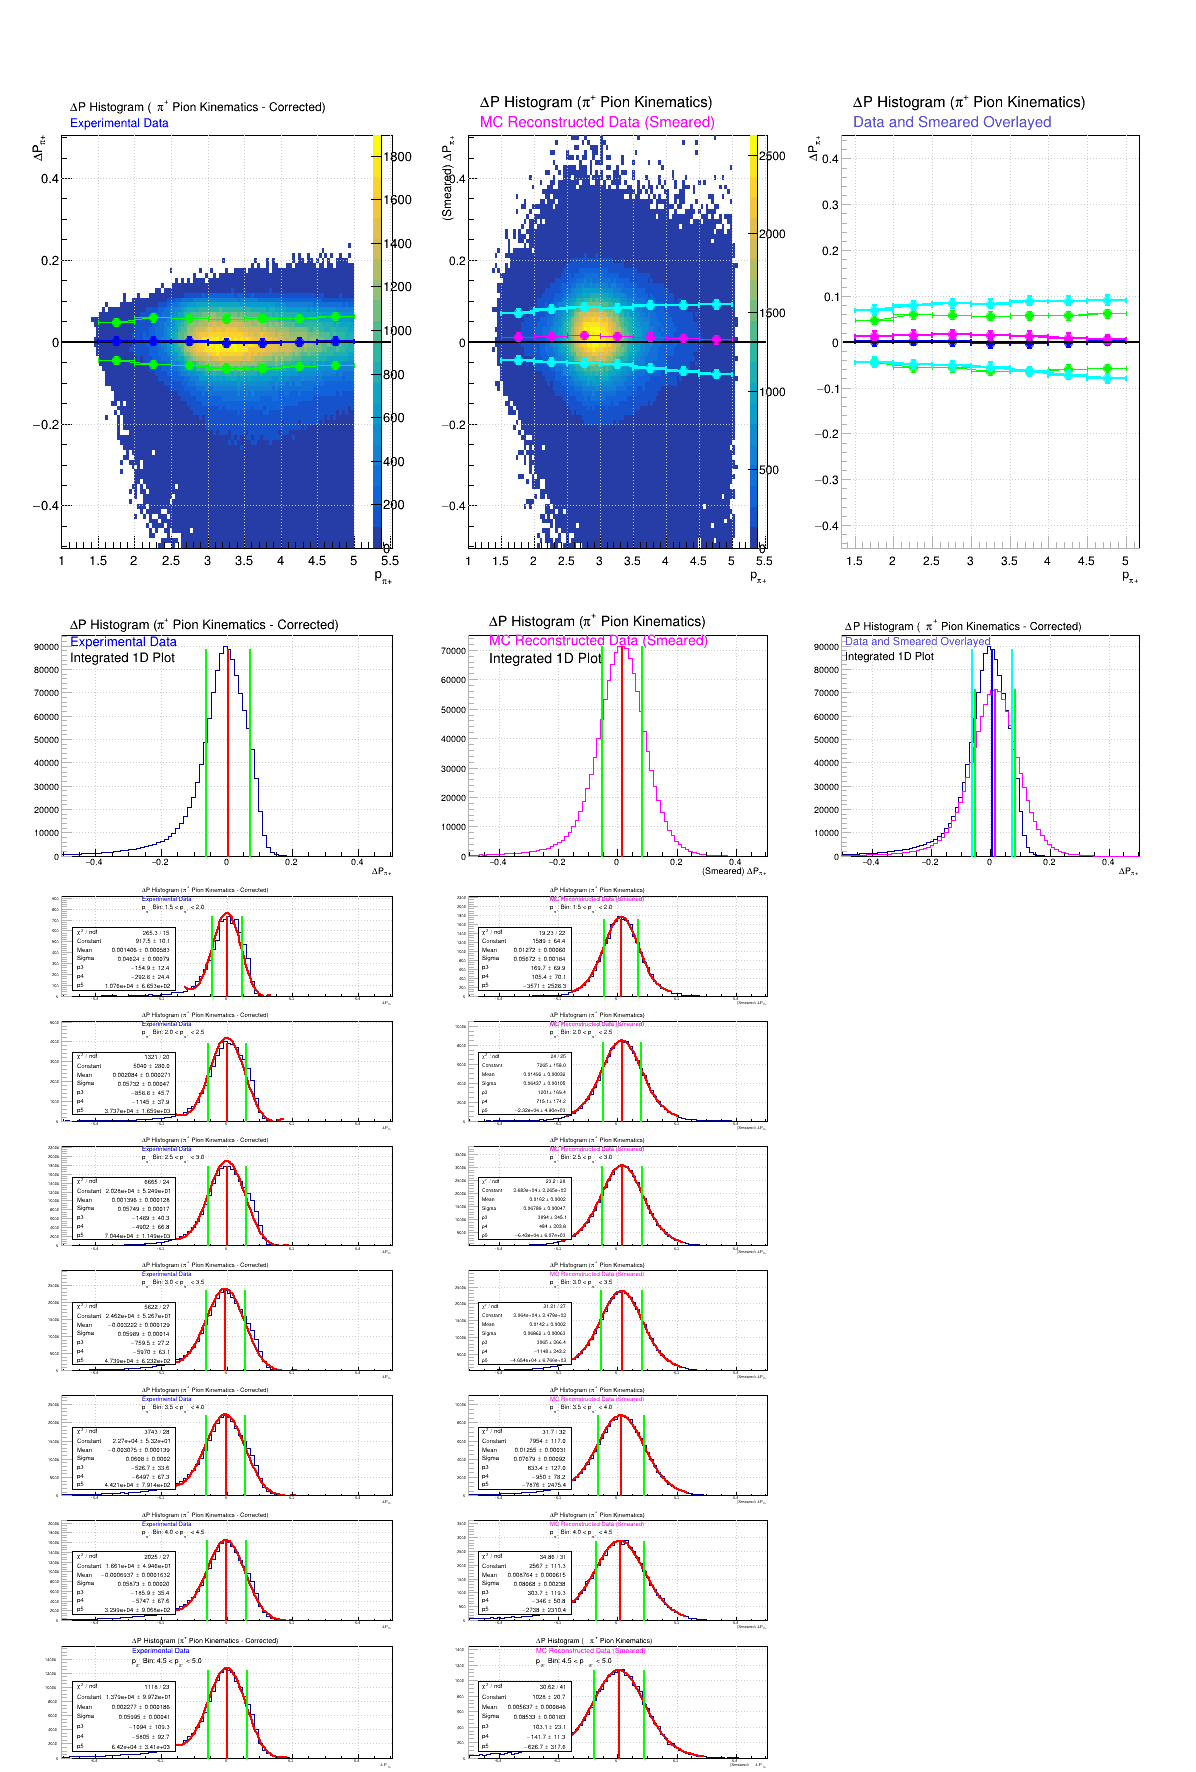

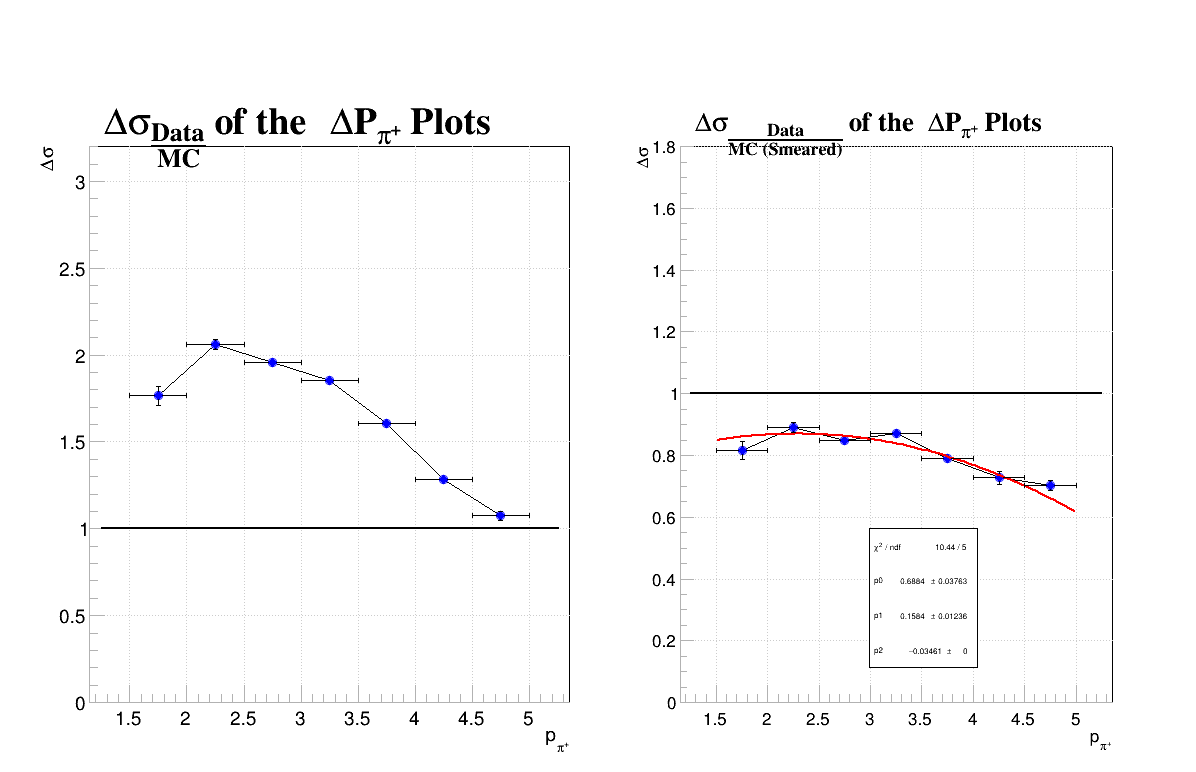

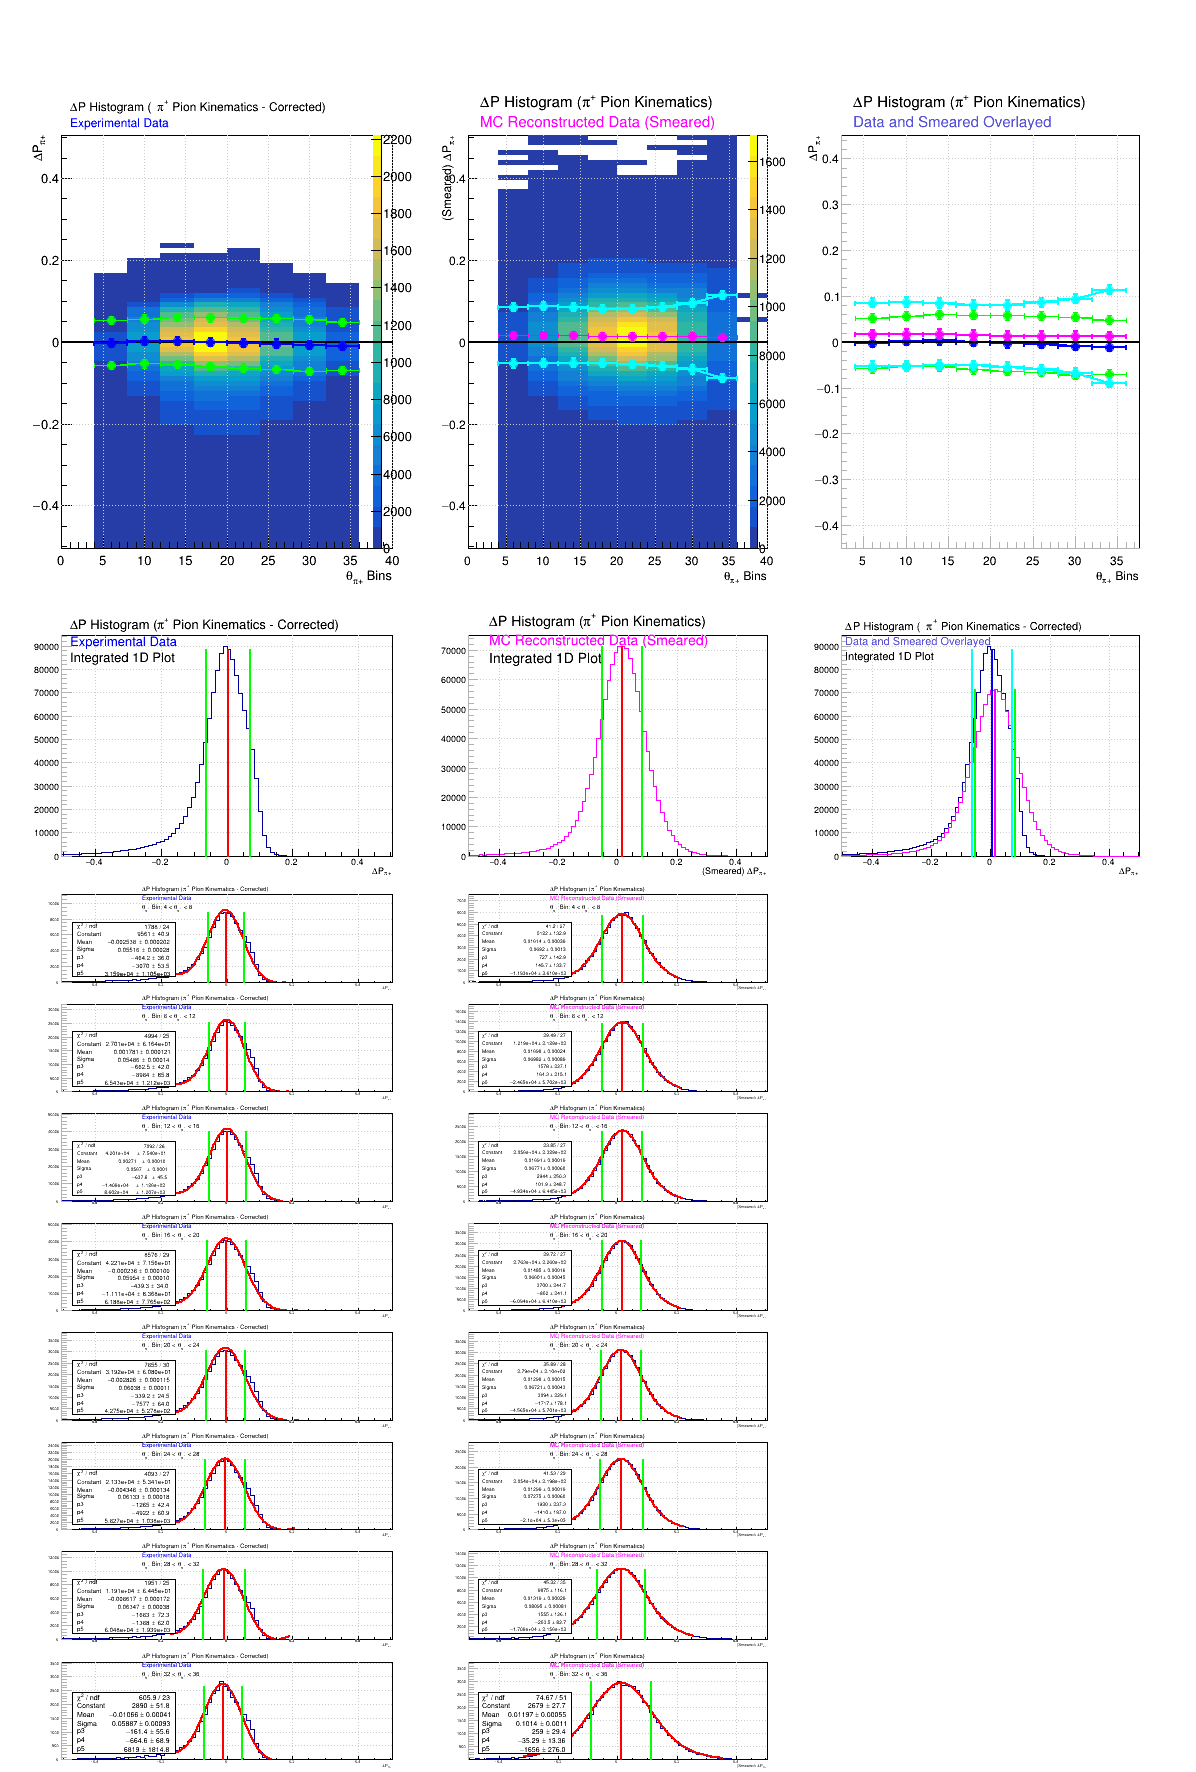

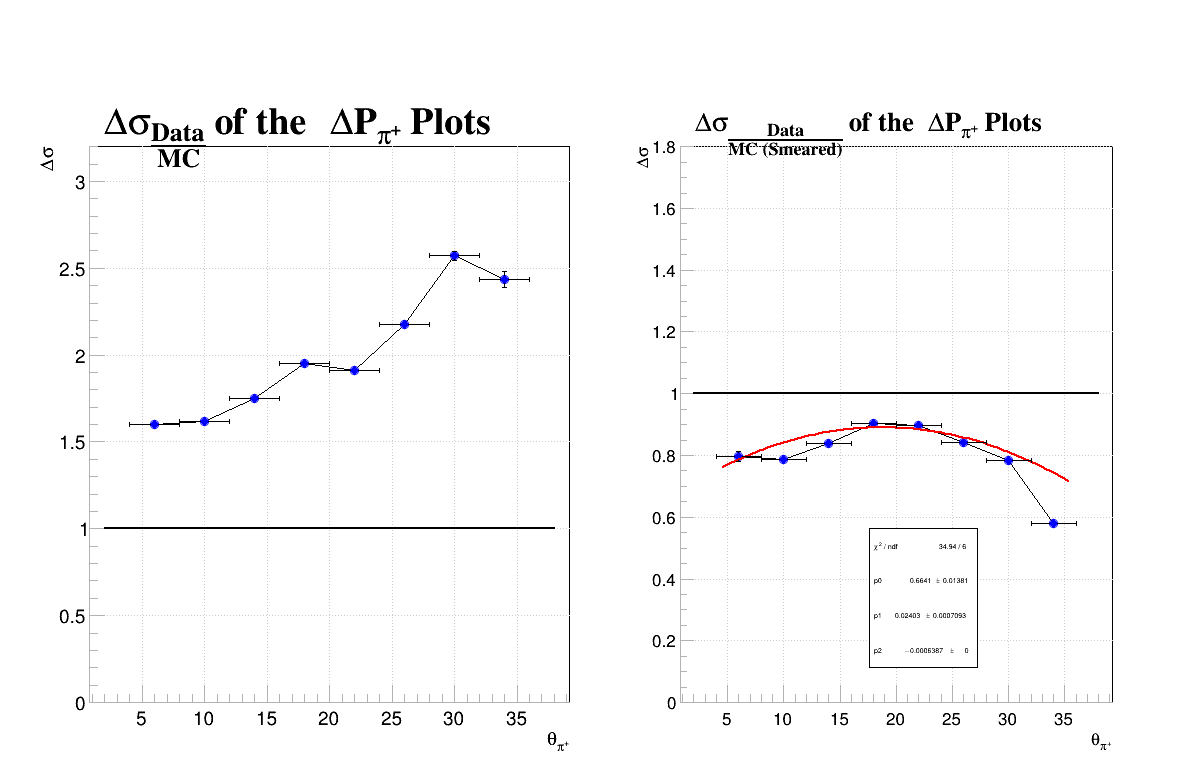

In [33]:
if("Mom_Cor_Histos" in Histo_Type and True):
    MM_or_Delta_List = ["MM"]
    MM_or_Delta_List = ["DP"]
#     MM_or_Delta_List = ["MM", "DP"]
#     MM_or_Delta_List = ["Phase"]
#     MM_or_Delta_List = ["MM", "DP", "Phase"]
    
    # Delta_Mom_or_Theta_List = ["Theta"]
    Delta_Mom_or_Theta_List = ["Mom"]
#     Delta_Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_or_Theta_List = ["Mom"]
#     Mom_or_Theta_List = ["Theta"]
    Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
    
    for MM_or_Delta in MM_or_Delta_List:
        for Delta_Mom_or_Theta in Delta_Mom_or_Theta_List:
            if((MM_or_Delta in ["MM", "Phase"]) and (len(Delta_Mom_or_Theta_List) > 1)):
                if(Delta_Mom_or_Theta != Delta_Mom_or_Theta_List[0]):
                    continue
            
            for Mom_or_Theta in Mom_or_Theta_List:
                try:
                    for ii in rdf.GetListOfKeys():
                        out_print_rdf = str(ii.GetName())

                        out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
                        out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
                        out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")

                        if("Mom_Cor_Code" not in str(out_print)):
                            continue

                        if("cut_Complete_EDIS" not in str(out_print)):
                            continue
                        # if("cut_Complete" not in str(out_print)):
                        #     continue

                        # print(out_print)
                        # Missing Mass Histograms
                        if("Var-D1='MM'" not in str(out_print)):
                            if(MM_or_Delta in ["MM"]):
                                continue
                            # ∆P Histograms Histograms
                            if(MM_or_Delta in ["DP"]):
                                if((Delta_Mom_or_Theta == "Mom") and ("Delta_Pel_Cors" not in str(out_print) and "Delta_Ppip_Cors" not in str(out_print))):
                                    continue
                                # ∆Theta Histograms Histograms
                                if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
                                    continue
                        elif(MM_or_Delta not in ["MM"]):
                            continue

                        if(("Delta" in str(out_print)) and (MM_or_Delta not in ["DP"])):
                            continue
                            
                        if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print))):
                            continue
                            
                        if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='pip'" not in str(out_print))):
                            continue



                        try:
                            if(MM_or_Delta not in ["DP", "MM"]):
                                Mom_Cor_Histos[out_print_rdf]               = rdf.Get(out_print_rdf)
                                Mom_Cor_Histos[out_print_mdf]               = mdf.Get(out_print_mdf)
                                Mom_Cor_Histos[out_print_mdf_smeared]       = mdf.Get(out_print_mdf_smeared)
                                out_print_rdf_SIDIS                         = str(out_print_rdf).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
                                out_print_mdf_SIDIS                         = str(out_print_mdf).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
                                out_print_mdf_smeared_SIDIS                 = str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
                                Mom_Cor_Histos[out_print_rdf_SIDIS]         = rdf.Get(out_print_rdf_SIDIS)
                                Mom_Cor_Histos[out_print_mdf_SIDIS]         = mdf.Get(out_print_mdf_SIDIS)
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = mdf.Get(out_print_mdf_smeared_SIDIS)
                            else:
                                out_print_rdf                         = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_rdf)])
                                out_print_mdf                         = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf)])
                                out_print_mdf_smeared                 = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf_smeared)])
                                Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                                Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                                Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                        except:
                            print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                        # print(type(Mom_Cor_Histos[out_print]))
                        # print(Mom_Cor_Histos[out_print_mdf_smeared])
                        
                        if(MM_or_Delta in ["DP", "MM"]):
                            canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print)])
                        else:
                            canvas_name = out_print
                        # print(out_print)
                        # print(canvas_name)
                        if(MM_or_Delta in ["DP", "MM"]):
                            Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)
                            if(Mom_or_Theta == "Mom"):
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                if("Delta" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    if("Var-D2='el'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                if("MM" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
                                    if("Var-D2='el'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)

                            if(Mom_or_Theta == "Theta"):
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                if("Delta" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    if("Var-D2='el'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                if("MM" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
                                    if("Var-D2='el'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                        
                                        
                        else:
                            Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1000, cd_Space=0)
                            Mom_Cor_Canvas[canvas_name].SetFillColor(root_color.LGrey)
                            #################################
                            ##=====##   Vs Angles   ##=====##
                            #################################
                            ##=====##   Exclusive   ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])] = Mom_Cor_Histos[out_print_rdf].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])] = Mom_Cor_Histos[out_print_mdf].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("vs p", ""))
                            ##=====##     SIDIS     ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            #################################
                            ##=====##  Vs Momentum  ##=====##
                            #################################
                            ##=====##   Exclusive   ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('xz')
                                Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_rdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().GetTitle()).replace("#", ""))
                            ##=====##     SIDIS     ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                Mom_Cor_Histos[out_print_rdf_SIDIS] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                Mom_Cor_Histos[out_print_mdf_SIDIS] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("#", ""))

                        Mom_Cor_Canvas[canvas_name].Draw()
                        try:
                            # Draw_Canvas(canvas=Mom_Cor_Canvas[canvas_name], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                            Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[canvas_name].cd(1)
                            Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[canvas_name].cd(2)
                            
                            
                            
                            if(MM_or_Delta in ["DP", "MM"]):
                                Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_rdf].Draw("colz")
                            else:
                                Mom_Cor_Canvas_cd_2_Slice.Divide(2, 2, 0, 0)
                                # Mom_Cor_Canvas_cd_2_Slice.SetPad(xlow=0.005, ylow=0.0, xup=0.505, yup=1.0)
                                # Mom_Cor_Canvas_cd_2_Slice.SetPad(xlow=0.5, ylow=0.0, xup=0.9, yup=1.0)
                                Mom_Cor_Canvas_cd_2_Slice.SetFillColor(root_color.LGrey)
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_rdf].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.05, xup=0.55, yup=0.55)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_rdf_SIDIS].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.05, yup=1.10)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.1, yup=1.10)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.05, xup=1.05, yup=0.55)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.1, yup=0.55)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Draw("colz")
                                

                            if(MM_or_Delta in ["DP", "MM"]):
                                Tline_Simple_Ideal_2D = ROOT.TLine()
                                Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D.SetLineWidth(2)
                                Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta == "DP") else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta == "DP") else 0.9396)

                                # Mom_Cor_Histos[out_print_rdf].Draw("lego2")
                                # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)

                                Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
                                # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
                                Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
                                out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)




                            if(MM_or_Delta in ["DP", "MM"]):
                                Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                               # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                            else:
                                Mom_Cor_Canvas_cd_1_Slice.Divide(2, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.005, ylow=0.0, xup=0.505, yup=1.0)
                                # Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.5, ylow=0.0, xup=0.9, yup=1.0)
                                # Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.505, ylow=0.0, xup=0.905, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.SetFillColor(root_color.LGrey)
                                
                                # Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.550, xup=0.55, yup=1.10)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.550, xup=0.55, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.550, xup=1.05, yup=1.10)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.550, xup=1.05, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.05, yup=0.55)
                                Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].Draw("colz")
                                
 

                            if(MM_or_Delta in ["DP", "MM"]):
                                Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
                                Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
                                Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta == "DP") else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta == "DP") else 0.9396)

                                Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



                                Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[canvas_name].cd(3)
                                Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)

                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])] = ROOT.TMultiGraph("".join(["Combined_", str(canvas_name)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2# .Clone()
                                # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))

                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))


                                # # print(str(Mom_Cor_Histos[out_print_mdf].GetTitle()))
                                # Mom_Cor_Histos[out_print_rdf].gr2.SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle(Mom_Cor_Histos[out_print_rdf].gr2.GetTitle())

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetTitle(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle())

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerColor(root_color.Blue)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerColor(root_color.Pink)

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineColor(root_color.Blue)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineColor(root_color.Pink)

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineWidth(2)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineWidth(2)

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerSize(1)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerSize(1)

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerStyle(8)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)

                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)

                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(2)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(2)

                                # Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up, "lp")


                                if(MM_or_Delta == "DP"):
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(-0.45, 0.45)
                                else:
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(0.6, 1.2)


                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Draw("AL same")

                                Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
                                Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
                                Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0 if(MM_or_Delta == "DP") else 0.9396, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0 if(MM_or_Delta == "DP") else 0.9396)


                                Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
                                # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_rdf].hy.Clone()
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].hy.GetName()), "_Overlay"]))

                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].Draw("same")
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")


                                out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)


                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


                            Mom_Cor_Canvas[canvas_name].Modified()
                            Mom_Cor_Canvas[canvas_name].Update()

                            palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                            palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                            if(MM_or_Delta in ["DP", "MM"]):
                                try:
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
                                except:
                                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                                try:
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                                except:
                                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



                                Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[canvas_name].cd(4)
                                Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

                                for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                    if(Mom_or_Theta == "Theta"):
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
                                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_4, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[canvas_name].cd(5)
                                Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

                                for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # Mom_Cor_Canvas_cd_6.cd(ii + 1)

                                    if(Mom_or_Theta == "Theta"):
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
                                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    # statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(canvas_name), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Draw()
                                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the ", "#Delta" if(MM_or_Delta == "DP") else "Missing Mass vs ", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)


                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)



                                # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
                                # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
                                MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
                                MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)


                                # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
                                Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

                                npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
                                X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
                                Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

                                X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
                                Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

                                Dx_point = (X2_point - X0_point)/npoints

                                Tline_Simple_Ideal_1D = ROOT.TLine()
                                Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_1D.SetLineWidth(2)
                                Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                try:
                                    Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                try:
                                    Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, 0.05*Par_C, 3.75*Par_C)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, 0.05*Par_B, 3.75*Par_B)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, 0.05*Par_A, 3.75*Par_A)

                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "NBRQ")


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                 statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta == "DP") else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)

                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)


                                # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
                                Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

                                npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                                 X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 2)
#                                 Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 2)
                                X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 3)
                                Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 3)

                                X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                                Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

                                Dx_point = (X2_point - X0_point)/npoints

                                Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                Par_C = Par_B*(-X0_point) + Y0_point

                                try:
                                    Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                try:
                                    Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#                                 if("pip" in str(out_print)):
#                                     for ii in range(0, npoints + 2, 1):
#                                         print(str(ii))
#                                         print("".join(["GetPointX = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(int(ii)))]))
#                                         print("".join(["GetPointY = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(int(ii)))]))
#                                         print("")

                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
                        
#                                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                if(MM_or_Delta == "DP"):
                                    Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_FX_Smear", "BRQ")

                                    # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                    p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
                                    p0_Smearing = "{:.4e}".format(p0_Smearing)

                                    # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                    p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
                                    p1_Smearing = "{:.4e}".format(p1_Smearing)

                                    # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                    p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
                                    p2_Smearing = "{:.4e}".format(p2_Smearing)


                                    print("".join(["""
                    // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta == "DP") else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
                    """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                                    """]))


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                if(MM_or_Delta == "DP"):
                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                        except:
                            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                except:
                    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

    try:
        alert()
    except:
        print("Alerts have not been set...")

else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [25]:
# fail

In [26]:
# if("Mom_Cor_Histos" in Histo_Type and True):
#     Delta_Mom_or_Theta = "Mom"
#     Delta_Mom_or_Theta = "Theta"
#     Mom_or_Theta = "Mom"
#     Mom_or_Theta = "Theta"
#     Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
#     for Delta_Mom_or_Theta in ["Mom", "Theta"]:
#         for Mom_or_Theta in ["Mom", "Theta"]:
#             try:
#                 for ii in rdf.GetListOfKeys():
#                     out_print_rdf = str(ii.GetName())

#                     out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
#                     out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
#                     out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")


#                     if("Mom_Cor_Code" not in str(out_print)):
#                         continue

#                     if("cut_Complete_EDIS" not in str(out_print)):
#                         continue

#         #             print(out_print)
#                     # # Missing Mass Histograms
#                     # if("Var-D1='MM'" not in str(out_print)):
#                     #     continue


#                     # ∆P Histograms Histograms
#                     if((Delta_Mom_or_Theta == "Mom") and ("Delta_Pel_Cors" not in str(out_print) and "Delta_Ppip_Cors" not in str(out_print))):
#                         continue

#                     # ∆Theta Histograms Histograms
#                     if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
#                         continue



#                     if("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print)):
#                         continue

#                     # if(out_print_mdf_smeared in mdf.GetListOfKeys()):
#                     #     print("Good MS")
#                     # else:
#                     #     print(color.RED + "Bad MS" + color.END)
#                     # if(out_print_mdf in mdf.GetListOfKeys()):
#                     #     print("Good MR")
#                     # else:
#                     #     print(color.RED + "Bad MR" + color.END)
#                     # if(out_print_rdf in rdf.GetListOfKeys()):
#                     #     print("Good R")
#                     # else:
#                     #     print(color.RED + "Bad R" + color.END)


#                     try:
#                         Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
#                         Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
#                         Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
#                     except:
#                         print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                     # print(type(Mom_Cor_Histos[out_print]))
#                     # print(Mom_Cor_Histos[out_print_mdf_smeared])

#                     Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])] = Canvas_Create(Name="".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)]), Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)


#                     if(Mom_or_Theta == "Mom"):
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                             Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
#                             Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                             Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                             Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
#                             Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                             Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                             Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                         if("Delta" in out_print):
#                             Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             if("Var-D2='el'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                             if("Var-D2='pip'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                                 # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)

#                     if(Mom_or_Theta == "Theta"):
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                             Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
#                             Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                             Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                             Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
#                             Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                             Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                         if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                             Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                             Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                         if("Delta" in out_print):
#                             Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                             if("Var-D2='el'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                 # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                             if("Var-D2='pip'" in str(out_print)):
#                                 # if("Delta_P" in str(out_print)):
#                                 test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                 Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                 # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)


#                     Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].Draw()
#                     try:
#                         # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].cd(1)
#                         Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
#                         Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         Mom_Cor_Histos[out_print_rdf].Draw("colz")
#         #                 Mom_Cor_Histos[out_print_rdf].Draw("lego2")
#                         # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)
#                         Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
#                         # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
#                         Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                         out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)



#                         Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].cd(2)
#                         Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
#                         Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
#                         Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                         out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



#                         Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].cd(3)
#                         Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
#                         Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])] = ROOT.TMultiGraph("".join(["Combined_", str(out_print_rdf)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2# .Clone()
#                         # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))

#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))


#                         # # print(str(Mom_Cor_Histos[out_print_mdf].GetTitle()))
#                         # Mom_Cor_Histos[out_print_rdf].gr2.SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                         # Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle(Mom_Cor_Histos[out_print_rdf].gr2.GetTitle())

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetTitle(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle())

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerColor(root_color.Blue)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerColor(root_color.Pink)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineColor(root_color.Blue)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineColor(root_color.Pink)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetLineWidth(2)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineWidth(2)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerSize(1)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerSize(1)

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetMarkerStyle(8)
#                         Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerStyle(8)

#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)

#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)

#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
#                         Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)

#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)

#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(2)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
#                         Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(2)

#         #                 Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up, "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up, "lp")


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].GetYaxis().SetRangeUser(-0.45, 0.45)


#                         Mor_Cor_MultiGraph["".join(["Combined_", str(out_print_rdf)])].Draw("AL same")


#         # #                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("AP same")
#         # #                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("AP same")
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("AP same")
#         #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("AP same")

#         #                 Mom_Cor_Histos[out_print_rdf].gr2.Draw("AP same")
#         # #                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("AP same")


#                         Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                         Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # ROOT.gPad.SetLogz(1)
#                         # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
#                         # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_rdf].hy.Clone()
#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].hy.GetName()), "_Overlay"]))

#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
#                         Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].Draw("same")
#                         Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
#                         Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")


#                         out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)


#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
#                         # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                         TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
#                         # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
#                         TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


#                         Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].Modified()
#                         Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].Update()

#                         palette_move(canvas=Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                         # palette_move(canvas=Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])], histo=Mom_Cor_Histos[out_print_mdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                         palette_move(canvas=Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#                         try:
#                             # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
#                             Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#         #                 try:
#         #                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")
#         #                 except:
#         #                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#         #                 try:
#         #                     # Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#         #                 except:
#         #                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                         try:
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7) # root_color.Green)
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                             Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



#                         Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].cd(4)
#                         Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

#                         for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                             if(Mom_or_Theta == "Theta"):
#                                 Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                             Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
#                             Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


#         #                 Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[out_print].cd(5)
#         #                 Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)

#         #                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     # Mom_Cor_Canvas_cd_5.cd(ii + 1)

#         #                     if(Mom_or_Theta == "Theta"):
#         #                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))


#         #                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
#         #                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#         #                 Mom_Cor_Canvas_cd_6 = Mom_Cor_Canvas[out_print].cd(6)
#         #                 Mom_Cor_Canvas_cd_6.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

#         #                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#         #                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_6, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         #                     # Mom_Cor_Canvas_cd_6.cd(ii + 1)

#         #                     if(Mom_or_Theta == "Theta"):
#         #                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#         #                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#         #                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#         #                     TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])


#                         Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas["".join([str(out_print), "_", str(Delta_Mom_or_Theta), "_", str(Mom_or_Theta)])].cd(5)
#                         Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

#                         for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                             Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                             # Mom_Cor_Canvas_cd_6.cd(ii + 1)

#                             if(Mom_or_Theta == "Theta"):
#                                 Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                             Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#                             Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                             TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])


#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(out_print), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Draw()
#                         Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)



#                         # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
#                         # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
#                         MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                         MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)


#                         # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                         # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                         X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
#                         Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

#                         npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
#                         X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
#                         Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

#                         X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
#                         Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

#                         try:
#                             Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         try:
#                             Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                         Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, 0.05*Par_C, 3.75*Par_C)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, 0.05*Par_B, 3.75*Par_B)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, 0.05*Par_A, 3.75*Par_A)

#                         Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "BRQ")


#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()

#                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                         Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)


#                         # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)



#                         X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
#                         Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

#                         npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                         X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(5 if("pip" in str(out_print)) else 2)
#                         Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(5 if("pip" in str(out_print)) else 2)

#                         X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                         Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

#                         Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                         Par_C = Par_B*(-X0_point) + Y0_point

#                         try:
#                             Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         try:
#                             Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                         except Exception as e:
#                             print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                             Par_A = 0

#                         Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                         Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#         #                 if("pip" in str(out_print)):
#         #                     for ii in range(0, npoints + 2, 1):
#         #                         print(str(ii))
#         #                         print("".join(["GetPointX = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(int(ii)))]))
#         #                         print("".join(["GetPointY = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(int(ii)))]))
#         #                         print("")

#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                         Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                         # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_FX_Smear", "BRQ")

#                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
#                         p0_Smearing = "{:.4e}".format(p0_Smearing)

#                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
#                         p1_Smearing = "{:.4e}".format(p1_Smearing)

#                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
#                         p2_Smearing = "{:.4e}".format(p2_Smearing)


#                         print("".join(["""

#             // From ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta" , "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Sigma distributions:
#             """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);

#                         """]))


#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Modified()
#                         Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Update()

#                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                     except:
#                         print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#             except:
#                 print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#     try:
#         alert()
#     except:
#         print("Alerts have not been set...")

# else:
#     print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [27]:
# fail

.

.

.

## Saving Smearing Histos

In [28]:
if(SaveChoice == 'yes' or True):
    for Canvas_name in Mom_Cor_Canvas:
        Save_Name = "".join([str(str(Canvas_name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
        Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_el_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_Theta_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_pip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_Theta_Pip_Histograms"), ".png"])
        
        Save_Name = "".join([str(str(Canvas_name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
        Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_el_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_Theta_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_pip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_Theta_Pip_Histograms"), ".png"])
                                                                                                                                                                  
        Save_Name = str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='MM'-[NumBins=500, MinBin=0, MaxBin=3.5]), ", "Missing_Mass")
        
        Save_Name = str(Save_Name).replace("Vs_Mom_Missing_Mass(Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Missing_Mass_Vs_P_El")
        Save_Name = str(Save_Name).replace("Vs_Theta_Missing_Mass(Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Missing_Mass_Vs_Theta_El")
        Save_Name = str(Save_Name).replace("Vs_Mom_Missing_Mass(Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Missing_Mass_Vs_P_Pip")
        Save_Name = str(Save_Name).replace("Vs_Theta_Missing_Mass(Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Missing_Mass_Vs_Theta_Pip")
        
#         Save_Name = str(Save_Name).replace("Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "_Vs_P_El" if("Mom" in Mom_or_Theta_List) else "_Vs_Theta_El")
#         Save_Name = str(Save_Name).replace("Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "_Vs_P_Pip" if("Mom" in Mom_or_Theta_List) else "_Vs_Theta_Pip")

        Save_Name = str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), ", "")
        
        Save_Name = "".join(["Modified_", str(Save_Name)])
        
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='elth'-[NumBins=200, MinBin=0, MaxBin=40]), Var-D2='elPhi'-[NumBins=360, MinBin=0, MaxBin=360]))", "Phase_Space_El_Theta_V_Phi")
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='pipth'-[NumBins=200, MinBin=0, MaxBin=40]), Var-D2='pipPhi'-[NumBins=360, MinBin=0, MaxBin=360]))", "Phase_Space_Pip_Theta_V_Phi")
        
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='elth'-[NumBins=200, MinBin=0, MaxBin=40]), (Var-D2='elPhi'-[NumBins=360, MinBin=0, MaxBin=360]), (Var-D3='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Phase_Space_El_SIDIS_Exclusive_Compare")
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='pipth'-[NumBins=200, MinBin=0, MaxBin=40]), (Var-D2='pipPhi'-[NumBins=360, MinBin=0, MaxBin=360]), (Var-D3='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Phase_Space_Pip_SIDIS_Exclusive_Compare")
        
        Save_Name = str(Save_Name).replace("Modified_Vs_Theta", "Vs_Theta_Modified")
        Save_Name = str(Save_Name).replace("Modified_Vs_Mom", "Vs_Mom_Modified")
        Save_Name = Save_Name.replace(".png.png", ".png")
        
        if(MC_REC_File_Name == "New_Smearing_Creation_All"):
            Save_Name = Save_Name.replace("Modified", "FX")
        
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        # Mom_Cor_Canvas[Canvas_name].Draw()
        if(SaveChoice == 'yes'):
            Mom_Cor_Canvas[Canvas_name].SaveAs(Save_Name)
            # break
        else:
            # Mom_Cor_Canvas[Canvas_name].Draw()
            print("".join([color.RED, "Not actually saving...", color.END]))

    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))


Save Name: Vs_Mom_Modified_Delta_P_Pip_Histograms.png
Not actually saving...

Save Name: Vs_Mom_Modified_Delta_P_Pip_Histograms_Smear_Compare.png
Not actually saving...

Save Name: Vs_Theta_Modified_Delta_P_Pip_Histograms.png
Not actually saving...

Save Name: Vs_Theta_Modified_Delta_P_Pip_Histograms_Smear_Compare.png
Not actually saving...


DONE SAVING



In [29]:
# fail

.

.

.

# Plot Creation (Each Dataframe at the same time)

In [30]:
Q2_xB_Bin = 6
Cell_On_Q = True
Cell_On_Q = False
if("rdf" in Data_Choice and "mdf" in Data_Choice and "gdf" in Data_Choice and Cell_On_Q):
    Unfolded_Canvas, Legends, Bin_Unfolded, Bin_Acceptance, Unfolding_Histogram_1_Norm_Clone, Save_Response_Matrix, Parameter_List_Unfold, Parameter_List_Bin = {}, {}, {}, {}, {}, {}, [], []
    try:
        del already_notified
    except:
        # print("First run of this cell...")
        print("")
    
    count, count_unfolded = 0, 0
    for ii in mdf.GetListOfKeys():
        out_print_main = str(ii.GetName()).replace("mdf", "DataFrame_Type")
        if("DataFrame_Type" not in out_print_main):
            # print("".join(["Skipping: ", str(out_print_main)]))
            continue
        
        count += 1
        out_print_main_rdf = out_print_main.replace("DataFrame_Type", "rdf")
        out_print_main_mdf = out_print_main.replace("DataFrame_Type", "mdf")
        out_print_main_gdf = out_print_main.replace("DataFrame_Type", "gdf")
        
        ################################################################################
        ##=============##    Removing Cuts from the Generated files    ##=============##
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_EDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_SIDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete", "no_cut")
        ##=============##    Removing Cuts from the Generated files    ##=============##
        ################################################################################
        
        
        #############################################################################
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        out_print_main_rdf = out_print_main_rdf.replace("_smeared", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear_", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear", "")
        out_print_main_gdf = out_print_main_gdf.replace("_smeared", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear_", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear", "")
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        #############################################################################
        
        
        #############################################################################
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        #############################################################################

        if(out_print_main_mdf not in mdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, str(out_print_main_mdf), color.END, "\n"]))
            continue
        
        if(out_print_main_rdf not in rdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN RDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.BLUE, str(out_print_main_rdf), color.END, "\n"]))
            continue
            
        if(out_print_main_gdf not in gdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.GREEN, str(out_print_main_gdf), color.END, "\n"]))
            continue
    
    
    #############################################################################
    ##===============##     Unfolding Histogram Procedure     ##===============##
        Conditions_For_Unfolding = ["Unfold" in Histo_Type]
        Conditions_For_Unfolding = [True]

        ## Correct Histogram Type:
#         Conditions_For_Unfolding.append("'Response_Matrix_Normal'" not in str(out_print_main))
        Conditions_For_Unfolding.append("'Response" in str(out_print_main))
        Conditions_For_Unfolding.append("'Response_Matrix_Normal_1D'" not in str(out_print_main))

        ## Correct Cuts:
        Conditions_For_Unfolding.append("no_cut" not in str(out_print_main))
        Conditions_For_Unfolding.append("cut_Complete_EDIS" not in str(out_print_main))

        ## Correct Variable(s):
        Conditions_For_Unfolding.append("phi_t" in str(out_print_main))
        # Conditions_For_Unfolding.append("'phi_t" not in str(out_print_main))
        # Conditions_For_Unfolding.append("'xB" in str(out_print_main))
        # Conditions_For_Unfolding.append("'Combined_Q2_xB_Bin_2_" not in str(out_print_main))
        Conditions_For_Unfolding.append("'Combined_" not in str(out_print_main))

        ## Correct Binning:
        # Conditions_For_Unfolding.append("Q2-xB-Bin=1" in str(out_print_main))
        Conditions_For_Unfolding.append("Q2-xB-Bin=All" not in str(out_print_main))

        # Smearing Options:
        # Conditions_For_Unfolding.append("(Smear-Type='')" not in str(out_print_main))
        # Conditions_For_Unfolding.append("(Smear-Type='')" in str(out_print_main))
        
# #         Conditions_For_Unfolding.append("no_cut" not in str(out_print_main))
# #         Conditions_For_Unfolding.append("cut_Complete_EDIS" not in str(out_print_main))
#         Conditions_For_Unfolding.append("Response_Matrix_Normal" in str(out_print_main))
#         Conditions_For_Unfolding.append("Response_Matrix_Normal_1D" not in str(out_print_main))
        
# #         Conditions_For_Unfolding.append("'phi_t'" not in str(out_print_main))
# #         Conditions_For_Unfolding.append("'xB'" in str(out_print_main))
        
#         # Conditions_For_Unfolding.append("Q2-xB-Bin=1" in str(out_print_main))
  

#         # Conditions_For_Unfolding.append("Q2-xB-Bin=All" not in str(out_print_main))
    
    
# #         Conditions_For_Unfolding.append(("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print_main)))
        
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=1" in str(out_print_main)) or ("Q2-xB-Bin=3" in str(out_print_main)) or ("Q2-xB-Bin=5" in str(out_print_main)) or ("Q2-xB-Bin=7" in str(out_print_main)))
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=1" in str(out_print_main)) or ("Q2-xB-Bin=3" in str(out_print_main)) or ("Q2-xB-Bin=5" in str(out_print_main)))
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=8" in str(out_print_main)))
    
# #         Conditions_For_Unfolding.append(("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print_main)) or ("".join(["Q2-xB-Bin=1"]) in str(out_print_main)))
        
#         # if(Common_Name == "Unfolding_Tests_V3_All"):
#         #     Conditions_For_Unfolding.append("(Smear-Type='')" in str(out_print_main))
#         #     Conditions_For_Unfolding.append("Q2-xB-Bin=All" in str(out_print_main))
#         #     Conditions_For_Unfolding.append("Var-D1='phi_t'" in str(out_print_main))
#         # else:
#         #     # For Default (Variable) Selections:
        
# #         Conditions_For_Unfolding.append(Histo_Search_Function(Histo_Name=out_print_main, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])

        if(False not in Conditions_For_Unfolding):
            print(out_print_main)
            
            if("'Response_Matrix_Normal_1D'" in str(out_print_main)):
                print("".join([color.RED, color.BOLD, "ERROR: ", str(out_print_main), color.END]))
                continue
            
            ExREAL_1D_initial   = rdf.Get(out_print_main_rdf)
            MC_REC_1D_initial   = mdf.Get(out_print_main_mdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'"))
            MC_GEN_1D_initial   = gdf.Get(out_print_main_gdf)
            Response_2D_initial = mdf.Get(out_print_main_mdf)
#         elif("Response_Matrix_Normal" in str(out_print_main)):
#             print("".join([color.BOLD, "Not Running: ", str(out_print_main), color.END]))
#         if(False not in Conditions_For_Unfolding):
            
            
            
            
            
            
            
            
            
    ###############################################################################################
    ###############################################################################################
    ###==========##==========###     z-pT Binning Dimensions Slice     ###==========##==========###
            
            Q2_xB_Bin_Unfold = 0 if("Q2-xB-Bin=All" in str(out_print_main)) else 1 if("Q2-xB-Bin=1" in str(out_print_main)) else 2 if("Q2-xB-Bin=2" in str(out_print_main)) else 3 if("Q2-xB-Bin=3" in str(out_print_main)) else 4 if("Q2-xB-Bin=4" in str(out_print_main)) else 5 if("Q2-xB-Bin=5" in str(out_print_main)) else 6 if("Q2-xB-Bin=6" in str(out_print_main)) else 7 if("Q2-xB-Bin=7" in str(out_print_main)) else 8 if("Q2-xB-Bin=8" in str(out_print_main)) else 9 if("Q2-xB-Bin=9" in str(out_print_main)) else 10 if("Q2-xB-Bin=10" in str(out_print_main)) else "Undefined..."
            if(type(Q2_xB_Bin_Unfold) is str):
                print("".join([color.RED, color.BOLD, "\nERROR - Q2_xB_Bin_Unfold = ", str(Q2_xB_Bin_Unfold), color.END]))
            
            test = Canvas_Create(Name="".join([str(out_print_main), str(Q2_xB_Bin_Unfold)]), Num_Columns=1, Num_Rows=1, Size_X=60, Size_Y=80, cd_Space=0)
            test.Draw()
            
            z_pT_Bin_Range = 1 if("Q2-xB-Bin=All" in str(out_print_main)) else 49 if(Q2_xB_Bin_Unfold in [1, 2, 3]) else 42 if(Q2_xB_Bin_Unfold in [4]) else 36 if(Q2_xB_Bin_Unfold in [5]) else 25 if(Q2_xB_Bin_Unfold in [6, 7]) else 20 if(Q2_xB_Bin_Unfold in [8]) else 1
            z_pT_Bin_Range = 1
            
            for z_pT_Bin_Unfold in range(0, z_pT_Bin_Range + 1, 1):
                # Bin_Title = "" if(z_pT_Bin_Unfold == 0) else "".join(["z-P_{T} Bin: ", str(z_pT_Bin_Unfold)])
                
                if(((Q2_xB_Bin_Unfold in [1, 2]) and (z_pT_Bin_Unfold in [49])) or (Q2_xB_Bin_Unfold == 3 and z_pT_Bin_Unfold in [49, 48, 42]) or (Q2_xB_Bin_Unfold == 4 and z_pT_Bin_Unfold in [42]) or (Q2_xB_Bin_Unfold == 5 and z_pT_Bin_Unfold in [36])):
#                 if(z_pT_Bin_Unfold != 0):
                    # print("Testing z_pT_Bin_Unfold...")
                    continue
                    # break
            
                if(Q2_xB_Bin_Unfold != 1 and z_pT_Bin_Unfold != 1):
                    continue
                    
        #########################################################
        ##===============##     3D Slices     ##===============##

                if("3D" in str(type(Response_2D_initial))):
                    try:
                        bin_Response_2D_0, bin_Response_2D_1 = Response_2D_initial.GetZaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), Response_2D_initial.GetZaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else Response_2D_initial.GetNbinsZ())
                        if(z_pT_Bin_Unfold != 0):
                            Response_2D_initial.GetZaxis().SetRange(bin_Response_2D_0, bin_Response_2D_1)
                        Response_2D = Response_2D_initial.Project3D('yx')
                        Response_2D.SetName(str(Response_2D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])))
                        Response_2D_Title_New = (str(Response_2D.GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        Response_2D.SetTitle(Response_2D_Title_New)
                        # print(str(Response_2D.GetTitle()))
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (Response_2D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    Response_2D = Response_2D_initial

        ##===============##     3D Slices     ##===============##
        #########################################################
                    

        #########################################################
        ##===============##     2D Slices     ##===============##
                if("2D" in str(type(ExREAL_1D_initial))):
                    try:
                        bin_ExREAL_1D_0, bin_ExREAL_1D_1 = ExREAL_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), ExREAL_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else ExREAL_1D_initial.GetNbinsY())
                        ExREAL_1D = ExREAL_1D_initial.ProjectionX(str(ExREAL_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_ExREAL_1D_0, bin_ExREAL_1D_1)
                        ExREAL_1D_Title_New = str(ExREAL_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        ExREAL_1D.SetTitle(ExREAL_1D_Title_New)
                        # print("\n" + color.BOLD + str(ExREAL_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (ExREAL_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nExREAL_1D already is a 1D Histogram...")
                    ExREAL_1D = ExREAL_1D_initial

                if("2D" in str(type(MC_REC_1D_initial))):
                    try:
                        bin_MC_REC_1D_0, bin_MC_REC_1D_1 = MC_REC_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), MC_REC_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else MC_REC_1D_initial.GetNbinsY())
                        MC_REC_1D = MC_REC_1D_initial.ProjectionX(str(MC_REC_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_MC_REC_1D_0, bin_MC_REC_1D_1)
                        MC_REC_1D_Title_New = str(MC_REC_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        MC_REC_1D.SetTitle(MC_REC_1D_Title_New)
                        # print("\n" + color.BOLD + str(MC_REC_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (MC_REC_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nMC_REC_1D already is a 1D Histogram...")
                    MC_REC_1D = MC_REC_1D_initial

                if("2D" in str(type(MC_GEN_1D_initial))):
                    try:
                        bin_MC_GEN_1D_0, bin_MC_GEN_1D_1 = MC_GEN_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), MC_GEN_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else MC_GEN_1D_initial.GetNbinsY())
                        MC_GEN_1D = MC_GEN_1D_initial.ProjectionX(str(MC_GEN_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_MC_GEN_1D_0, bin_MC_GEN_1D_1)
                        MC_GEN_1D_Title_New = str(MC_GEN_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        MC_GEN_1D.SetTitle(MC_GEN_1D_Title_New)
                        # print("\n" + color.BOLD + str(MC_GEN_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (MC_GEN_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nMC_GEN_1D already is a 1D Histogram...")
                    MC_GEN_1D = MC_GEN_1D_initial

        ##===============##     2D Slices     ##===============##
        #########################################################


                # print("".join(["\n'ExREAL_1D' = ", str(type(ExREAL_1D))]))
                # print("".join(["\n'MC_REC_1D' = ", str(type(MC_REC_1D))]))
                # print("".join(["\n'MC_GEN_1D' = ", str(type(MC_GEN_1D))]))
                # print("".join(["\n'Response_2D' = ", str(type(Response_2D))]))


    
    ###==========##==========###     z-pT Binning Dimensions Slice     ###==========##==========###
    ###############################################################################################
    ###############################################################################################
            
            
            
            
            
            
            
            


                if("phi_t" not in out_print_main and "'phi_t_smeared'" not in out_print_main):
                    if((Q2_xB_Bin_Unfold != 0) or (z_pT_Bin_Unfold != 0)):
                        # Do not plot other variables that are not phi_t
                        continue
                        
                    # Extra Y-Bins in 2D Histogram:
                    for ybin in range(0, Response_2D.GetYaxis().GetNbins() + 2, 1):
                        Response_2D.SetBinContent(0, ybin, 0)
                        if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                            Response_2D.SetBinContent(1, ybin, 0)

                    # Extra Bins in 1D Histogram:
                    ExREAL_1D.SetBinContent(0, 0)
                    MC_REC_1D.SetBinContent(0, 0)
                    MC_GEN_1D.SetBinContent(0, 0)
                    ExREAL_1D.SetBinContent(ExREAL_1D.GetNbinsX() + 1, 0)
                    MC_REC_1D.SetBinContent(MC_REC_1D.GetNbinsX() + 1, 0)
                    MC_GEN_1D.SetBinContent(MC_GEN_1D.GetNbinsX() + 1, 0)
                    if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                        ExREAL_1D.SetBinContent(1, 0)
                        MC_REC_1D.SetBinContent(1, 0)
                        MC_GEN_1D.SetBinContent(1, 0)



                ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Cut: No Cuts", "")).replace("Cut:  No Cuts", ""))
                Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))


                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))

                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))

                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))


                ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("_{t}", "_{h}")))
                ExREAL_1D.GetXaxis().SetTitle((str(ExREAL_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("_{t}", "_{h}")))
                MC_REC_1D.GetXaxis().SetTitle((str(MC_REC_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("_{t}", "_{h}")))
                MC_GEN_1D.GetXaxis().SetTitle((str(MC_GEN_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.GetXaxis().SetTitle((str(Response_2D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.GetYaxis().SetTitle((str(Response_2D.GetYaxis().GetTitle()).replace("_{t}", "_{h}")))

                # minBin, maxBin, numBin = [-1.5, 9.5, 13] if("Q2_xB_Bin_2" in out_print_main) else [1.8, 12, 20] if("Q2" in out_print_main) else [0.09, 0.83, 20] if("xB" in out_print_main) else [0.12, 0.75, 20] if("z" in out_print_main) else [0, 360, 36] if("phi_t" in out_print_main) else [0, 1.05, 20] if("pT" in out_print_main) else [0, 360, 36]
                # nBins_CVM = numBin
                # MinBinCVM = ExREAL_1D.FindBin(minBin)
                # MaxBinCVM = ExREAL_1D.FindBin(maxBin)
                # if(Common_Name != "Unfolding_Tests_V3_All"):
                #     ExREAL_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # Experimental/real data (rdf)
                #     MC_REC_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Reconstructed data (mdf)
                #     MC_GEN_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Generated data (gdf)
                #     Response_2D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (X axis --> GEN)
                #     Response_2D.GetYaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (Y axis --> REC)

                count_unfolded += 1
                try:
                    
                    out_print_main_binned = out_print_main.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)]))
                    
                    try:
                        Unfolding_Histograms  = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default")
                        Unfolding_Histogram_1 = Unfolding_Histograms[0]
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN SVD UNFOLDING ('Unfolding_Histograms'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    try:
                        Bin_Method_Histograms = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Bin")
                        Bin_Unfolded[out_print_main_binned], Bin_Acceptance[out_print_main_binned] = Bin_Method_Histograms
                        
                        
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN BIN UNFOLDING ('Bin_Method_Histograms'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                    Unfolded_Canvas[out_print_main_binned] = Canvas_Create(Name=out_print_main_binned, Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=900, cd_Space=0)
                    # Unfolded_Canvas[out_print_main_binned] = Canvas_Create(Name=out_print_main_binned, Num_Columns=2, Num_Rows=1, Size_X=900, Size_Y=900, cd_Space=0)
                    (Unfolded_Canvas[out_print_main_binned].cd(1)).Divide(2, 1, 0, 0)
                    (Unfolded_Canvas[out_print_main_binned].cd(2)).Divide(2, 1, 0, 0)
                    Unfolded_Canvas[out_print_main_binned].Draw()
                
                
##########################################################################################################################################################
        #################################################
        ##=====##=====##   Axis Ranges   ##=====##=====##
                    try:
                        Unfolded_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[Unfolding_Histogram_1, Bin_Unfolded[out_print_main_binned], MC_GEN_1D], Norm_Q="Norm")
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Unfolded)...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Data_REC_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[ExREAL_1D, MC_REC_1D], Norm_Q="Norm")
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Reconstructed)...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Response_2D.GetXaxis().SetRange(1, Response_2D.GetXaxis().GetNbins() + 2)
                        Response_2D.GetYaxis().SetRange(1, Response_2D.GetYaxis().GetNbins() + 2)
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN 2D Matrix Ranges...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Bin_Unfolded[out_print_main_binned].GetXaxis().SetRange(1, Bin_Unfolded[out_print_main_binned].GetXaxis().GetNbins() + 1)
                        Unfolding_Histogram_1.GetXaxis().SetRange(1, Unfolding_Histogram_1.GetXaxis().GetNbins() + 1)
                        MC_GEN_1D.GetXaxis().SetRange(1, MC_GEN_1D.GetXaxis().GetNbins() + 1)
                        ExREAL_1D.GetXaxis().SetRange(1, ExREAL_1D.GetXaxis().GetNbins() + 1)
                        MC_REC_1D.GetXaxis().SetRange(1, MC_REC_1D.GetXaxis().GetNbins() + 1)
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN 1D X-Axis Ranges...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        ##=====##=====##   Axis Ranges   ##=====##=====##
        #################################################
        ##=====##=====##  Legends Setup  ##=====##=====##
                    if("phi_t" not in out_print_main_binned and "'phi_t_smeared'" not in out_print_main_binned):
                        Legends[(out_print_main_binned, "Unfolded")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                    else:
                        Legends[(out_print_main_binned, "Unfolded")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                    Legends[(out_print_main_binned, "Unfolded")].SetNColumns(1)
                    Legends[(out_print_main_binned, "Unfolded")].SetBorderSize(0)
                    Legends[(out_print_main_binned, "Unfolded")].SetFillColor(0)
                    Legends[(out_print_main_binned, "Unfolded")].SetFillStyle(0)

                    if("phi_t" not in out_print_main_binned and "'phi_t_smeared'" not in out_print_main_binned):
                        Legends[(out_print_main_binned, "REC")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                    else:
                        Legends[(out_print_main_binned, "REC")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                    Legends[(out_print_main_binned, "REC")].SetNColumns(1)
                    Legends[(out_print_main_binned, "REC")].SetBorderSize(0)
                    Legends[(out_print_main_binned, "REC")].SetFillColor(0)
                    Legends[(out_print_main_binned, "REC")].SetFillStyle(0)
        ##=====##=====##  Legends Setup  ##=====##=====##
        #################################################
    

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Unfolded Histogram   ##=====##=====##
                    try:
                        Unfolding_Histogram_1.GetYaxis().SetTitle("Normalized")
                        Unfolding_Histogram_1.SetTitle(str(Unfolding_Histogram_1.GetTitle()).replace("SVD ", ""))
                        Unfolding_Histogram_1.SetMarkerColor(root_color.Pink)
                        Unfolding_Histogram_1.SetLineWidth(3)
                        Unfolding_Histogram_1.SetLineStyle(1)
                        Unfolding_Histogram_1.SetLineColor(root_color.Pink)
                        Unfolding_Histogram_1.SetMarkerSize(1)
                        Unfolding_Histogram_1.SetMarkerStyle(20)

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN DRAWING SVD UNFOLDING ('Unfolding_Histogram_1'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    try:
                        Bin_Unfolded[out_print_main_binned].GetYaxis().SetTitle("Normalized")
                        Bin_Unfolded[out_print_main_binned].SetLineColor(root_color.Brown)
                        Bin_Unfolded[out_print_main_binned].SetLineWidth(2)
                        Bin_Unfolded[out_print_main_binned].SetLineStyle(1)
                        Bin_Unfolded[out_print_main_binned].SetMarkerColor(root_color.Brown)
                        Bin_Unfolded[out_print_main_binned].SetMarkerSize(1)
                        Bin_Unfolded[out_print_main_binned].SetMarkerStyle(21)

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN DRAWING BIN UNFOLDING ('Bin_Unfolded[out_print_main]'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Experimental Histogram   ##=====##=====##
                    try:
                        ExREAL_1D.SetTitle(str(ExREAL_1D.GetTitle()).replace("Experimental", "Reconstucted"))
                        ExREAL_1D.GetYaxis().SetTitle("Normalized")
                        ExREAL_1D.GetXaxis().SetTitle(str(ExREAL_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                        ExREAL_1D.SetLineColor(root_color.Blue)
                        ExREAL_1D.SetLineWidth(2)
                        ExREAL_1D.SetLineStyle(1)
                        ExREAL_1D.SetMarkerColor(root_color.Blue)
                        ExREAL_1D.SetMarkerSize(1)
                        ExREAL_1D.SetMarkerStyle(21)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('ExREAL_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   MC REC Histogram   ##=====##=====##
                    try:
                        MC_REC_1D.GetYaxis().SetTitle("Normalized")
                        MC_REC_1D.GetXaxis().SetTitle(str(MC_REC_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                        MC_REC_1D.SetLineColor(root_color.Red)
                        MC_REC_1D.SetLineWidth(2)
                        MC_REC_1D.SetLineStyle(1)
                        MC_REC_1D.SetMarkerColor(root_color.Red)
                        MC_REC_1D.SetMarkerSize(1)
                        MC_REC_1D.SetMarkerStyle(22)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('MC_REC_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   MC GEN Histogram   ##=====##=====##
                    try:
                        MC_GEN_1D.SetLineColor(root_color.Green)
                        MC_GEN_1D.SetLineWidth(3)
                        MC_GEN_1D.SetLineStyle(1)
                        MC_GEN_1D.SetMarkerColor(root_color.Green)
                        MC_GEN_1D.SetMarkerSize(1)
                        MC_GEN_1D.SetMarkerStyle(20)
                        MC_GEN_1D.GetYaxis().SetTitle("Normalized")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('MC_GEN_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Drawing the Bin-by-Bin Acceptance Histogram (cd: 2-1)   ##=====##=====##
                    try:
                        Bin_Acceptance[out_print_main_binned].SetLineColor(root_color.Red)
                        Bin_Acceptance[out_print_main_binned].SetLineWidth(2)
                        Bin_Acceptance[out_print_main_binned].SetMarkerColor(root_color.Red)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN BIN UNFOLDING ('Bin_Acceptance[out_print_main]'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################
            
    
    
    
    
#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################

        ##################################################################
        ##==========##==========##     CD 1     ##==========##==========##
        ##################################################################
        ##=====##=====##   Drawing the Response Matrix    ##=====##=====##
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(1), cd_num=1, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)
                        ROOT.gPad.SetLogz(1)
                        Response_2D.Draw("colz")
                        Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = Response_2D
                        Unfolded_Canvas[out_print_main_binned].Modified()
                        Unfolded_Canvas[out_print_main_binned].Update()
                        palette_move(canvas=Unfolded_Canvas[out_print_main_binned], histo=Response_2D, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 1:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        ##################################################################
        ##==========##==========##     CD 4     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(2), cd_num=2, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)

                        Unfolding_Histogram_1_Norm = (Unfolding_Histogram_1.DrawNormalized("PL E0 same"))
                        
                        for ii in range(0, Unfolding_Histogram_1_Norm.GetNbinsX() + 1, 1):
                            if(Unfolding_Histogram_1_Norm.GetBinError(ii) > 0.01):
                                print("".join([color.RED, "\n(SVD Unfolded) Bin ", str(ii), " has a large error (after normalizing)...", color.END]))
                                Unfolding_Histogram_1_Norm.SetBinContent(ii, 0)
                                Unfolding_Histogram_1_Norm.SetBinError(ii, 0)
                        
                        Unfolding_Histogram_1_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(Unfolding_Histogram_1, "SVD Unfolded", "lpE")

                        Bin_Unfolded[(out_print_main_binned, "Norm")] = (Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E0 same"))
                        
                        for ii in range(0, Bin_Unfolded[(out_print_main_binned, "Norm")].GetNbinsX() + 1, 1):
                            if(Bin_Unfolded[(out_print_main_binned, "Norm")].GetBinError(ii) > 0.01):
                                print("".join([color.RED, "\n(Bin-by-Bin Unfolded) Bin ", str(ii), " has a large error (after normalizing)...", color.END]))
                                Bin_Unfolded[(out_print_main_binned, "Norm")].SetBinContent(ii, 0)
                                Bin_Unfolded[(out_print_main_binned, "Norm")].SetBinError(ii, 0)
                        
                        # Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E0 same")
                        # Bin_Unfolded[(out_print_main_binned, "Norm")] = (Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E1 same"))
                        # Bin_Unfolded[(out_print_main_binned, "Norm")].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(Bin_Unfolded[out_print_main_binned], "Bin-by-Bin Corrected", "lpE")
                        # Legends[(out_print_main_binned, "Unfolded")].Draw("same")

                        # MC_GEN_1D.Draw("Hist E1 same")
                        Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = MC_GEN_1D.DrawNormalized("PL E0 same")
                        # MC_GEN_1D_Norm = MC_GEN_1D.DrawNormalized("PL E1 same")
                        # MC_GEN_1D_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(MC_GEN_1D, "MC GEN", "lpE")

                        Legends[(out_print_main_binned, "Unfolded")].Draw("same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 4:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

        ##################################################################
        ##==========##==========##     CD 2     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(1), cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                        Bin_Acceptance[out_print_main_binned].Draw("same E1 H")
                        # Bin_Acceptance[out_print_main_binned].DrawNormalized("Hist E1 same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 2:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

        ##################################################################
        ##==========##==========##     CD 3     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(2), cd_num=1, left_add=0.075, right_add=0.05, up_add=0.1, down_add=0.1)
                        ExREAL_1D_Norm = (ExREAL_1D.DrawNormalized("PL E0 same"))
                        Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = ExREAL_1D_Norm
                        ExREAL_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                        Legends[(out_print_main_binned, "REC")].AddEntry(ExREAL_1D, "Experimental", "lpE")

                        Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = MC_REC_1D.DrawNormalized("PL E0 same")
                        # MC_REC_1D_Norm = (MC_REC_1D.DrawNormalized("PL E1 same"))
                        # MC_REC_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                        Legends[(out_print_main_binned, "REC")].AddEntry(MC_REC_1D, "MC REC", "lpE")

                        Legends[(out_print_main_binned, "REC")].Draw("same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 3:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################


                    Unfolded_Canvas[out_print_main_binned].Modified()
                    Unfolded_Canvas[out_print_main_binned].Update()


                    if("phi_t" in out_print_main_binned):
                        # fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h}) + D Cos(3#phi_{h})"
                        # fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)) + [D]*cos(3*x*(3.1415926/180))"
                        fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h})"
                        fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180))"


                        fit_function_title = "A (1 + B Cos(#phi_{h}) + C Cos(2#phi_{h}))"
                        fit_function = "[A]*(1 + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)))"


                        # Q2_xB_Bin_Title = "" if("Q2-xB-Bin=All" in str(out_print_main)) else "".join(["Q^{2}-x_{B} Bin: ", "1" if("Q2-xB-Bin=1" in str(out_print_main)) else "2" if("Q2-xB-Bin=2" in str(out_print_main)) else "3" if("Q2-xB-Bin=3" in str(out_print_main)) else "4" if("Q2-xB-Bin=4" in str(out_print_main)) else "5" if("Q2-xB-Bin=5" in str(out_print_main)) else "6" if("Q2-xB-Bin=6" in str(out_print_main)) else "7" if("Q2-xB-Bin=7" in str(out_print_main)) else "8" if("Q2-xB-Bin=8" in str(out_print_main)) else "9" if("Q2-xB-Bin=9" in str(out_print_main)) else "Error"])
                        Q2_xB_Bin_Title = "" if("Q2-xB-Bin=All" in str(out_print_main)) else "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"])
                    ##################################################################
                    ##==========##         Matrix Unfolded Fits         ##==========##
                    ##################################################################
                        Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])] = Canvas_Create(Name="".join([str(out_print_main_binned), "extra"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                        # Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])] = Canvas_Create(Name="".join([str(out_print_main_binned), "extra"]), Num_Columns=2, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                        Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])].Draw()
                        Draw_Canvas(Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], 1, 0.15)
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])] = Unfolding_Histogram_1_Norm.Clone()
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].SetTitle("".join(["#splitline{#splitline{", root_color.Bold, "{Fitted #color[", str(root_color.Pink),"]{SVD Unfolded} Distribution of #phi_{h}}}{", root_color.Bold, "{Fit Function = ", str(fit_function_title), "}}}{", str(Q2_xB_Bin_Title), "}"]))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetTitle("")
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetTitle(str(Unfolding_Histogram_1_Norm.GetXaxis().GetTitle()).replace("(REC)", ""))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].Draw("PL E1 same")
                        Unfolded_Fit_Function = ROOT.TF1("Unfolded_Fit_Function", str(fit_function), 0, 360)
                        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])])
                        # print("\n".join([str(A_Unfold), str(B_Unfold), str(C_Unfold)]))
        #                             Unfolded_Fit_Function.SetParameter(0, A_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Unfold if(A_Unfold > 0) else 1.25*A_Unfold, 1.25*A_Unfold if(A_Unfold > 0) else 0.85*A_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(1, B_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(1, 0.65*B_Unfold if(B_Unfold > 0) else 1.45*B_Unfold, 1.45*B_Unfold if(B_Unfold > 0) else 0.65*B_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(2, C_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(2, 0.65*C_Unfold if(C_Unfold > 0) else 1.45*C_Unfold, 1.45*C_Unfold if(C_Unfold > 0) else 0.65*C_Unfold)
                        # Unfolded_Fit_Function.SetParameter(0, A_Calc_Fit(Unfolded_C_clone))
                        # Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Calc_Fit(Unfolded_C_clone), 1.25*A_Calc_Fit(Unfolded_C_clone))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].Fit(Unfolded_Fit_Function, "RQ")
                        
                        A_Unfold, B_Unfold, C_Unfold = Unfolded_Fit_Function.GetParameter(0), Unfolded_Fit_Function.GetParameter(1), Unfolded_Fit_Function.GetParameter(2)
                        if("Smear-Type=''" in str(out_print_main_binned)):
                            Parameter_List_Unfold.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold, B_Unfold, C_Unfold, ""])
                        else:
                            Parameter_List_Unfold.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold, B_Unfold, C_Unfold, "Smeared"])
                        
                        # statbox_move_new(Histogram=Unfolding_Histogram_1_Norm, Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
                        statbox_move(Histogram=Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])], Canvas=Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)#, Print_Method="norm"):
                        # Unfolded_C_clone.ShowPeaks()
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetRangeUser(0, 360)
                        
                        
                        Draw_Canvas(Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], 2, 0.15)
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])] = Bin_Unfolded[(out_print_main_binned, "Norm")].Clone()
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].SetTitle("".join(["#splitline{#splitline{", root_color.Bold, "{Fitted #color[", str(root_color.Brown),"]{Bin-By-Bin} Distribution of #phi_{h}}}{", root_color.Bold, "{Fit Function = ", str(fit_function_title), "}}}{", str(Q2_xB_Bin_Title), "}"]))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetTitle("")
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetTitle(str(Bin_Unfolded[(out_print_main_binned, "Norm")].GetXaxis().GetTitle()).replace("(REC)", ""))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].Draw("PL E1 same")
                        Unfolded_Fit_Function = ROOT.TF1("Unfolded_Fit_Function", str(fit_function), 0, 360)
                        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Bin_Unfolded["".join([str(out_print_main_binned), "extra"])])
                        # print("\n".join([str(A_Unfold), str(B_Unfold), str(C_Unfold)]))
        #                             Unfolded_Fit_Function.SetParameter(0, A_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Unfold if(A_Unfold > 0) else 1.25*A_Unfold, 1.25*A_Unfold if(A_Unfold > 0) else 0.85*A_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(1, B_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(1, 0.65*B_Unfold if(B_Unfold > 0) else 1.45*B_Unfold, 1.45*B_Unfold if(B_Unfold > 0) else 0.65*B_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(2, C_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(2, 0.65*C_Unfold if(C_Unfold > 0) else 1.45*C_Unfold, 1.45*C_Unfold if(C_Unfold > 0) else 0.65*C_Unfold)
                        # Unfolded_Fit_Function.SetParameter(0, A_Calc_Fit(Unfolded_C_clone))
                        # Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Calc_Fit(Unfolded_C_clone), 1.25*A_Calc_Fit(Unfolded_C_clone))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].Fit(Unfolded_Fit_Function, "RQ")
                        
                        A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin = Unfolded_Fit_Function.GetParameter(0), Unfolded_Fit_Function.GetParameter(1), Unfolded_Fit_Function.GetParameter(2)
                        if("Smear-Type=''" in str(out_print_main_binned)):
                            Parameter_List_Bin.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin, ""])
                        else:
                            Parameter_List_Bin.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin, "Smeared"])
                        
                        # statbox_move_new(Histogram=Unfolding_Histogram_1_Norm, Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
                        statbox_move(Histogram=Bin_Unfolded["".join([str(out_print_main_binned), "extra"])], Canvas=Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)#, Print_Method="norm"):
                        # Unfolded_C_clone.ShowPeaks()
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetRangeUser(0, 360)


                except:
                    print("".join([color.BOLD, color.RED, "ERROR IN UNFOLDING:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

            print("".join([color.CYAN, color.BOLD, "Finished Unfolding: ", str(Histo_Search_Function(Histo_Name=out_print_main_binned, Search_Option="Default_Var_1D", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[1]), color.END, "\n"]))
            
        elif("Unfold" not in Histo_Type):
            try:
                already_notified += 1
            except:
                print("".join([color.BOLD, color.BLUE, "'Unfold' option not included in Histo_Type list (unfolding not done)", color.END]))
                already_notified = 1
        
    ##===============##     Unfolding Histogram Procedure     ##===============##
    #############################################################################
        
        
    
    
        # if("Response_Matrix_Normal" in str(out_print_main)):
        #     print(out_print_main)
    
    # print("still making this cell...")
    print("".join(["Total: ", str(count)]))
    print("".join(["Total (Unfolded): ", str(count_unfolded)]))
    
else:
    print("Must select all of the Datatypes ('rdf', 'mdf', and 'gdf') to run this cell" if(Cell_On_Q) else "Cell has been manually turned off (let Cell_On_Q = True to run this cell)")
    
print("".join([color.BOLD, "\nDone\n", color.END]))
try:
    alert()
except:
    print("Alerts have not been set...")

Cell has been manually turned off (let Cell_On_Q = True to run this cell)

Done



In [31]:
test_canvas = {}
Smear = ""
for ii in Bin_Unfolded:
    if("'Norm'" not in str(ii)):
        if("smear" in str(ii)):
            Smear = "smear"
        print(ii)
        print("")
        "".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=", "''" if(Smear != "smear") else "'smear'", "), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t", "'" if(Smear != "smear") else "_smeared'" , "-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2", "'" if(Smear != "smear") else "_smeared'" , "-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))"])
        try:
            test_canvas[ii] = Canvas_Create(Name=str(ii), Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
            test_canvas[ii].Draw()
            test_canvas[ii].cd(1)
            Bin_Unfolded[ii].Draw("same")
            print("".join([color.BLUE, "Printing: ", str(type(Bin_Unfolded[ii])), color.END]))
        except:
            print(Bin_Unfolded[ii])
            print("".join([color.RED, "ERROR IN: ", str(ii), color.END]))
            print("")



NameError: name 'Bin_Unfolded' is not defined

.

.

.

.

## Saving Unfolded Histos (Individual)

In [ ]:
if((SaveChoice == 'yes' or True) and Cell_On_Q):
    for Canvas_name in Unfolded_Canvas:
        
        Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), ".png"])
        if("smear" in str(Canvas_name)):
            Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), "_Smeared.png"])
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2_smeared'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=55, MinBin=-3.5, MaxBin=51.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2_smeared'-[NumBins=55, MinBin=-3.5, MaxBin=51.5]))", "")
        Save_Name = Save_Name.replace("Smear-Type=''", "")
        Save_Name = Save_Name.replace("Smear-Type='smear'", "")
        Save_Name = str(str(Save_Name.replace("(", "")).replace(")", "").replace(", ", "_")).replace("'", "")
        Save_Name = str(Save_Name.replace("_Data-Type=DataFrame_Type", "")).replace("extra", "_Unfolded_Histos")
        Save_Name = str(Save_Name.replace("__", "_"))
        Save_Name = str(Save_Name.replace("Histo-Group=", ""))
        Save_Name = str(Save_Name.replace("Data-", ""))
        Save_Name = str(Save_Name.replace("z-PT-Bin=", "_z_pT_Bin_"))
        Save_Name = str(Save_Name.replace("Q2-xB-Bin=", "Q2_xB_Bin_"))
        Save_Name = str(Save_Name.replace("Binning-Type=2-[" , "_")).replace("]", "")
        Save_Name = str(Save_Name.replace("_Cut=cut_Complete_SIDIS", ""))
        Save_Name = Save_Name.replace("__", "_")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0_MaxBin=1.05_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0.11944_MaxBin=0.73056_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0.08977_MaxBin=0.82643_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=1.4805_MaxBin=11.8705_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("Q2_xB_Bin_All_z_pT_Bin_All_1D_Var-D1=", "All_Events_")
#         if("smear" in str(Canvas_name)):
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        if(SaveChoice == 'yes'):
            Unfolded_Canvas[Canvas_name].SaveAs(Save_Name)
        else:
            print("".join([color.RED, "Not actually saving...", color.END]))

        Unfolded_Canvas[Canvas_name].Draw()
    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

In [ ]:
# try:
#     Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])].Draw()
#     print("".join([color.BOLD, color.BLUE, "\nAlready ran this cell (Errors are often encountered when trying to rerun this cell - some histograms may be lost for unknown reasons)\n", color.END]))
# except:
#     Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
#     # for Q2_xB_Bin in range(1, 9, 1):
#     z_pT_Bin_Range = 1 if(Q2_xB_Bin in [0]) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1

#     for ii in rdf.GetListOfKeys():
#         out_print = str(ii.GetName())
#         Conditions_For_Histograms = []
#         Conditions_For_Histograms.append("Normal_2D" in str(out_print))
#         Conditions_For_Histograms.append("cut_Complete_SIDIS" in str(out_print))
#         Conditions_For_Histograms.append(("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)) or ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print)))
#         Conditions_For_Histograms.append(("Q2-xB-Bin=All" in str(out_print) and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))) or (("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print)) and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))))
#         Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
#         if(False not in Conditions_For_Histograms):
#             # print("")
#             # print(out_print)
#             # print("")
#             Main_Unfolding_Images[out_print] = rdf.Get(out_print)
#             z_pT_Bin = 0

#             if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
#                 print("Testing Q2-xB bins...")
#                 break

#     #         if(z_pT_Bin > 30 and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))):
#     #             print("Testing z-pT bins...")
#     #             break

#             out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))


#             try:
#                 if("3D" in str(type(Main_Unfolding_Images[out_print]))):
#                     if(("Response_Matrix" in str(out_print)) and True):
#                         bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsZ())
#                         if(z_pT_Bin != 0):
#                             Main_Unfolding_Images[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
#                         Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yx')
#                         Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
#                         New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                         New_2D_Title = str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")
#                         Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)


#                     elif(("Normal_2D" in str(out_print)) and True):
#                         bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsX())
#                         if(z_pT_Bin != 0):
#                             Main_Unfolding_Images[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
#                         Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yz')
#                         Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
#                         New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                         New_2D_Title = str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")
#                         Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)


#                     else:
#                         bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
#                         if(z_pT_Bin != 0):
#                             Main_Unfolding_Images[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
#                         New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                         Main_Unfolding_Images[out_print].SetTitle(New_2D_Title)

#                 elif("2D" in str(type(Main_Unfolding_Images[out_print]))):
#                     if(("Response_Matrix" in str(out_print)) and True):
#                         bin_1D_0, bin_1D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
#                         Main_Final_Unfolding_Images[out_print_binned] = Main_Final_Unfolding_Images[out_print].ProjectionX(str(Main_Final_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
#                         # Main_Final_Unfolding_Image[out_print_binned] = Main_Final_Unfolding_Image[out_print]
#                         # Main_Final_Unfolding_Image[out_print_binned].SetName(str(Main_Final_Unfolding_Image[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
#                         # Main_Final_Unfolding_Image[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
#                         New_1D_Title = str(Main_Final_Unfolding_Images[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                         New_1D_Title = str(New_1D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")
#                         Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_1D_Title)
#             except:
#                 print("Failed")





#     Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)]), Num_Columns=2, Num_Rows=1, Size_X=5600, Size_Y=5400, cd_Space=0.01)
#     Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])].SetFillColor(root_color.LGrey)
#     Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])].Draw()

#     Unfolded_Canvas_Test_cd_1 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])].cd(1)
#     # Unfolded_Canvas_Test_cd_1.SetFillColor(root_color.Yellow)
#     Unfolded_Canvas_Test_cd_1.Divide(2, 3, 0, 0)


#     cd_test = 1
#     for ii in Main_Final_Unfolding_Images:
#         Draw_Canvas(Unfolded_Canvas_Test_cd_1, cd_test, 0.15)
#         Main_Final_Unfolding_Images[ii].Draw("colz")
#         cd_test += 1

#         Unfolded_Canvas_Test_cd_1.Modified()
#         Unfolded_Canvas_Test_cd_1.Update()

#         palette_move(canvas=Unfolded_Canvas_Test_cd_1, histo=Main_Final_Unfolding_Images[ii], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#         if("Var-D1='Q2'" in str(ii) and "Var-D2='xB'" in str(ii)):
#             Main_Final_Unfolding_Images[ii].SetTitle((Main_Final_Unfolding_Images[ii].GetTitle()).replace("Q^{2}-x_{B} Bin: All", "".join(["#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin) if(Q2_xB_Bin != 0) else "All", "}"])))
#             Q2_xB_borders = {}
#             line_num = 0
#             for b_lines in Q2_xB_Border_Lines(-1):
#                 Q2_xB_borders[line_num] = ROOT.TLine()
#                 Q2_xB_borders[line_num].SetLineColor(1)    
#                 Q2_xB_borders[line_num].SetLineWidth(4)
#                 Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
#                 line_num += 1
#             if(Q2_xB_Bin != 0):
#                 ##=====================================================##
#                 ##==========##     Selecting Q2-xB Bin     ##==========##
#                 ##=====================================================##
#                 line_num_2 = 0
#                 for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
#                     Q2_xB_borders[line_num_2] = ROOT.TLine()
#                     Q2_xB_borders[line_num_2].SetLineColor(2)    
#                     Q2_xB_borders[line_num_2].SetLineWidth(5)
#                     Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
#                     line_num_2 += + 1
#                 ##=====================================================##
#                 ##==========##     Selecting Q2-xB Bin     ##==========##
#                 ##=====================================================##


#         if((Q2_xB_Bin != 0) and ("Var-D1='z'" in str(ii)) and ("Var-D2='pT'" in str(ii))):
#             z_pT_borders = {}
#             Max_z = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
#             Min_z = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
#             Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
#             Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
#             for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
#                 for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
#                     z_pT_borders[zline] = ROOT.TLine()
#                     z_pT_borders[zline].SetLineColor(1)
#                     z_pT_borders[zline].SetLineWidth(4)
#                     z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
#                     z_pT_borders[pTline] = ROOT.TLine()
#                     z_pT_borders[pTline].SetLineColor(1)
#                     z_pT_borders[pTline].SetLineWidth(4)
#                     z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)


#     # Response_Name = "".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])
#     Draw_Canvas(Unfolded_Canvas_Test_cd_1, 3, 0.15)
#     Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("col")

#     try:
#         Draw_Canvas(Unfolded_Canvas_Test_cd_1, 4, 0.15)
#         Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("same")
#         Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("same")
#         Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("same")
#     except:
#         print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


#     Draw_Canvas(Unfolded_Canvas_Test_cd_1, 5, 0.15)
#     Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")

#     Draw_Canvas(Unfolded_Canvas_Test_cd_1, 6, 0.15)
#     Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")


#     Unfolded_Canvas_Test_cd_2 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])].cd(2)
#     Unfolded_Canvas_Test_cd_2.SetFillColor(root_color.LGrey)
#     Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1, 0.001, 0.001)



#     for z_pT_Bin in range(1, z_pT_Bin_Range + 1, 1):
#         Response_Name = "".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])
#         Unfolded_Canvas_Test_cd_2_z_pT_Bin = Unfolded_Canvas_Test_cd_2.cd(z_pT_Bin)
#         Unfolded_Canvas_Test_cd_2_z_pT_Bin.SetTitle("".join(["z-P_{T} Bin ", str(z_pT_Bin)]))
#         Unfolded_Canvas_Test_cd_2_z_pT_Bin.SetFillColor(root_color.LGrey)
#         # print(Unfolded_Canvas_Test_cd_2_z_pT_Bin)
#         Unfolded_Canvas_Test_cd_2_z_pT_Bin.Divide(2, 2, 0, 0)
#         try:
#             Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 1, 0.15)
#             Save_Response_Matrix[Response_Name].Draw("col")
#             # Unfolding_Histogram_1_Norm_Clone["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=1, z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"].Draw("same")

#             try:
#                 Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 2, 0.15)
#                 Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
#                 Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
#                 Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
#             except:
#                 print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#             Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 3, 0.15)
#             Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")

#             Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 4, 0.15)
#             Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")


#         except:
#             print("".join(["Failed on ", str(z_pT_Bin)]))
#             break





#     # for z_pT_Bin_Unfold in range(0, z_pT_Bin_Range + 1, 1):
#     #     print(z_pT_Bin_Unfold)

#     #     if(z_pT_Bin_Unfold > 30):
#     # #                 if(z_pT_Bin_Unfold != 0):
#     #         print("Testing z_pT_Bin_Unfold...")
#     #         break

#     # Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])] = Canvas_Create(Name="".join([str(out_print_main_binned), "extra"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     # Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])].Draw()

#     # for ii in Unfolding_Histogram_1_Norm_Clone:
#     #     print(ii)
#     #     print("")
#     # print("""

#     # =========================================================================================================================================================
#     # =========================================================================================================================================================
#     # =========================================================================================================================================================

#     # """)
#     # for ii in Bin_Unfolded:
#     #     print(ii)
#     #     print("")

.

.

.

.

## Plotting Parameters

In [ ]:
# # Parameter_List_Unfold
# # Parameter_List_Bin

# Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT = {}, {}, {}, {}, {}, {}

# for bin_ii in Parameter_List_Bin:
#     Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C = bin_ii # [0], bin_ii[1]
#     if(z_pT_Bin == 0):
#         continue
#     z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
#     # print(z_value)
#     # print(pT_value)
#     # print("")
    
#     # try:
#     #     Histo_Par_A_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])]
#     # except:
#     #     Histo_Par_A_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])] = ROOT.TGraphErrors()
#     #     Histo_Par_A_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetTitle("Fit Parameter A from bin-by-bin unfolding; z; Parameter A")
#     try:
#         Histo_Par_B_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])]
#     except:
#         print("New")
#         Histo_Par_B_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])] = ROOT.TGraphErrors()
#         Histo_Par_B_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetTitle("Fit Parameter B from bin-by-bin unfolding; z; Parameter B")
#     try:
#         Histo_Par_C_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])]
#     except:
#         print("New")
#         Histo_Par_C_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])] = ROOT.TGraphErrors()
#         Histo_Par_C_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetTitle("Fit Parameter C from bin-by-bin unfolding; z; Parameter C")
    
#     # try:
#     #     Histo_Par_A_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])]
#     # except:
#     #     Histo_Par_A_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])] = ROOT.TGraphErrors()
#     #     Histo_Par_A_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetTitle("Fit Parameter A from bin-by-bin unfolding; P_{T}; Parameter A")
#     try:
#         Histo_Par_B_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])]
#     except:
#         print("New 2")
#         Histo_Par_B_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])] = ROOT.TGraphErrors()
#         Histo_Par_B_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetTitle("Fit Parameter B from bin-by-bin unfolding; P_{T}; Parameter B")
#     try:
#         Histo_Par_C_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])]
#     except:
#         print("New 2")
#         Histo_Par_C_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])] = ROOT.TGraphErrors()
#         Histo_Par_C_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetTitle("Fit Parameter C from bin-by-bin unfolding; P_{T}; Parameter C")
    
#     # Histo_Par_A_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetPoint(Histo_Par_A_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].GetN(), z_value, Par_A)
#     Histo_Par_B_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetPoint(Histo_Par_B_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].GetN(), z_value, Par_B)
#     Histo_Par_C_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetPoint(Histo_Par_C_z["".join([str(pT_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].GetN(), z_value, Par_C)
    
#     # Histo_Par_A_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetPoint(Histo_Par_A_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].GetN(), pT_value, Par_A)
#     Histo_Par_B_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetPoint(Histo_Par_B_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].GetN(), pT_value, Par_B)
#     Histo_Par_C_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].SetPoint(Histo_Par_C_pT["".join([str(z_value), "_Unfold_Bin", "_Q2_xB_Bin_", str(Q2_xB_Bin), "_z_pT_Bin_", str(z_pT_Bin)])].GetN(), pT_value, Par_C)
    
    
    

In [ ]:
# Parameter_List_Unfold
# Parameter_List_Bin
if(Cell_On_Q):
    Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT, Par_Legends = {}, {}, {}, {}, {}, {}, {}, {}


    for bin_ii in Parameter_List_Bin:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))
        # print(z_value)
        # print(pT_value)
        # print("")


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
    #     #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
    #         Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
    #         Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))


        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
    #     #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
    #         Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
    #         Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))


    #     z_value = round(z_value, 8)
    #     pT_value = round(pT_value, 8)

        # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
        Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
        Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

        # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
        Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
        Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################


    for unfold_ii in Parameter_List_Unfold:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = unfold_ii
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")


        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])


        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
        #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
            # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))

        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
            # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))



        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])



        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
        #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
            # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))

        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
            # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))





        # try:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        # except:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter B from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter B"]))
        try:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter C from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter C"]))

        # Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_A)
        Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_B)
        Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_C)

        # Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_A)
        Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_B)
        Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    for name in Histo_Par_B_z:
        canvas_name = "".join(["PT_Pars_", "Bin" if("Unfold_Bin" in str(name)) else "SVD" if("SVD" in str(name)) else "ERROR", "_", "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"])
        # Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        # Canvas_Parameters_List[name].Draw()
        Bin_Range_str = str(name.replace("".join(["_Unfold_", str(str(canvas_name).replace("PT_Pars_", ""))]), ""))
        try:
            Canvas_Parameters_List[canvas_name].Draw()
            root_color_ii += 1
        except:
            Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
            Canvas_Parameters_List[canvas_name].Draw()
            TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
            TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
            Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_z[name].GetYaxis().GetTitle())]))
            Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_z[name].GetYaxis().GetTitle())]))
            Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)
            
            Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)
            
            root_color_ii = 1
        
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_z[name].SetMarkerSize(2)
        Histo_Par_B_z[name].SetMarkerColor(root_color_ii)
        Histo_Par_B_z[name].SetLineColor(root_color_ii)
        Histo_Par_B_z[name].SetLineWidth(1)
        Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_z[name])
        Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
        # Histo_Par_B_z[name].Draw("APL* same")
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_z[name].SetMarkerSize(2)
        # Histo_Par_C_z[name].SetMarkerColor(4)
        # Histo_Par_C_z[name].SetLineColor(4)
        Histo_Par_C_z[name].SetMarkerColor(root_color_ii)
        Histo_Par_C_z[name].SetLineColor(root_color_ii)
        Histo_Par_C_z[name].SetLineWidth(1)
        # Histo_Par_C_z[name].Draw("APL* same")
        Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_z[name])
        Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")

        
        
    for name in Histo_Par_B_pT:
        canvas_name = "".join(["z_Pars_", "Bin" if("Unfold_Bin" in str(name)) else "SVD" if("SVD" in str(name)) else "ERROR", "_", "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"])
        # Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        # Canvas_Parameters_List[name].Draw()
        Bin_Range_str = str(name.replace("".join(["_Unfold_", str(str(canvas_name).replace("z_Pars_", ""))]), ""))
        try:
            Canvas_Parameters_List[canvas_name].Draw()
            root_color_ii += 1
        except:
            Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
            Canvas_Parameters_List[canvas_name].Draw()
            TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
            TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
            Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_pT[name].GetYaxis().GetTitle())]))
            Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_pT[name].GetYaxis().GetTitle())]))
            Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)
            
            Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)
            
            root_color_ii = 1
        
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_pT[name].SetMarkerSize(2)
        Histo_Par_B_pT[name].SetMarkerColor(root_color_ii)
        Histo_Par_B_pT[name].SetLineColor(root_color_ii)
        Histo_Par_B_pT[name].SetLineWidth(1)
        Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_pT[name])
        Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
        # Histo_Par_B_z[name].Draw("APL* same")
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_pT[name].SetMarkerSize(2)
        Histo_Par_C_pT[name].SetMarkerColor(root_color_ii)
        Histo_Par_C_pT[name].SetLineColor(root_color_ii)
        Histo_Par_C_pT[name].SetLineWidth(1)
        # Histo_Par_C_z[name].Draw("APL* same")
        Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_pT[name])
        Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
    
    
    
    
    
    
    
    
    for canvas_loop in Canvas_Parameters_List:
        if("_TMultiGraph" not in canvas_loop):
            Canvas_Parameters_List[canvas_loop].Draw()
            Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
            Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_B"])].Draw("APL* same")
            Par_Legends[TMulti_Graph_B_name].Draw("same")
            Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
            Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_C"])].Draw("APL* same")
            Par_Legends[TMulti_Graph_C_name].Draw("same")
        
        
                                                                                                 
#     for name in Histo_Par_B_pT:
#         Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
#         Canvas_Parameters_List[name].Draw()

#         Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
#         Histo_Par_B_pT[name].SetMarkerSize(2)
#         Histo_Par_B_pT[name].SetMarkerColor(4)
#         Histo_Par_B_pT[name].SetLineColor(4)
#         Histo_Par_B_pT[name].SetLineWidth(1)
#         Histo_Par_B_pT[name].Draw("APL* same")
#         Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
#         Histo_Par_C_pT[name].SetMarkerSize(2)
#         Histo_Par_C_pT[name].SetMarkerColor(4)
#         Histo_Par_C_pT[name].SetLineColor(4)
#         Histo_Par_C_pT[name].SetLineWidth(1)
#         Histo_Par_C_pT[name].Draw("APL* same")


    print("DONE")
else:
    print("These histograms were turned off...")
    

In [ ]:
# Parameter_List_Unfold_Methods = {}
# Parameter_List_Unfold_Methods["SVD"] = Parameter_List_Unfold
# Parameter_List_Unfold_Methods["Bin"] = Parameter_List_Bin

In [ ]:
Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT, Par_Legends = {}, {}, {}, {}, {}, {}, {}, {}

for Method in ["Bayes", "SVD", "Bin"]:
# for Method in ["SVD", "Bin"]:
    try:
        for bin_ii in Parameter_List_Unfold_Methods[Method]:
            Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
            if(z_pT_Bin == 0):
                continue
            z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
            z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

            if("Error" in [z_value, pT_value]):
                print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
                print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))

            Histo_Name_z  = "".join([str(pT_value_title), "_Unfold_", str(Method), "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])
            Histo_Name_pT = "".join([str(z_value_title),  "_Unfold_", str(Method), "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

            Unfolding_Title_Name = "bin-by-bin" if(Method == "Bin") else "Bayesian" if(Method == "Bayes") else str(Method)

            # try:
            #     Histo_Par_A_z[Histo_Name_z]
            # except:
            #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
            #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
            #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
            #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from ", str(Unfolding_Title_Name), " unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
            try:
                Histo_Par_B_z[Histo_Name_z]
            except:
                # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
                Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
                Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
                Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
            try:
                Histo_Par_C_z[Histo_Name_z]
            except:
                # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
                Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
                Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
                Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))

            # try:
            #     Histo_Par_A_pT[Histo_Name_pT]
            # except:
            #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
            #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
            #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from ", str(Unfolding_Title_Name), " unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
            try:
                Histo_Par_B_pT[Histo_Name_pT]
            except:
                # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
                Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
                Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
                Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
            try:
                Histo_Par_C_pT[Histo_Name_pT]
            except:
                # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
                Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
                Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
                Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))

            # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
            Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
            Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

            # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
            Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
            Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################


        for name in Histo_Par_B_z:
            if("".join(["Unfold_", str(Method)]) not in str(name)):
                continue
            Q2_xB_Bin_Name = "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"
            canvas_name = "".join(["PT_Pars_", "" if("Smeared" not in str(name)) else "Smeared_", str(Method), "_", str(Q2_xB_Bin_Name)])
            Bin_Range_str = str(name.replace("".join(["_Unfold_", str(Method), "_", "" if("Smeared" not in str(name)) else "Smeared_", str(Q2_xB_Bin_Name)]), ""))
            try:
                Canvas_Parameters_List[canvas_name].GetName()
                root_color_ii += 1
                if(root_color_ii in [5, 10, 19]):
                    root_color_ii += 1
            except:
                Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
                # Canvas_Parameters_List[canvas_name].Draw()
                TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
                TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
                Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_z[name].GetYaxis().GetTitle())]))
                Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_z[name].GetYaxis().GetTitle())]))
                Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)

                Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)

                root_color_ii = 1

            Histo_Par_B_z[name].SetMarkerSize(2)
            Histo_Par_B_z[name].SetMarkerColor(root_color_ii)
            Histo_Par_B_z[name].SetLineColor(root_color_ii)
            Histo_Par_B_z[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_z[name])
            Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
            Histo_Par_C_z[name].SetMarkerSize(2)
            Histo_Par_C_z[name].SetMarkerColor(root_color_ii)
            Histo_Par_C_z[name].SetLineColor(root_color_ii)
            Histo_Par_C_z[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_z[name])
            Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")


        for name in Histo_Par_B_pT:
            if("".join(["Unfold_", str(Method)]) not in str(name)):
                continue
            Q2_xB_Bin_Name = "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"
            canvas_name = "".join(["z_Pars_", str(Method), "_", str(Q2_xB_Bin_Name)])
            Bin_Range_str = str(name.replace("".join(["_Unfold_", str(Method), "_", str(Q2_xB_Bin_Name)]), ""))
            try:
                Canvas_Parameters_List[canvas_name].GetName()
                root_color_ii += 1
                if(root_color_ii in [5, 10, 19]):
                    root_color_ii += 1
            except:
                Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
                # Canvas_Parameters_List[canvas_name].Draw()
                TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
                TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
                Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_pT[name].GetYaxis().GetTitle())]))
                Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_pT[name].GetYaxis().GetTitle())]))
                Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)

                Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)

                root_color_ii = 1

            Histo_Par_B_pT[name].SetMarkerSize(2)
            Histo_Par_B_pT[name].SetMarkerColor(root_color_ii)
            Histo_Par_B_pT[name].SetLineColor(root_color_ii)
            Histo_Par_B_pT[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_pT[name])
            Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
            Histo_Par_C_pT[name].SetMarkerSize(2)
            Histo_Par_C_pT[name].SetMarkerColor(root_color_ii)
            Histo_Par_C_pT[name].SetLineColor(root_color_ii)
            Histo_Par_C_pT[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_pT[name])
            Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")


        for canvas_loop in Canvas_Parameters_List:
            if("_TMultiGraph" not in canvas_loop):
                # Canvas_Parameters_List[canvas_loop].Draw()
                Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
                Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_B"])].Draw("APL* same")
                Par_Legends[TMulti_Graph_B_name].Draw("same")
                Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
                Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_C"])].Draw("APL* same")
                Par_Legends[TMulti_Graph_C_name].Draw("same")

    except:
        print("".join([color.BOLD, color.RED, "\nError in getting parameter plots with method: ", color.BLUE, str(Method), color.RED, "\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))        


print("DONE")

    

In [ ]:
for ii in Canvas_Parameters_List:
    if("TMultiGraph" not in str(ii)):
        Saving_Name_Pars = "".join([str(ii), ".png"])
        print(Saving_Name_Pars)
        Canvas_Parameters_List[ii].Draw()

In [ ]:
# Parameter_List_Unfold
# Parameter_List_Bin
if(Cell_On_Q):
    Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT = {}, {}, {}, {}, {}, {}, {}

    for bin_ii in Parameter_List_Bin:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))
        # print(z_value)
        # print(pT_value)
        # print("")


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
    #     #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
    #         Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
    #         Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))


        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
    #     #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
    #         Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
    #         Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))


    #     z_value = round(z_value, 8)
    #     pT_value = round(pT_value, 8)

        # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
        Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
        Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

        # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
        Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
        Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################


    for unfold_ii in Parameter_List_Unfold:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = unfold_ii
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")


        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])


        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
        #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
            # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))

        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
            # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))



        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])



        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
        #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
            # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))

        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
            # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))





        # try:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        # except:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter B from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter B"]))
        try:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter C from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter C"]))

        # Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_A)
        Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_B)
        Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_C)

        # Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_A)
        Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_B)
        Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    for name in Histo_Par_B_z:
        Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        Canvas_Parameters_List[name].Draw()

        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_z[name].SetMarkerSize(2)
        Histo_Par_B_z[name].SetMarkerColor(4)
        Histo_Par_B_z[name].SetLineColor(4)
        Histo_Par_B_z[name].SetLineWidth(1)
        Histo_Par_B_z[name].Draw("APL* same")
        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_z[name].SetMarkerSize(2)
        Histo_Par_C_z[name].SetMarkerColor(4)
        Histo_Par_C_z[name].SetLineColor(4)
        Histo_Par_C_z[name].SetLineWidth(1)
        Histo_Par_C_z[name].Draw("APL* same")


    for name in Histo_Par_B_pT:
        Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        Canvas_Parameters_List[name].Draw()

        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_pT[name].SetMarkerSize(2)
        Histo_Par_B_pT[name].SetMarkerColor(4)
        Histo_Par_B_pT[name].SetLineColor(4)
        Histo_Par_B_pT[name].SetLineWidth(1)
        Histo_Par_B_pT[name].Draw("APL* same")
        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_pT[name].SetMarkerSize(2)
        Histo_Par_C_pT[name].SetMarkerColor(4)
        Histo_Par_C_pT[name].SetLineColor(4)
        Histo_Par_C_pT[name].SetLineWidth(1)
        Histo_Par_C_pT[name].Draw("APL* same")

else:
    print("These histograms were turned off...")

.

.

.

.

## Group Plots of Important Histograms (comparing binning)

In [ ]:
# # For plotting Important histograms One-by-One
# # Q2_xB_Bin = 8
# for Q2_xB_Bin in range(1, 9, 1):
    
# #     if(Q2_xB_Bin != 6):
# #         continue
# # if(True):
#     try:
#         fail
# #         for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
#         for Histos_Type in ["SVD"]:
#             Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()
#         print("".join([color.BOLD, color.BLUE, "\nAlready ran this cell (Errors are often encountered when trying to rerun this cell - some histograms may be lost for unknown reasons)\n", color.END]))
#     except:
#         try:
#             if((type(Unfolded_Canvas_Test) is dict) and (type(Main_Unfolding_Images) is dict) and (type(Main_Final_Unfolding_Images) is dict)):
#                 print("Already defined...")
#         except:
#             Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
#         if(Q2_xB_Bin == 1):
#             Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
#         # for Q2_xB_Bin in range(1, 9, 1):
#         z_pT_Bin_Range = 1 if(Q2_xB_Bin in [0]) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1

#         for DF_Current in [rdf, mdf, gdf]:
#             for ii in DF_Current.GetListOfKeys():
#                 out_print = str(ii.GetName())
#                 Conditions_For_Histograms = []
#                 Conditions_For_Histograms.append("Normal_2D" in str(out_print))
#                 Conditions_For_Histograms.append(("cut_Complete_SIDIS" in str(out_print)) or ("no_cut" in str(out_print) and ("gdf" in str(out_print) or "gen" in str(out_print))))
#                 Conditions_For_Histograms.append(("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)) or ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print)))
#                 Conditions_For_Histograms.append(("Q2-xB-Bin=All" in str(out_print) and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))) or (("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print)) and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))))
#                 Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
#                 if(False not in Conditions_For_Histograms):
#                     # print("")
#                     # print(out_print)
#                     # print("")
#                     Main_Unfolding_Images[out_print] = DF_Current.Get(out_print)
#                     z_pT_Bin = 0

#                     if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
#                         print("Testing Q2-xB bins...")
#                         break

#                     if("smear" in str(out_print)):
#                         print(out_print)

#                     out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))


#                     try:
#                         if("3D" in str(type(Main_Unfolding_Images[out_print]))):
#                             if(("Response_Matrix" in str(out_print)) and True):
#                                 bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsZ())
#                                 if(z_pT_Bin != 0):
#                                     Main_Unfolding_Images[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
#                                 Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yx')
#                                 Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
#                                 New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                                 New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
#                                 Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)


#                             elif(("Normal_2D" in str(out_print)) and True):
#                                 bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsX())
#                                 if(z_pT_Bin != 0):
#                                     Main_Unfolding_Images[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
#                                 Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yz')
#                                 Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
#                                 New_2D_Title = (str(str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("xy projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                                 New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
# #                                 if("z vs. P_{T}" in New_2D_Title):
# #                                     New_2D_Title = New_2D_Title.replace("z vs. P_{T}", "P_{T} vs. z")
#                                     # print("".join([color.BLUE, str(out_print_binned), "\n", color.GREEN, Main_Final_Unfolding_Images[out_print_binned].GetTitle(), color.END, "\n\n"]))
#                                 Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)


#                             else:
#                                 bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
#                                 if(z_pT_Bin != 0):
#                                     Main_Unfolding_Images[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
#                                 New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                                 Main_Unfolding_Images[out_print].SetTitle(New_2D_Title)

#                         elif("2D" in str(type(Main_Unfolding_Images[out_print]))):
#                             if(("Response_Matrix" in str(out_print)) and True):
#                                 bin_1D_0, bin_1D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
#                                 Main_Final_Unfolding_Images[out_print_binned] = Main_Final_Unfolding_Images[out_print].ProjectionX(str(Main_Final_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
#                                 # Main_Final_Unfolding_Image[out_print_binned] = Main_Final_Unfolding_Image[out_print]
#                                 # Main_Final_Unfolding_Image[out_print_binned].SetName(str(Main_Final_Unfolding_Image[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
#                                 # Main_Final_Unfolding_Image[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
#                                 New_1D_Title = str(Main_Final_Unfolding_Images[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
#                                 New_1D_Title = str(str(New_1D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
#                                 Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_1D_Title)
#                     except:
#                         print("".join(["Failed...\n", color.RED, color.BOLD, "ERROR before line 100: \n", color.END, color.RED, str(traceback.format_exc()), color.END]))





# #         for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
#         for Histos_Type in ["SVD"]:
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ####  Canvas (Main) Creation  ####################################################################################################################################################################################################################################################################################################################################################################################

#                 # Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)]), Num_Columns=2, Num_Rows=1, Size_X=5600, Size_Y=5400, cd_Space=0.01)
# #                 Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=5332, Size_Y=3000, cd_Space=0.01)
#                 Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=3999, Size_Y=2250, cd_Space=0.01)
#                 Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].SetFillColor(root_color.LGrey)
#                 Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()

#                 Unfolded_Canvas_Test_cd_1 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(1)
#                 Unfolded_Canvas_Test_cd_1.SetFillColor(root_color.LGrey)
#                 # Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.4, yup=0.985)
#                 Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.27, yup=0.985)
#                 Unfolded_Canvas_Test_cd_1.Divide(1, 2, 0, 0)

#                 Unfolded_Canvas_Test_cd_1_Upper = Unfolded_Canvas_Test_cd_1.cd(1)
#                 Unfolded_Canvas_Test_cd_1_Upper.SetPad(xlow=0, ylow=0.425, xup=1, yup=1)
# #                 Unfolded_Canvas_Test_cd_1_Upper.Divide(2, 3, 0, 0)
#                 Unfolded_Canvas_Test_cd_1_Upper.Divide(1, 2, 0, 0)

#                 Unfolded_Canvas_Test_cd_1_Lower = Unfolded_Canvas_Test_cd_1.cd(2)
#                 Unfolded_Canvas_Test_cd_1_Lower.SetPad(xlow=0, ylow=0, xup=1, yup=0.42)
#                 Unfolded_Canvas_Test_cd_1_Lower.Divide(1, 1, 0, 0)
#                 Unfolded_Canvas_Test_cd_1_Lower.cd(1).SetPad(xlow=0.035, ylow=0.025, xup=0.95, yup=0.975)



#                 Unfolded_Canvas_Test_cd_2 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(2)
#                 # Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.405, ylow=0.015, xup=0.995, yup=0.9975)
#                 Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.28, ylow=0.015, xup=0.995, yup=0.9975)
#                 Unfolded_Canvas_Test_cd_2.SetFillColor(root_color.LGrey)
#                 Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, 0.0001, 0.0001)

#             ####  Canvas (Main) Creation End #################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################



#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ####  Filling Canvas (Left)  #####################################################################################################################################################################################################################################################################################################################################################################################


#                 ##############################################################################################################################################################################################################################################################################################################################################################################################################
#                 ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
#                 cd_test = 1
#                 for ii in Main_Final_Unfolding_Images:
#                     if(cd_test > 2):
#                         continue
#                     Draw_Canvas(Unfolded_Canvas_Test_cd_1_Upper, cd_test, 0.15)
#                     Main_Final_Unfolding_Images[ii].Draw("colz")
#                     cd_test += 1
                    


#                     Unfolded_Canvas_Test_cd_1_Upper.Modified()
#                     Unfolded_Canvas_Test_cd_1_Upper.Update()

#                     palette_move(canvas=Unfolded_Canvas_Test_cd_1_Upper, histo=Main_Final_Unfolding_Images[ii], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#                     if("Var-D1='Q2'" in str(ii) and "Var-D2='xB'" in str(ii)):
#                         Main_Final_Unfolding_Images[ii].SetTitle((Main_Final_Unfolding_Images[ii].GetTitle()).replace("Q^{2}-x_{B} Bin: All", "".join(["#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin) if(Q2_xB_Bin != 0) else "All", "}"])))
#                         Q2_xB_borders = {}
#                         line_num = 0
#                         for b_lines in Q2_xB_Border_Lines(-1):
#                             Q2_xB_borders[line_num] = ROOT.TLine()
#                             Q2_xB_borders[line_num].SetLineColor(1)    
#                             Q2_xB_borders[line_num].SetLineWidth(5)
#                             Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
#                             line_num += 1
#                         if(Q2_xB_Bin != 0):
#                             ##=====================================================##
#                             ##==========##     Selecting Q2-xB Bin     ##==========##
#                             ##=====================================================##
#                             line_num_2 = 0
#                             for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
#                                 Q2_xB_borders[line_num_2] = ROOT.TLine()
#                                 Q2_xB_borders[line_num_2].SetLineColor(2)
#                                 Q2_xB_borders[line_num_2].SetLineWidth(10)
#                                 Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
#                                 line_num_2 += + 1
#                             ##=====================================================##
#                             ##==========##     Selecting Q2-xB Bin     ##==========##
#                             ##=====================================================##


#                     if((Q2_xB_Bin != 0) and ("Var-D1='z'" in str(ii)) and ("Var-D2='pT'" in str(ii))):
#                         z_pT_borders = {}
#                         Max_z  = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
#                         Min_z  = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
#                         Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
#                         Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
#                         for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
#                             for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
#                                 z_pT_borders[zline] = ROOT.TLine()
#                                 z_pT_borders[zline].SetLineColor(1)
#                                 z_pT_borders[zline].SetLineWidth(4)
#                                 z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
#                                 z_pT_borders[pTline] = ROOT.TLine()
#                                 z_pT_borders[pTline].SetLineColor(1)
#                                 z_pT_borders[pTline].SetLineWidth(4)
#                                 z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)
                                

#                 ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
#                 ##############################################################################################################################################################################################################################################################################################################################################################################################################

#                 ##############################################################################################################################################################################################################################################################################################################################################################################################################
#                 ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################

#                 Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 1, 0.15)

#                 if("Data" in Histos_Type):
#                     try:
#                         Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
#                         Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
#                         Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
#                         Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
#                     except Exception as e:
#                         print("".join([color.RED, color.BOLD, "ERROR IN 1D Histograms (line 203): ", color.END, color.RED, str(e), color.END]))
#                         # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                 if("Response" in Histos_Type):
#                     try:
#                         Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("col")
#                     except Exception as e:
#                         # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                         print("".join([color.RED, color.BOLD, "ERROR IN Response Matrix (line 213): ", color.END, color.RED, str(e), color.END]))

#                 if("SVD" in Histos_Type):
#                     try:
#                         Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                         # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                     except Exception as e:
#                         # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                         print("".join([color.RED, color.BOLD, "ERROR IN SVD Method Histogram (line 220): ", color.END, color.RED, str(e), color.END]))

#                 if("Bin" in Histos_Type):
#                     try:
#                         Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                         # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                     except Exception as e:
#                         # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                         print("".join([color.RED, color.BOLD, "ERROR IN Bin-by-bin Method Histogram (line 228): ", color.END, color.RED, str(e), color.END]))


#                 ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################
#                 ##############################################################################################################################################################################################################################################################################################################################################################################################################


#             ####  Filling Canvas (Left) End ##################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################



#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ####  Filling Canvas (Right)  ####################################################################################################################################################################################################################################################################################################################################################################################

#                 for z_pT_Bin in range(1, z_pT_Bin_Range + 1, 1):

#                     Unfolded_Canvas_Test_cd_2_z_pT_Bin = Unfolded_Canvas_Test_cd_2.cd(z_pT_Bin)
#                     Unfolded_Canvas_Test_cd_2_z_pT_Bin.SetFillColor(root_color.LGrey)
#                     Unfolded_Canvas_Test_cd_2_z_pT_Bin.Divide(1, 1, 0, 0)
#                     Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 1, 0.15)

#                     try:

#                         if("Data" in Histos_Type):
#                             try:
#                                 Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
#                                 Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
#                                 Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
#                                 Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
#                             except Exception as e:
#                                 print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms (line 260): ", color.END, color.RED, str(e), color.END]))
#                                 # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                         if("Response" in Histos_Type):
#                             try:
#                                 Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("col")
#                             except Exception as e:
#                                 # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                                 print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix (line 270): ", color.END, color.RED, str(e), color.END]))

#                         if("SVD" in Histos_Type):
#                             try:
#                                 Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                                 # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                             except Exception as e:
#                                 # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                                 print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277): ",  color.END, color.RED, str(e), color.END]))

#                         if("Bin" in Histos_Type):
#                             try:
#                                 Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                                 # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
#                             except Exception as e:
#                                 # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                                 print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram (line 285): ", color.END, color.RED, str(e), color.END]))


#                     except:
#                         print("".join(["Failed on ", str(z_pT_Bin)]))
#                         print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
#                         break

#             ####  Filling Canvas (Right) End #################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################
#             ##################################################################################################################################################################################################################################################################################################################################################################################################################



In [ ]:
# For plotting Important histograms One-by-One
if(Cell_On_Q):
    # Q2_xB_Bin = 8
    for Q2_xB_Bin in range(1, 9, 1):

        if(Q2_xB_Bin not in [1]):
            continue
    # if(True):
        try:
            fail
            for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
    #         for Histos_Type in ["SVD"]:
                Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()
            print("".join([color.BOLD, color.BLUE, "\nAlready ran this cell (Errors are often encountered when trying to rerun this cell - some histograms may be lost for unknown reasons)\n", color.END]))
        except:
            try:
                if((type(Unfolded_Canvas_Test) is dict) and (type(Main_Unfolding_Images) is dict) and (type(Main_Final_Unfolding_Images) is dict)):
                    print("Already defined...")
            except:
                if(Q2_xB_Bin == 1 or not (type(Unfolded_Canvas_Test) is dict)):
                    Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
    #             else:
    #                 Main_Unfolding_Images = {}
            if(Q2_xB_Bin == 1):
                Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
            # for Q2_xB_Bin in range(1, 9, 1):
            z_pT_Bin_Range = 1 if(Q2_xB_Bin in [0]) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1

    #         for DF_Current in [rdf, mdf, gdf]:
            for DF_Current in [rdf]:
                for ii in DF_Current.GetListOfKeys():
                    out_print = str(ii.GetName())
                    Conditions_For_Histograms = []
                    Conditions_For_Histograms.append("Normal_2D" in str(out_print))
                    Conditions_For_Histograms.append(("cut_Complete_SIDIS" in str(out_print)) or ("no_cut" in str(out_print) and ("gdf" in str(out_print) or "gen" in str(out_print))))
                    Conditions_For_Histograms.append(("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)) or ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print)))
                    Conditions_For_Histograms.append(("Q2-xB-Bin=All" in str(out_print) and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))) or (("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print)) and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))))
    #                 Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
                    if(False not in Conditions_For_Histograms):
                        # print("".join(["\n", str(out_print), "\n"]))
                        Main_Unfolding_Images[out_print] = DF_Current.Get(out_print)
                        z_pT_Bin = 0
                        if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
                            print("Testing Q2-xB bins...")
                            break
                        if("smear" in str(out_print)):
                            print(out_print)
                        out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))

                        try:
                            if("3D" in str(type(Main_Unfolding_Images[out_print]))):
                                if(("Response_Matrix" in str(out_print)) and True):
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsZ())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
                                    Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yx')
                                    Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)

                                elif(("Normal_2D" in str(out_print)) and True):
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsX())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
                                    if("Var-D1='z'" not in out_print_binned):
                                        Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yz')
                                    else:
                                        Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('zy')
                                    Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    New_2D_Title = (str(str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("xy projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    if("z vs. P_{T}" in New_2D_Title):
                                        New_2D_Title = New_2D_Title.replace("z vs. P_{T}", "P_{T} vs. z")
                                        # print("".join([color.BLUE, str(out_print_binned), "\n", color.GREEN, Main_Final_Unfolding_Images[out_print_binned].GetTitle(), color.END, "\n\n"]))
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)

                                else:
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
                                    New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    Main_Unfolding_Images[out_print].SetTitle(New_2D_Title)

                            elif("2D" in str(type(Main_Unfolding_Images[out_print]))):
                                if(("Response_Matrix" in str(out_print)) and True):
                                    bin_1D_0, bin_1D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
                                    Main_Final_Unfolding_Images[out_print_binned] = Main_Final_Unfolding_Images[out_print].ProjectionX(str(Main_Final_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
                                    # Main_Final_Unfolding_Image[out_print_binned] = Main_Final_Unfolding_Image[out_print]
                                    # Main_Final_Unfolding_Image[out_print_binned].SetName(str(Main_Final_Unfolding_Image[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    # Main_Final_Unfolding_Image[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
                                    New_1D_Title = str(Main_Final_Unfolding_Images[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_1D_Title = str(str(New_1D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_1D_Title)
                        except:
                            print("".join(["Failed...\n", color.RED, color.BOLD, "ERROR before line 100: \n", color.END, color.RED, str(traceback.format_exc()), color.END]))



            for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
    #         for Histos_Type in ["SVD"]:
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Canvas (Main) Creation  ####################################################################################################################################################################################################################################################################################################################################################################################

                    # Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)]), Num_Columns=2, Num_Rows=1, Size_X=5600, Size_Y=5400, cd_Space=0.01)
    #                 Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=5332, Size_Y=3000, cd_Space=0.01)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=3999, Size_Y=2250, cd_Space=0.01)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].SetFillColor(root_color.LGrey)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()

                    Unfolded_Canvas_Test_cd_1 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(1)
                    Unfolded_Canvas_Test_cd_1.SetFillColor(root_color.LGrey)
                    # Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.4, yup=0.985)
                    Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.27, yup=0.985)
                    Unfolded_Canvas_Test_cd_1.Divide(1, 2, 0, 0)

                    Unfolded_Canvas_Test_cd_1_Upper = Unfolded_Canvas_Test_cd_1.cd(1)
                    Unfolded_Canvas_Test_cd_1_Upper.SetPad(xlow=0, ylow=0.425, xup=1, yup=1)
                    # Unfolded_Canvas_Test_cd_1_Upper.Divide(2, 3, 0, 0)
                    Unfolded_Canvas_Test_cd_1_Upper.Divide(1, 2, 0, 0)

                    Unfolded_Canvas_Test_cd_1_Lower = Unfolded_Canvas_Test_cd_1.cd(2)
                    Unfolded_Canvas_Test_cd_1_Lower.SetPad(xlow=0, ylow=0, xup=1, yup=0.42)
                    Unfolded_Canvas_Test_cd_1_Lower.Divide(1, 1, 0, 0)
                    Unfolded_Canvas_Test_cd_1_Lower.cd(1).SetPad(xlow=0.035, ylow=0.025, xup=0.95, yup=0.975)



                    Unfolded_Canvas_Test_cd_2 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(2)
                    # Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.405, ylow=0.015, xup=0.995, yup=0.9975)
                    Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.28, ylow=0.015, xup=0.995, yup=0.9975)
                    Unfolded_Canvas_Test_cd_2.SetFillColor(root_color.LGrey)
                    number_of_rows, number_of_cols = z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1
                    # # Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1, 0.0001, 0.0001)
                    # Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, 1, 0.0001, 0.0001)

                    # Unfolded_Canvas_Test_cd_2.Divide(number_of_rows, number_of_cols, 0.0001, 0.0001)
    #                 Unfolded_Canvas_Test_cd_2.Divide(1, number_of_rows, 0.0001, 0.0001)
                    Unfolded_Canvas_Test_cd_2.Divide(1, number_of_cols, 0.0001, 0.0001)

    #                 for ii in range(1, number_of_rows + 1, 1):
                    for ii in range(1, number_of_cols + 1, 1):
                        Unfolded_Canvas_Test_cd_2_cols = Unfolded_Canvas_Test_cd_2.cd(ii)
    #                     Unfolded_Canvas_Test_cd_2_cols.Divide(number_of_cols, 1, 0.0001, 0.0001)
                        Unfolded_Canvas_Test_cd_2_cols.Divide(number_of_rows, 1, 0.0001, 0.0001)


                ####  Canvas (Main) Creation End #################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################



                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Filling Canvas (Left)  #####################################################################################################################################################################################################################################################################################################################################################################################


                    ##############################################################################################################################################################################################################################################################################################################################################################################################################
                    ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    cd_test = 1
                    for ii in Main_Final_Unfolding_Images:
                        if(cd_test > 2 or ("Q2-xB-Bin=All" not in str(ii) and "".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) not in str(ii)) or (("Var-D1='z" in str(ii)) and ("Var-D2='pT" in str(ii)) and cd_test != 2) or (("Var-D1='z" not in str(ii)) and ("Var-D2='pT" not in str(ii)) and cd_test != 1)):
                            continue
                        Draw_Canvas(Unfolded_Canvas_Test_cd_1_Upper, cd_test, 0.15)
                        Main_Final_Unfolding_Images[ii].Draw("colz")

                        Unfolded_Canvas_Test_cd_1_Upper.Modified()
                        Unfolded_Canvas_Test_cd_1_Upper.Update()

                        palette_move(canvas=Unfolded_Canvas_Test_cd_1_Upper, histo=Main_Final_Unfolding_Images[ii], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                        if("Var-D1='Q2" in str(ii) and "Var-D2='xB" in str(ii)):
                            Main_Final_Unfolding_Images[ii].SetTitle((Main_Final_Unfolding_Images[ii].GetTitle()).replace("Q^{2}-x_{B} Bin: All", "".join(["#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin) if(Q2_xB_Bin != 0) else "All", "}"])))
                            print("".join([color.BLUE, "Q2-xB plots:", color.END]))
                            print(Main_Final_Unfolding_Images[ii].GetTitle())
                            print(ii)
                            print("\n\n")
                            Q2_xB_borders = {}
                            line_num = 0
                            for b_lines in Q2_xB_Border_Lines(-1):
                                Q2_xB_borders[line_num] = ROOT.TLine()
                                Q2_xB_borders[line_num].SetLineColor(1)    
                                Q2_xB_borders[line_num].SetLineWidth(5)
                                Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                                line_num += 1
                            if(Q2_xB_Bin != 0):
                                ##=====================================================##
                                ##==========##     Selecting Q2-xB Bin     ##==========##
                                ##=====================================================##
                                line_num_2 = 0
                                for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
                                    Q2_xB_borders[line_num_2] = ROOT.TLine()
                                    Q2_xB_borders[line_num_2].SetLineColor(2)
                                    Q2_xB_borders[line_num_2].SetLineWidth(10)
                                    Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
                                    line_num_2 += + 1
                                ##=====================================================##
                                ##==========##     Selecting Q2-xB Bin     ##==========##
                                ##=====================================================##


                        if((Q2_xB_Bin != 0) and ("Var-D1='z" in str(ii)) and ("Var-D2='pT" in str(ii))):
                            print("".join([color.GREEN, "z-pT plots:", color.END]))
                            print(Main_Final_Unfolding_Images[ii].GetTitle())
                            print(ii)
                            print((("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(ii)) and ("Var-D1='z" in str(ii) and "Var-D2='pT" in str(ii))))
                            print("\n\n")
                            z_pT_borders = {}
                            Max_z  = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                            Min_z  = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                            Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                            Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                            for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
                                for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
                                    z_pT_borders[zline] = ROOT.TLine()
                                    z_pT_borders[zline].SetLineColor(1)
                                    z_pT_borders[zline].SetLineWidth(4)
                                    z_pT_borders[zline].DrawLine(zline, Max_pT, zline, Min_pT) # z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                                    z_pT_borders[pTline] = ROOT.TLine()
                                    z_pT_borders[pTline].SetLineColor(1)
                                    z_pT_borders[pTline].SetLineWidth(4)
                                    z_pT_borders[pTline].DrawLine(Max_z, pTline, Min_z, pTline) # z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)

                        cd_test += 1
                    ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    ##############################################################################################################################################################################################################################################################################################################################################################################################################

                    ##############################################################################################################################################################################################################################################################################################################################################################################################################
                    ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################

                    Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 1, 0.15)

                    if("Data" in Histos_Type):
                        try:
                            Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
                            Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                            Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                            Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                        except Exception as e:
                            print("".join([color.RED, color.BOLD, "ERROR IN 1D Histograms (line 203): ", color.END, color.RED, str(e), color.END]))
                            # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    if("Response" in Histos_Type):
                        try:
                            Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("col")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN Response Matrix (line 213): ", color.END, color.RED, str(e), color.END]))

                    if("SVD" in Histos_Type):
                        try:
                            Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                            # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN SVD Method Histogram (line 220): ", color.END, color.RED, str(e), color.END]))

                    if("Bin" in Histos_Type):
                        try:
                            Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                            # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN Bin-by-bin Method Histogram (line 228): ", color.END, color.RED, str(e), color.END]))


                    ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    ##############################################################################################################################################################################################################################################################################################################################################################################################################


                ####  Filling Canvas (Left) End ##################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################



                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Filling Canvas (Right)  ####################################################################################################################################################################################################################################################################################################################################################################################

                    for z_pT_Bin in range(1, z_pT_Bin_Range + 1, 1):

                        cd_row = int(z_pT_Bin/number_of_cols) + 1
                        if(0 == (z_pT_Bin%number_of_cols)):
                            cd_row += -1

                        cd_col = z_pT_Bin - ((cd_row - 1)*number_of_cols)



                        # Unfolded_Canvas_Test_cd_2_z_pT_Bin = Unfolded_Canvas_Test_cd_2.cd(z_pT_Bin)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row = Unfolded_Canvas_Test_cd_2.cd((number_of_rows + 1) - cd_row)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd((number_of_cols - cd_col) + 1)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row = Unfolded_Canvas_Test_cd_2.cd((number_of_cols - cd_col) + 1)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd((number_of_rows + 1) - cd_row)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd(cd_row)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin.SetFillColor(root_color.LGrey)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin.Divide(1, 1, 0, 0)
                        Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 1, 0.15)

                        try:

                            if("Data" in Histos_Type):
                                try:
                                    Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
                                    Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                    Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                    Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                except Exception as e:
                                    print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms (line 260): ", color.END, color.RED, str(e), color.END]))
                                    # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                            if("Response" in Histos_Type):
                                try:
                                    Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("col")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix (line 270): ", color.END, color.RED, str(e), color.END]))

                            if("SVD" in Histos_Type):
                                try:
                                    Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                    # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277): ",  color.END, color.RED, str(e), color.END]))

                            if("Bin" in Histos_Type):
                                try:
                                    Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                    # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram (line 285): ", color.END, color.RED, str(e), color.END]))


                        except:
                            print("".join(["Failed on ", str(z_pT_Bin)]))
                            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            break

                ####  Filling Canvas (Right) End #################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
else:
    print("These histograms were turned off...")

In [ ]:
# Main_Final_Unfolding_Images

.

.

.

## Saving Unfolded Histos

In [ ]:
if((SaveChoice == 'yes' or True) and Cell_On_Q):
    for Canvas_name in Unfolded_Canvas_Test:
        Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), ".png"])
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        if(SaveChoice == 'yes'):
            Unfolded_Canvas_Test[Canvas_name].SaveAs(Save_Name)
        else:
            print("".join([color.RED, "Not actually saving...", color.END]))
        # Unfolded_Canvas_Test[Canvas_name].Draw()
    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

.

.

.

.

# Sorting Saved Images

In [ ]:
if(SaveChoice == 'yes' and SaveSortChoice == 'yes'):
    import shutil
    import os
    
    print("\nMaking Folders for Images...\n")

    if(not (Common_Name == REAL_File_Name == MC_REC_File_Name == MC_GEN_File_Name)):
        print("".join([color.BOLD, color.RED, "WARNING: A commom file name was NOT used between each of the different data sets.\n", color.END]))
    Date_of_Save = "".join([str(datetime_object_full.month), "_", str(datetime_object_full.day), "_", str(datetime_object_full.year)])

    
    
    ##========================================##
    ##=====##   Main Folder Creation   ##=====##
    destination = "".join(["/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/SIDIS_python_Images_From_", str(Common_Name).replace("_All", ""), "_", str(Date_of_Save)])
    version = 1
    while(str(destination).replace("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/", "") in os.listdir()):
        destination = "".join(["/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/SIDIS_python_Images_V", str(version), "_From_", str(Common_Name).replace("_All", ""), "_", str(Date_of_Save)])
        version += 1
        if(version > 10):
            print("".join([color.BOLD, color.RED, "\nWARNING: Many folders are being saved from the same date. This loop is automatically closed after 10 versions for the same folder.\n\n\tPlease overide this decision manually if this many folders are desired...\n\n", color.END]))
            fail
    os.mkdir(destination)
    ##=====##   Main Folder Creation   ##=====##
    ##========================================##
    
    ##============================================##
    ##=====##   Category Folder Creation   ##=====##
#     destination_main = "".join([str(destination), "/Unfolding_Images"])
    destination_Smearing_Images = "".join([str(destination), "/Smearing_Images"])
#     os.mkdir(destination_main)
    os.mkdir(destination_Smearing_Images)
    ##=====##   Category Folder Creation   ##=====##
    ##============================================##
    
    
#     ##===================================================##
#     ##=====##   z-pT Unfolding Folders Creation   ##=====##
#     destination_z_pT_Bin_All = "".join([str(destination_main), "/z_pT_Bin_All"])
#     destination_z_pT_Bin_Individual = "".join([str(destination_main), "/z_pT_Bin_Individual"])
#     os.mkdir(destination_z_pT_Bin_All)
#     os.mkdir(destination_z_pT_Bin_Individual)
#     ##=====##   z-pT Unfolding Folders Creation   ##=====##
#     ##===================================================##
    
    
#     ##=============================================================##
#     ##=====##   z-pT (Smeared) Unfolding Folders Creation   ##=====##
#     destination_Smeared = "".join([str(destination_main), "/Smeared"])
#     destination_Smeared_z_pT_Bin_All = "".join([str(destination_main), "/Smeared/z_pT_Bin_All"])
#     destination_Smeared_z_pT_Bin_Individual = "".join([str(destination_main), "/Smeared/z_pT_Bin_Individual"])
#     os.mkdir(destination_Smeared)
#     os.mkdir(destination_Smeared_z_pT_Bin_All)
#     os.mkdir(destination_Smeared_z_pT_Bin_Individual)
#     ##=====##   z-pT (Smeared) Unfolding Folders Creation   ##=====##
#     ##=============================================================##

    
#     ##====================================================##
#     ##=====##   Q2-xB Unfolding Folders Creation   ##=====##
#     for folder in [destination_z_pT_Bin_All, destination_z_pT_Bin_Individual, destination_Smeared_z_pT_Bin_All, destination_Smeared_z_pT_Bin_Individual]:
#         for Q2_xB_Bin in range(1, 9, 1):
#             # print("".join([str(folder), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#             os.mkdir("".join([str(folder), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#     ##=====##   Q2-xB Unfolding Folders Creation   ##=====##
#     ##====================================================##

    
    
    ##================================================================##
    ##=====##   Smearing Image Sub-Category Folders Creation   ##=====##
    destination_Delta_Histograms = "".join([str(destination_Smearing_Images), "/Modified_Delta_Histograms"])
    destination_Delta_Histograms_Smear_Compare = "".join([str(destination_Smearing_Images), "/Modified_Delta_Histograms_Smear_Compare"])
    os.mkdir(destination_Delta_Histograms)
    os.mkdir(destination_Delta_Histograms_Smear_Compare)
    ##=====##   Smearing Image Sub-Category Folders Creation   ##=====##
    ##================================================================##
    
    
    
    ##=================================##
    ##=====##   Image Sorting   ##=====##
    for Entry in os.listdir():
        if('.png' in str(Entry)):
            # print("\n"+str(Entry))
#             if("Response_Matrix_" in str(Entry) and "_z_pT_Bin_" in str(Entry)):
#                 for Q2_xB_Bin in range(1, 9, 1):
#                     if("".join(["Q2_xB_Bin_", str(Q2_xB_Bin)]) in str(Entry)):
#                         if("Smeared" not in str(Entry)):
#                             # print("".join([str(destination_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                         else:
#                             # print("".join([str(destination_Smeared_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_Smeared_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#             elif("Unfolded_Histos" in str(Entry) and "_z_pT_Bin_" not in str(Entry)):
#                 for Q2_xB_Bin in range(1, 9, 1):
#                     if("".join(["Q2_xB_Bin_", str(Q2_xB_Bin)]) in str(Entry)):
#                         if("Smeared" not in str(Entry)):
#                             # print("".join([str(destination_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                         else:
#                             # print("".join([str(destination_Smeared_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_Smeared_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
            if("Delta" in str(Entry)):
                if("Smear_Compare" not in str(Entry)):
                    # print(str(destination_Delta_Histograms))
                    shutil.move(Entry, destination_Delta_Histograms)
                else:
                    # print(str(destination_Delta_Histograms_Smear_Compare))
                    shutil.move(Entry, destination_Delta_Histograms_Smear_Compare)
            else:
                # print(destination)
                shutil.move(Entry, destination)
    ##=====##   Image Sorting   ##=====##
    ##=================================##


    print("Done")
else:
    print("".join([color.BOLD, color.RED, "\n\n\tThese results are not currently being saved/sorted\n\n\t", color.END]))

In [ ]:
%%timeit -r 500 -n 10000
# %%time
test = ["test", "test2"]
test = ["test2", "test", "test2"]



In [ ]:
%%timeit -r 500 -n 10000
# %%time
test = ["test", "test2"]
test2 = ["test2", "test", "test2"]



.

.

.

.

.

.

# Final Alert (End of Code)

In [ ]:
try:
    alert()
except:
    print("Alerts have not been set...")    
print("".join([color.BOLD, "\nEnd of Code.\n", color.END]))